In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

2020-12-16 10:39:34.417650 2020-12-16 10:49:38.184950


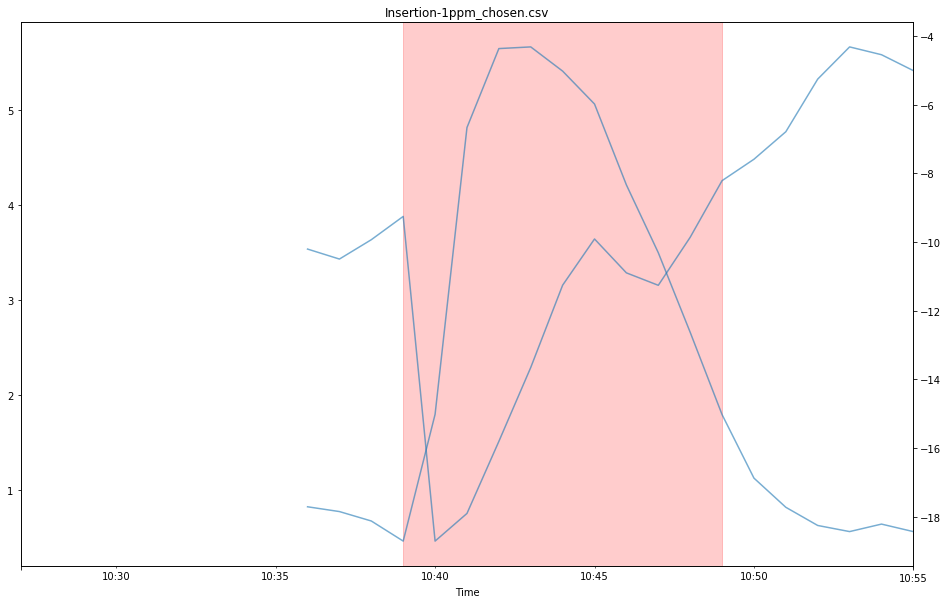

2020-11-17 16:12:05.882498 2020-11-17 16:22:05.899936


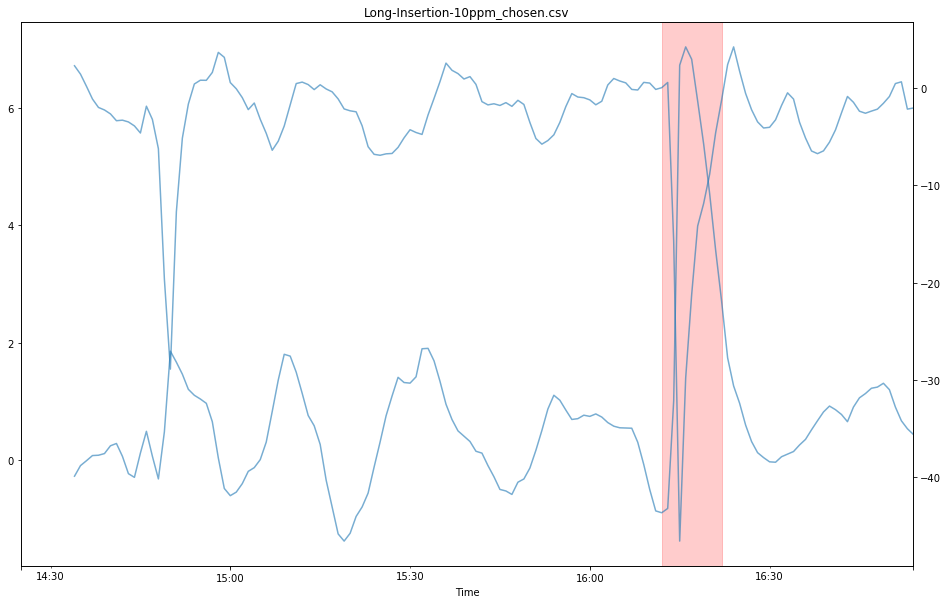

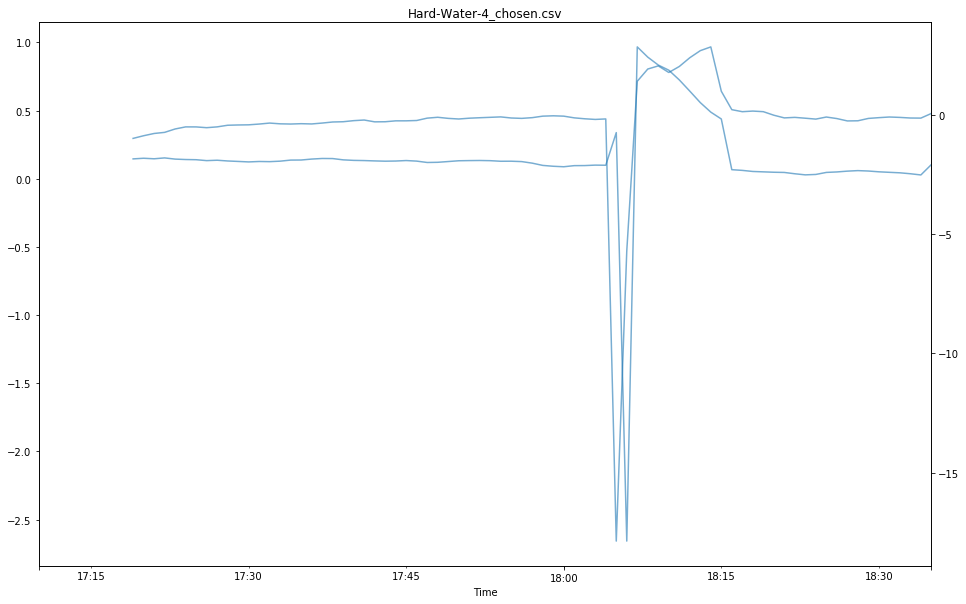

2021-01-25 14:03:05.507077 2021-01-25 14:13:05.508360


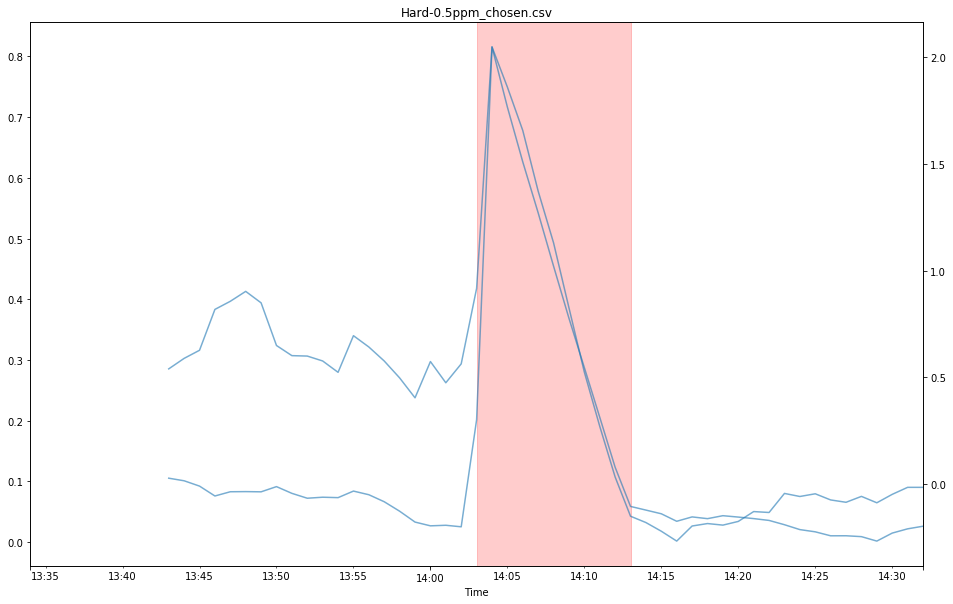

2020-11-18 14:23:36.904716 2020-11-18 14:33:36.951198


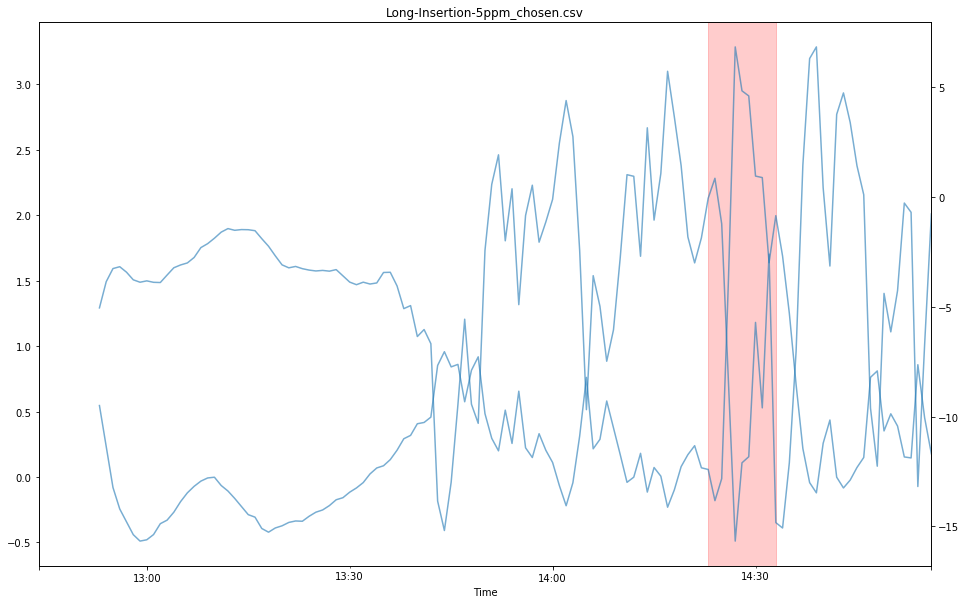

2021-01-25 16:25:58.341238 2021-01-25 16:35:58.271545


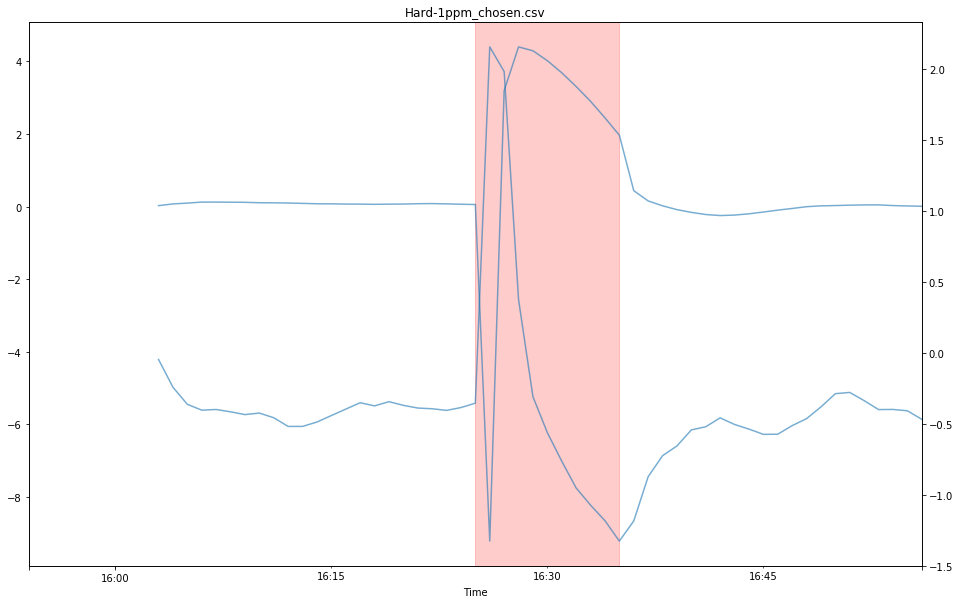

2021-01-20 10:39:57.343408 2021-01-20 10:49:57.157934


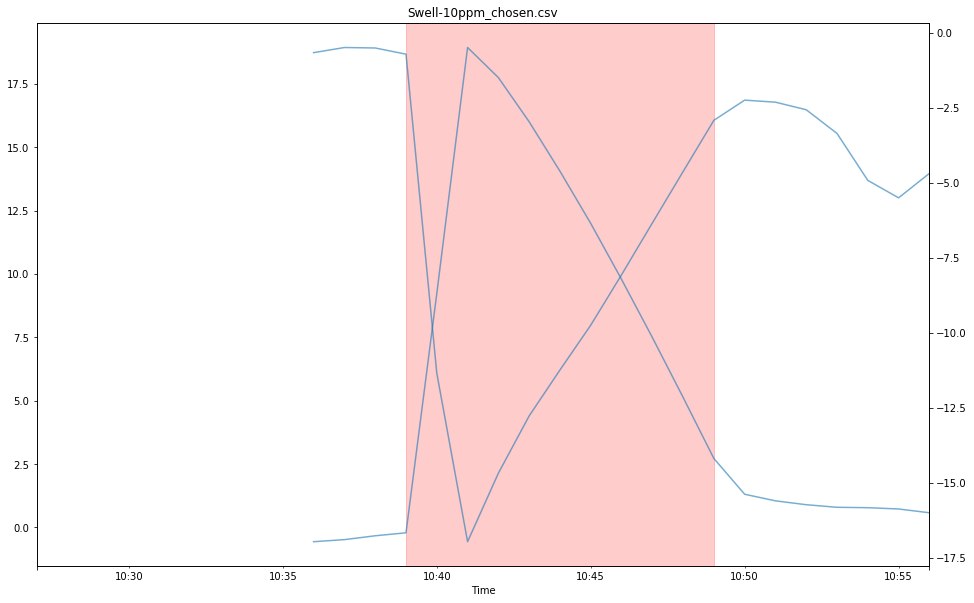

2020-12-16 11:39:41.928116 2020-12-16 11:49:43.121400


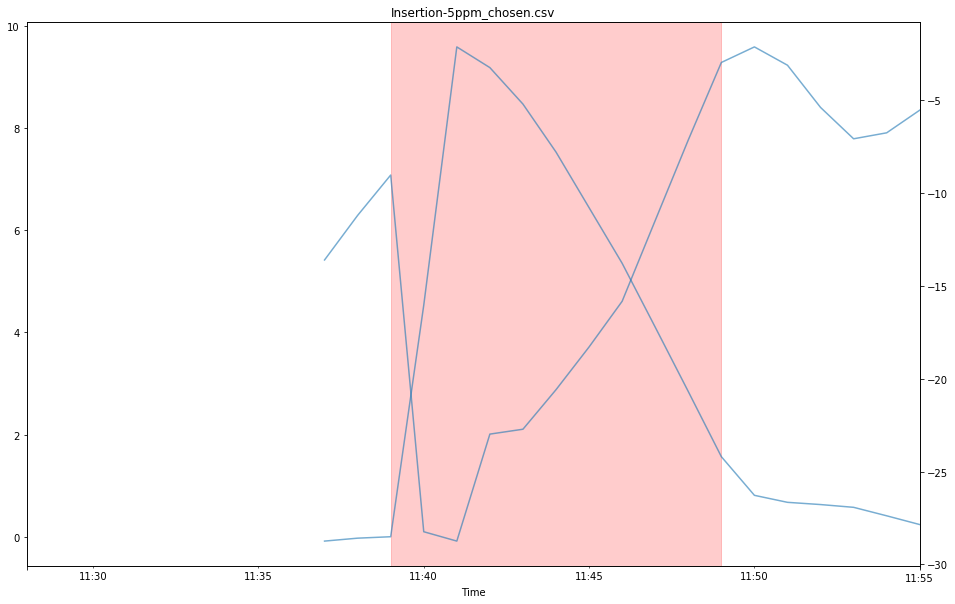

2020-12-16 12:44:23.244453 2020-12-16 12:54:24.256090


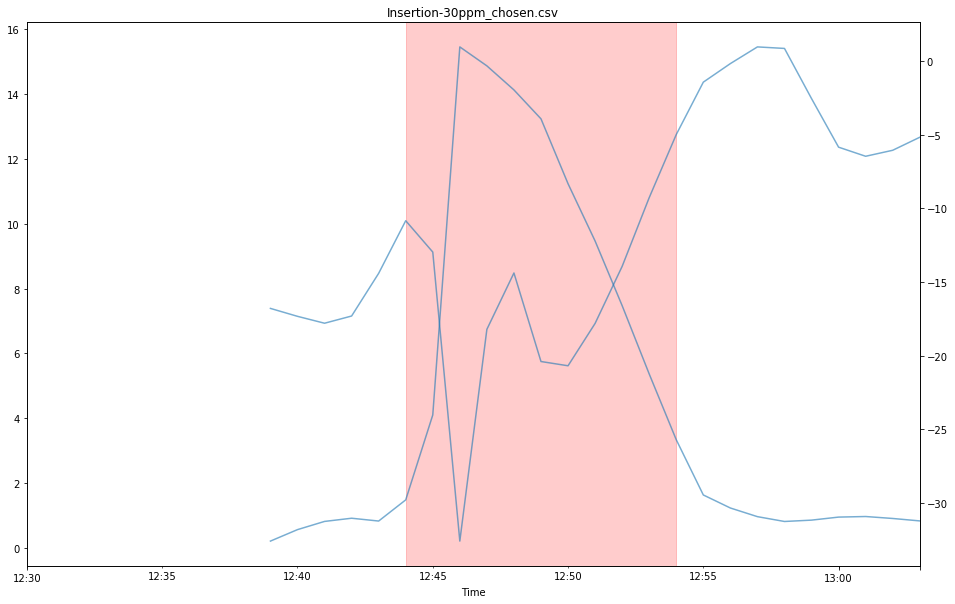

2021-01-21 18:35:58.149300 2021-01-21 18:45:58.227430


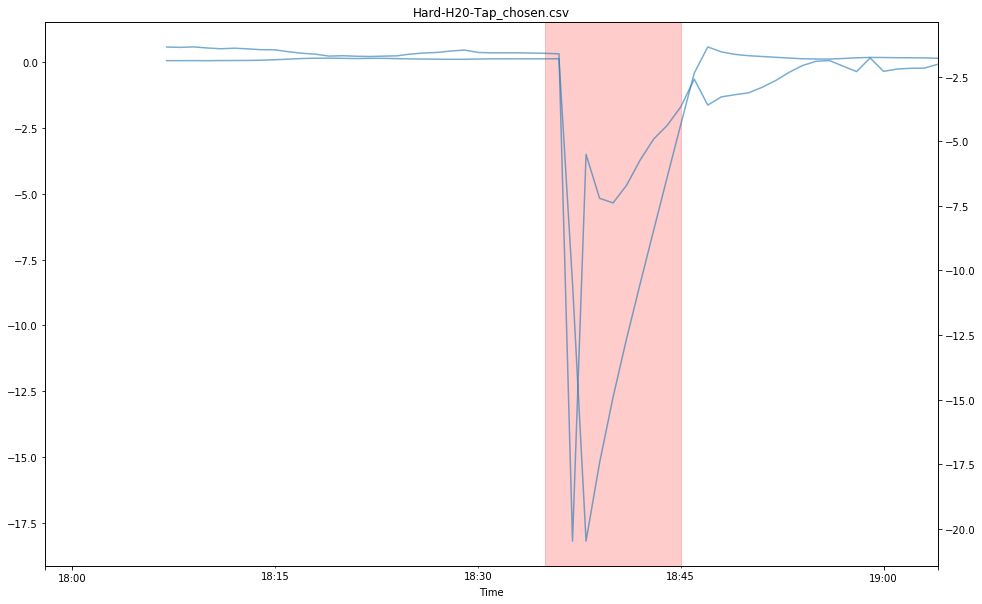

2021-01-21 17:28:19.455100 2021-01-21 17:38:19.465200


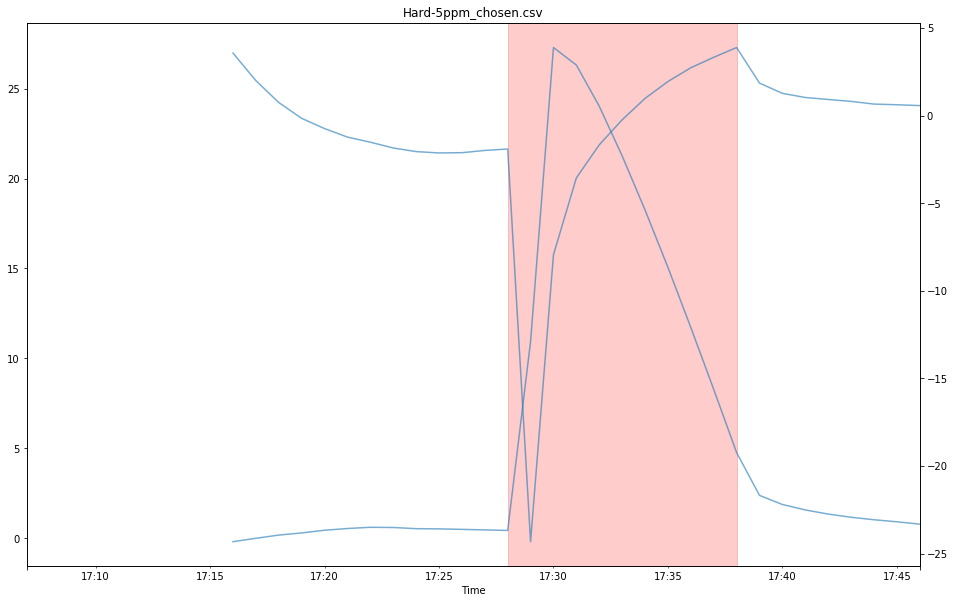

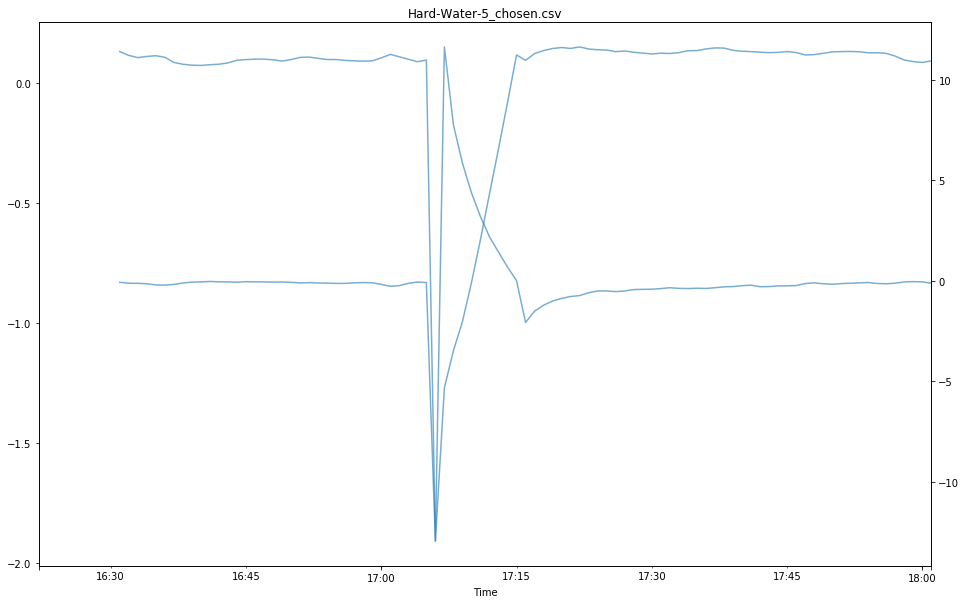

2021-01-25 18:33:16.778900 2021-01-25 18:43:16.777900


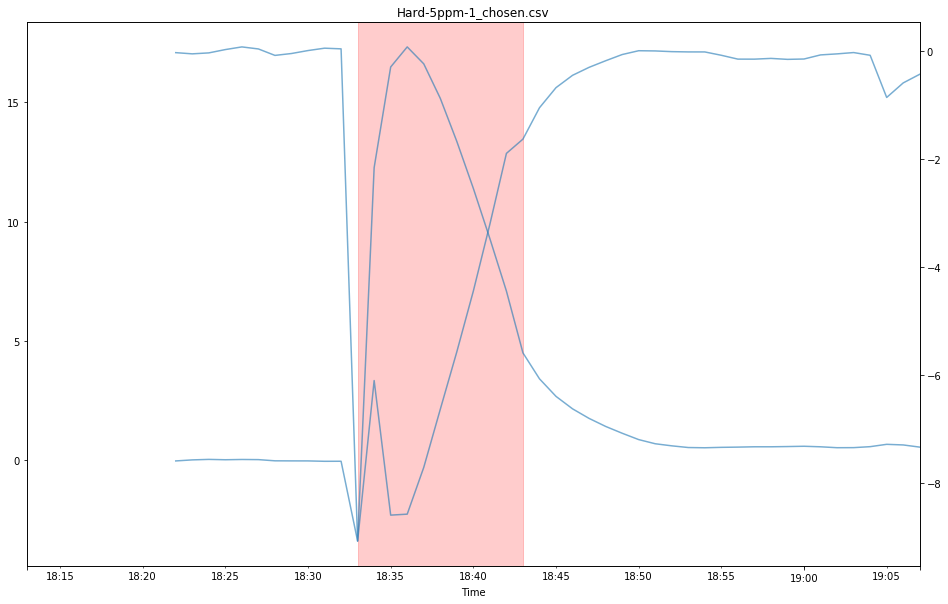

2020-12-16 13:23:05.988377 2020-12-16 13:33:06.179822


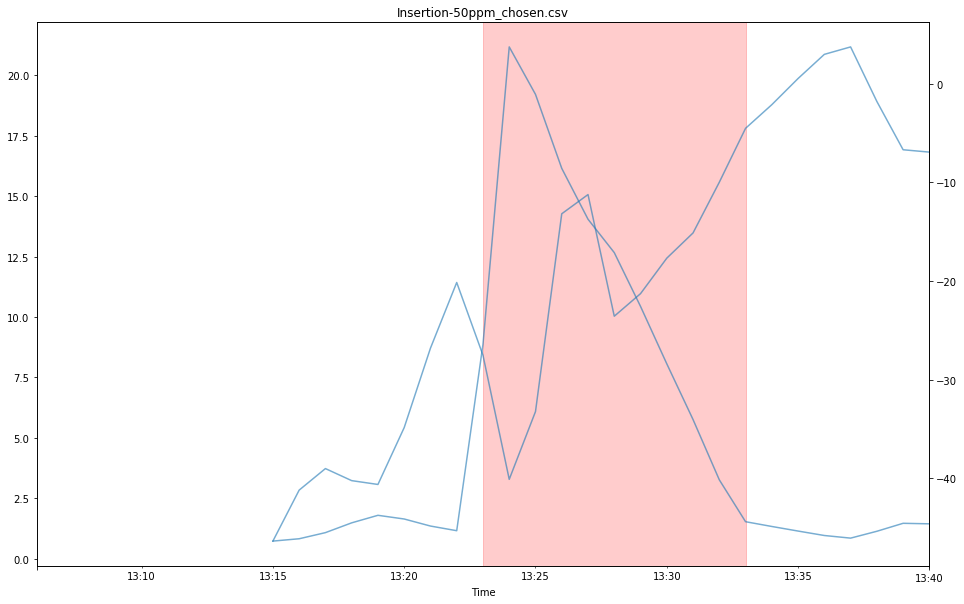

2021-01-21 19:04:48.384770 2021-01-21 19:14:48.472260


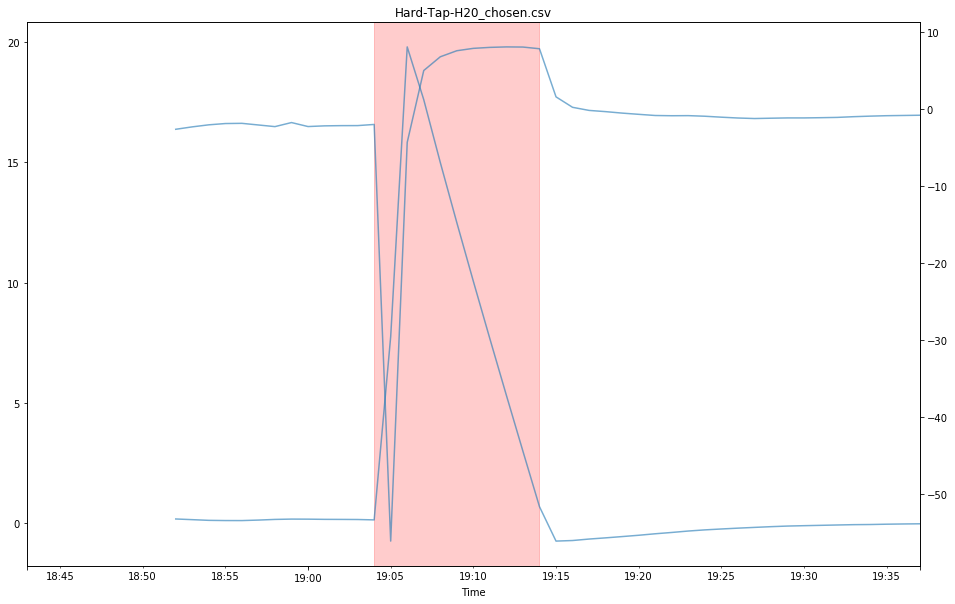

2020-12-16 12:10:14.136884 2020-12-16 12:20:14.223290


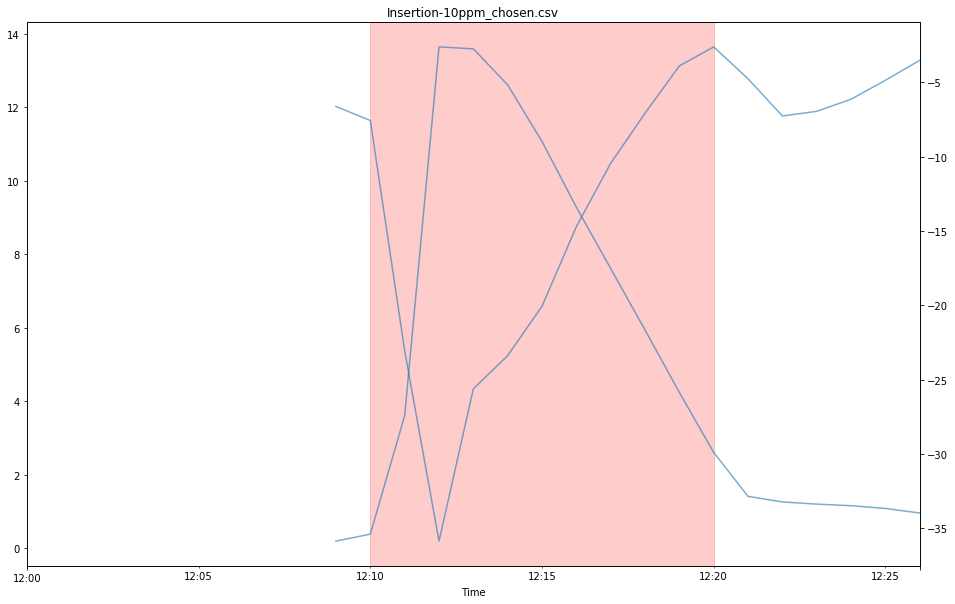

2021-01-25 14:03:05.507077 2021-01-25 14:13:05.508360


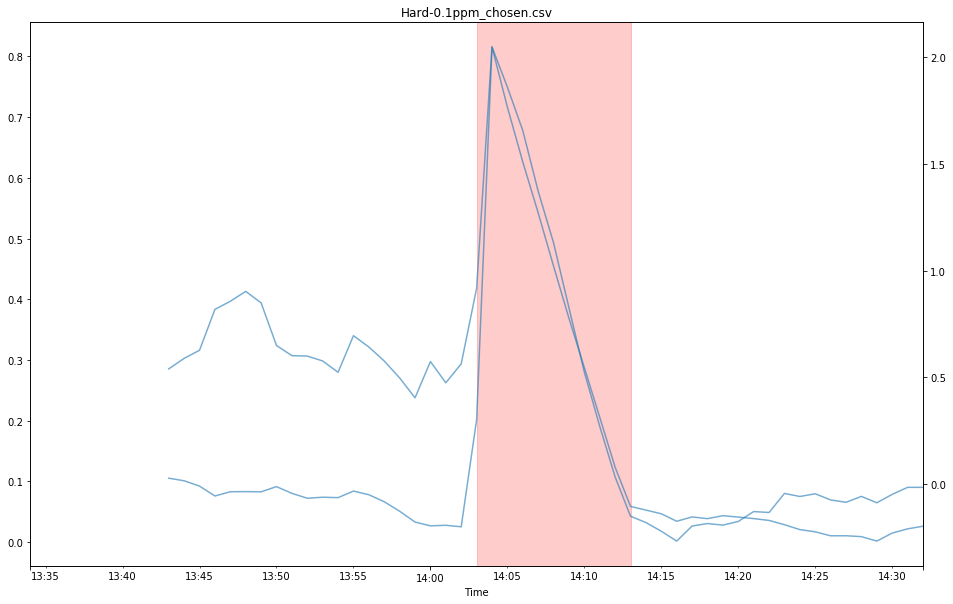

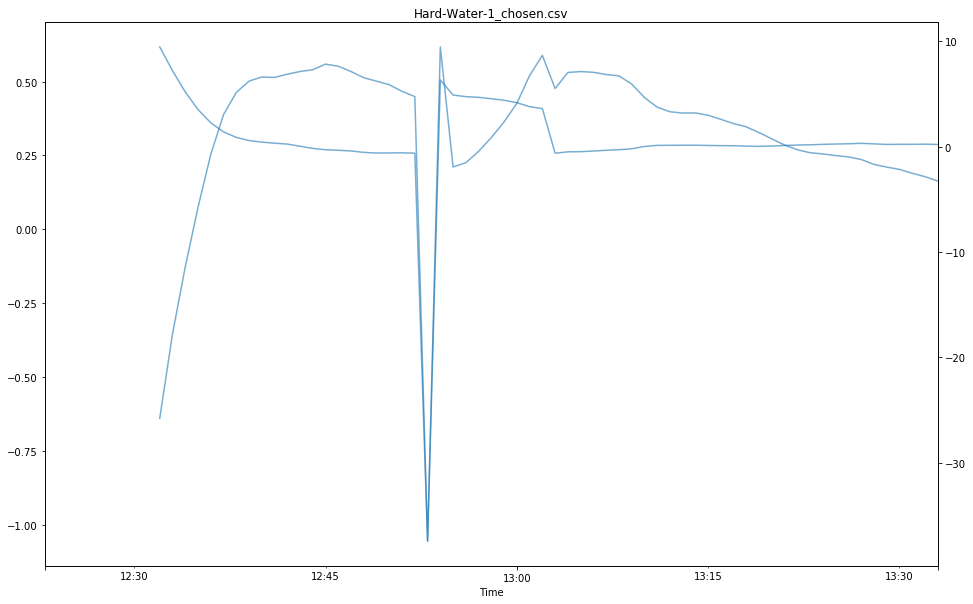

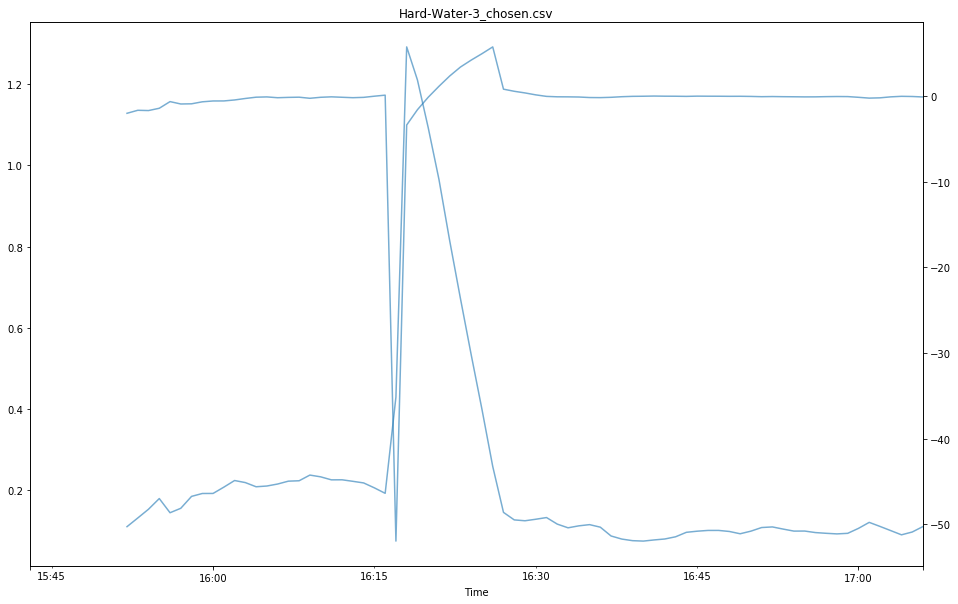

2021-01-25 17:30:33.774300 2021-01-25 17:40:33.776000


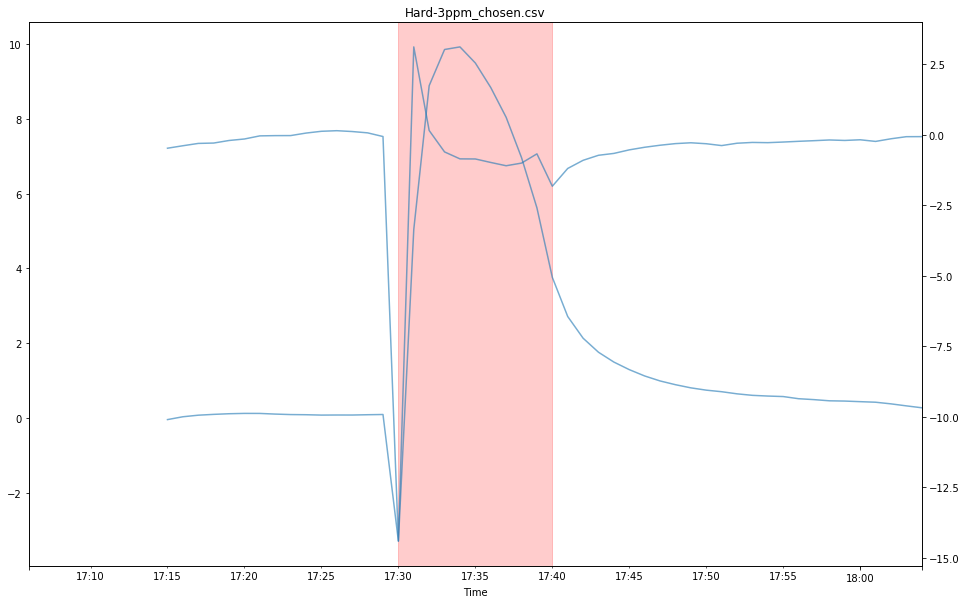

2020-12-16 11:10:34.843526 2020-12-16 11:20:42.828122


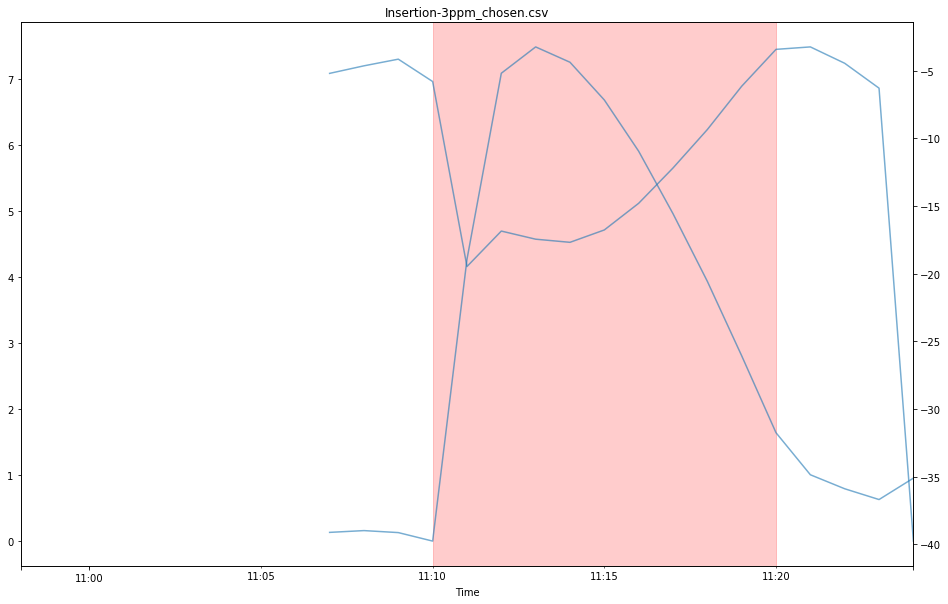

2020-12-16 14:00:31.120696 2020-12-16 14:10:31.119363


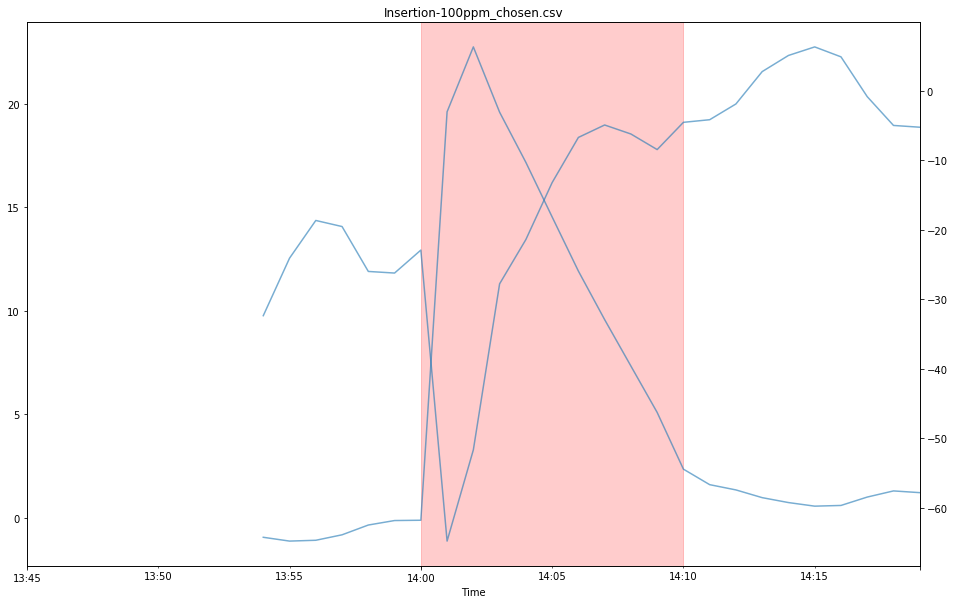

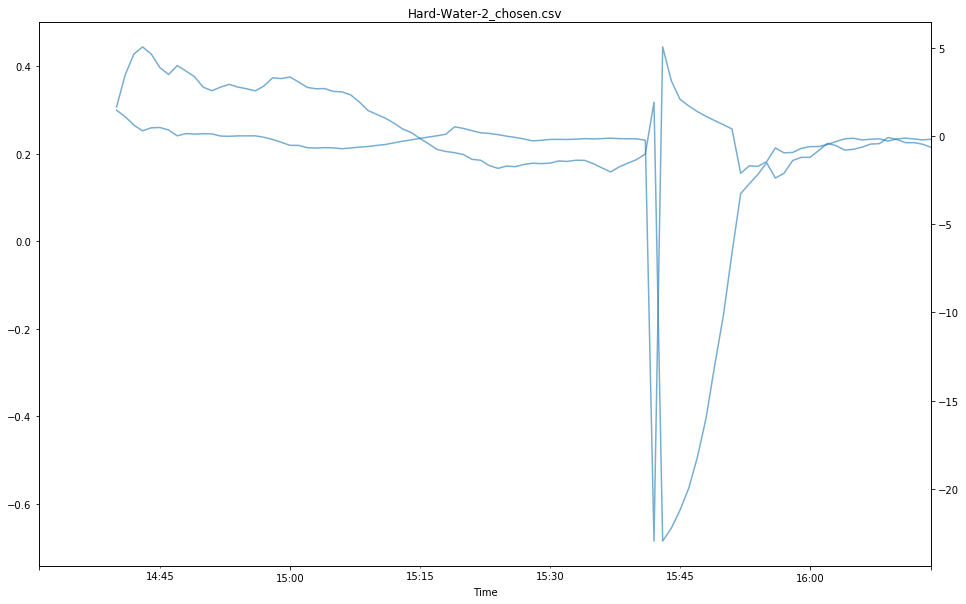

In [79]:
input_file_path = '/home/kimino/soft/qcm-detector/data/tests/test_descriptions_short.json'
with open(input_file_path, 'r') as test_json_file:
    input_file = json.loads(test_json_file.read())
tests = input_file['Tests']
for test in tests:
    test_object = test[list(test.keys())[0]]
    test_df = pd.read_csv(
        test_object['Path'], parse_dates=['Time'], index_col='Time'
    )
    resampled = test_df.resample('1min').mean()
    resampled = resampled - resampled.rolling(window = 10).mean()
    
    fig, ax = plt.subplots(figsize=(16,10))
    tax = ax.twinx()
    resampled['Resistance'].plot(ax = ax, alpha = 0.6, stacked = False)
    resampled['Frequency'].plot(ax = tax, alpha = 0.6, stacked = False)
    for anomaly in test_object['Anomalies']:
        start = test_df.iloc[anomaly['Start']].name
        end = test_df.iloc[anomaly['Start']+600].name
        print(start, end)
        ax.axvspan(start, end, alpha= 0.2, color = 'red')
    plt.title(f"{test_object['Path'].split('/')[-1]}")
    plt.show()

2020-12-16 10:39:34.417650 2020-12-16 10:49:38.184950


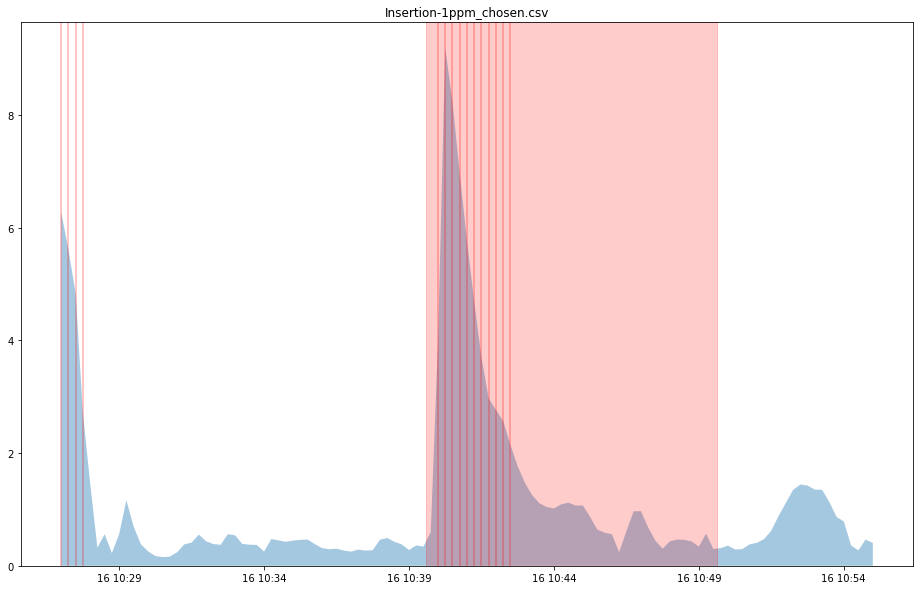

2020-11-17 16:12:05.882498 2020-11-17 16:22:05.899936


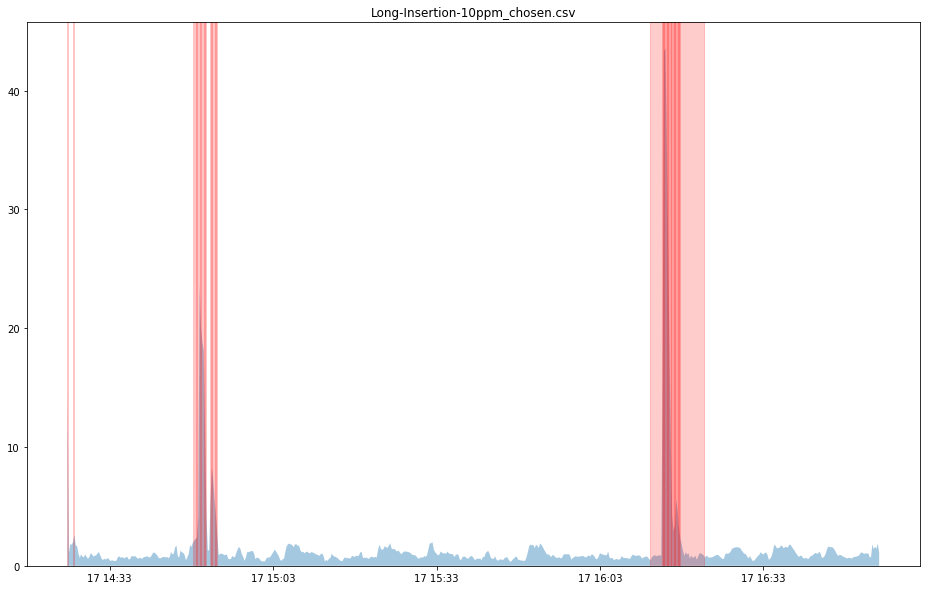

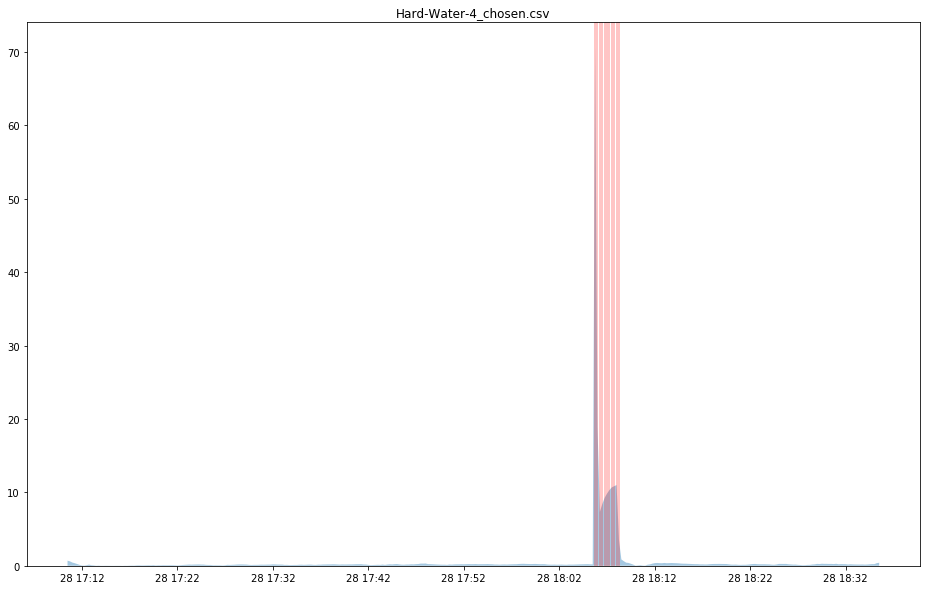

2021-01-25 14:03:05.507077 2021-01-25 14:13:05.508360


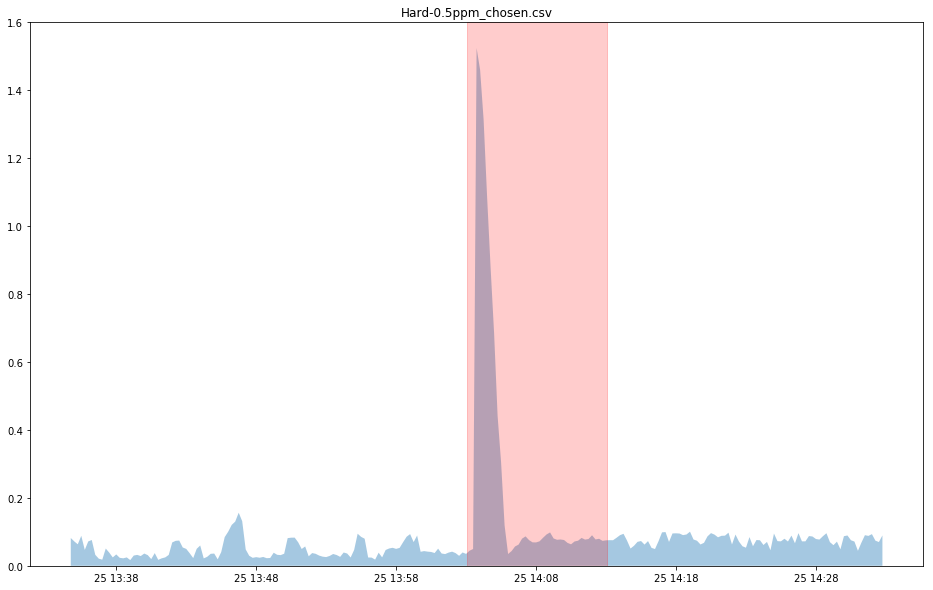

2020-11-18 14:23:36.904716 2020-11-18 14:33:36.951198


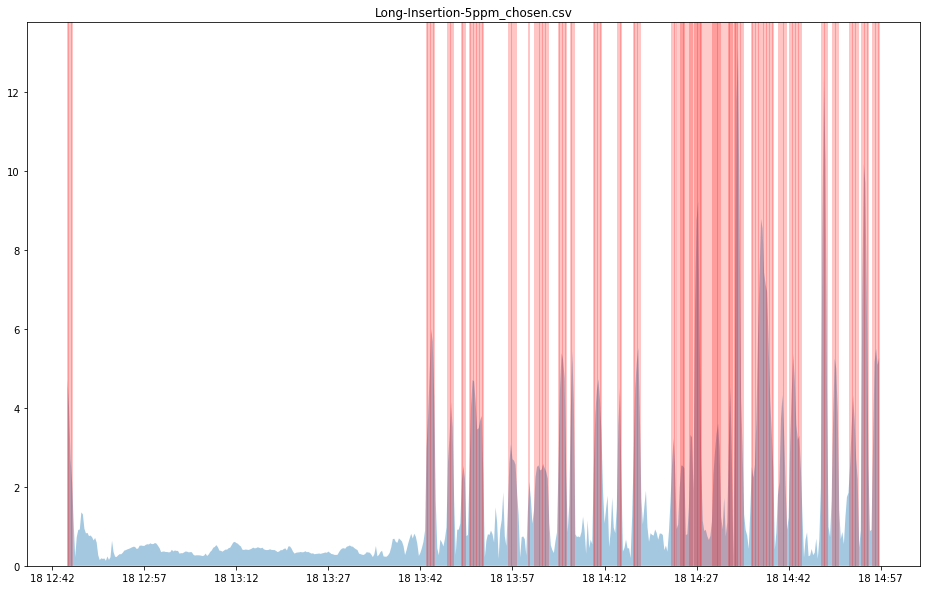

2021-01-25 16:25:58.341238 2021-01-25 16:35:58.271545


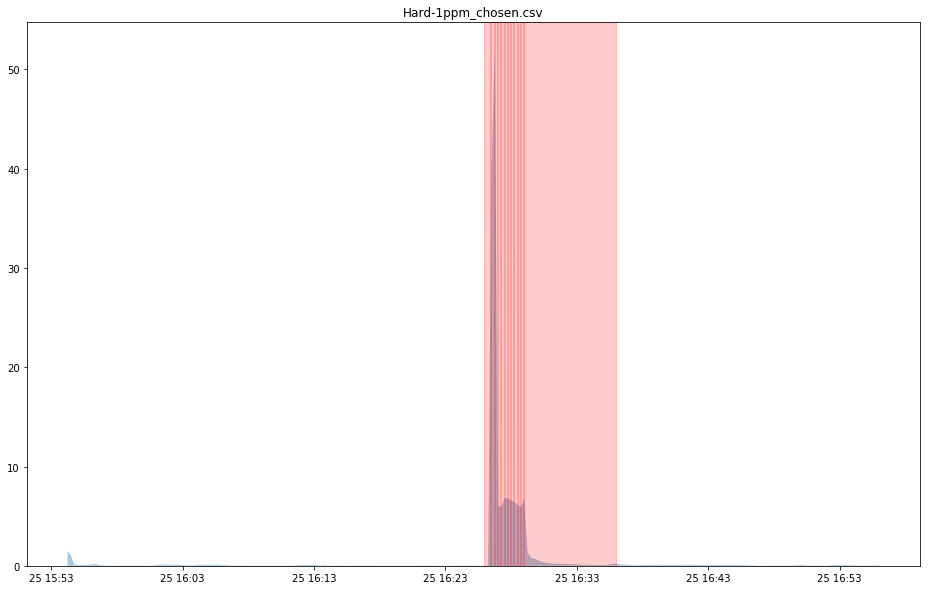

2021-01-20 10:39:57.343408 2021-01-20 10:49:57.157934


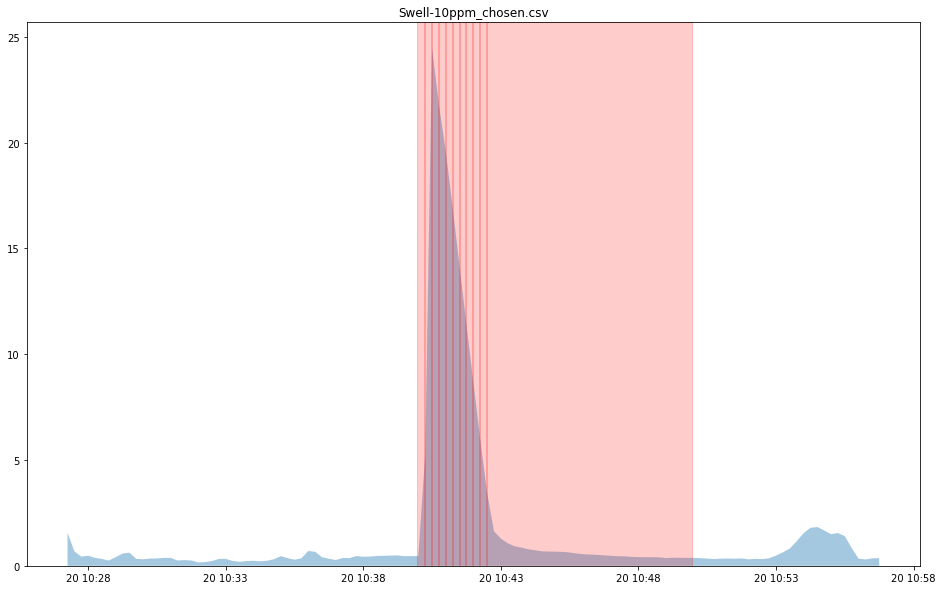

2020-12-16 11:39:41.928116 2020-12-16 11:49:43.121400


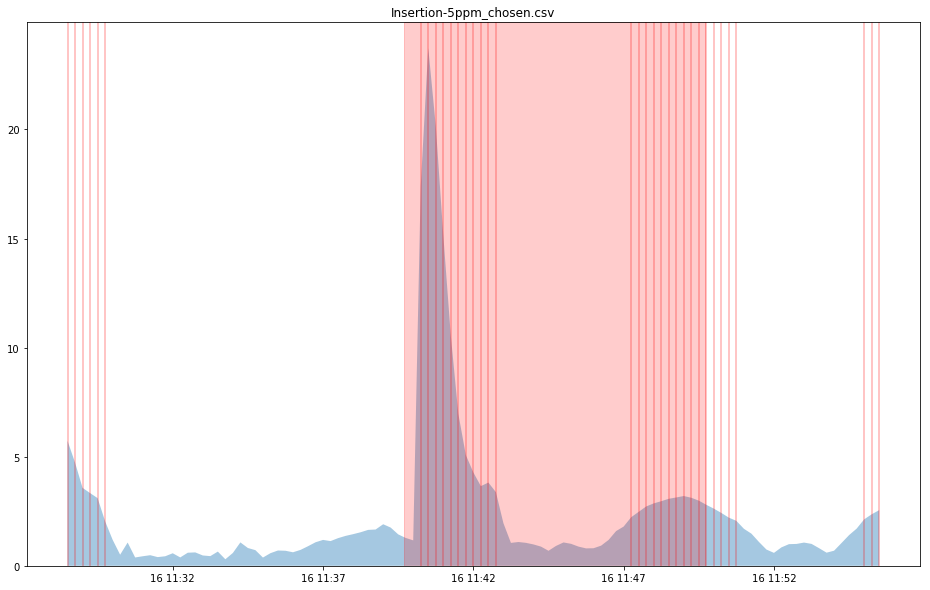

2020-12-16 12:44:23.244453 2020-12-16 12:54:24.256090


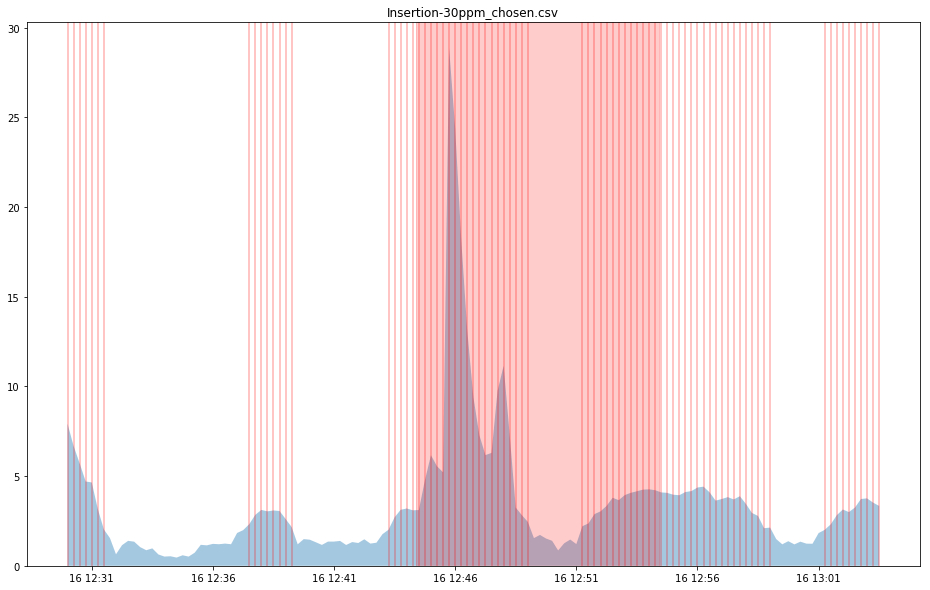

2021-01-21 18:35:58.149300 2021-01-21 18:45:58.227430


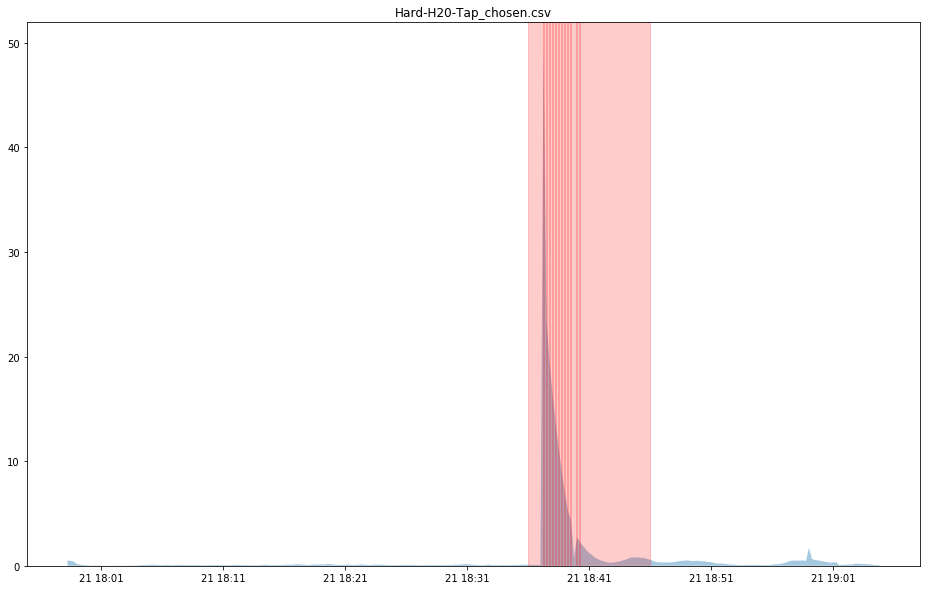

2021-01-21 17:28:19.455100 2021-01-21 17:38:19.465200


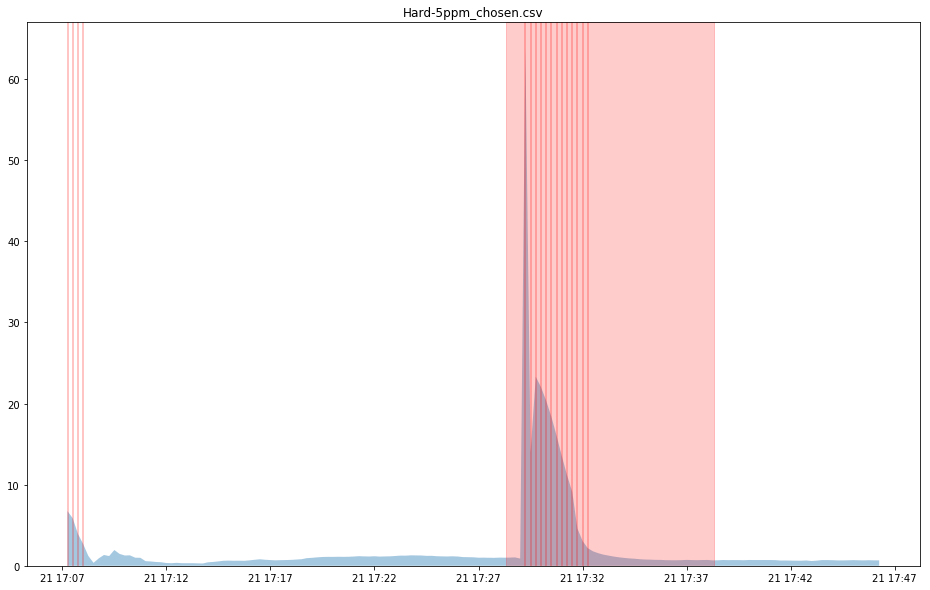

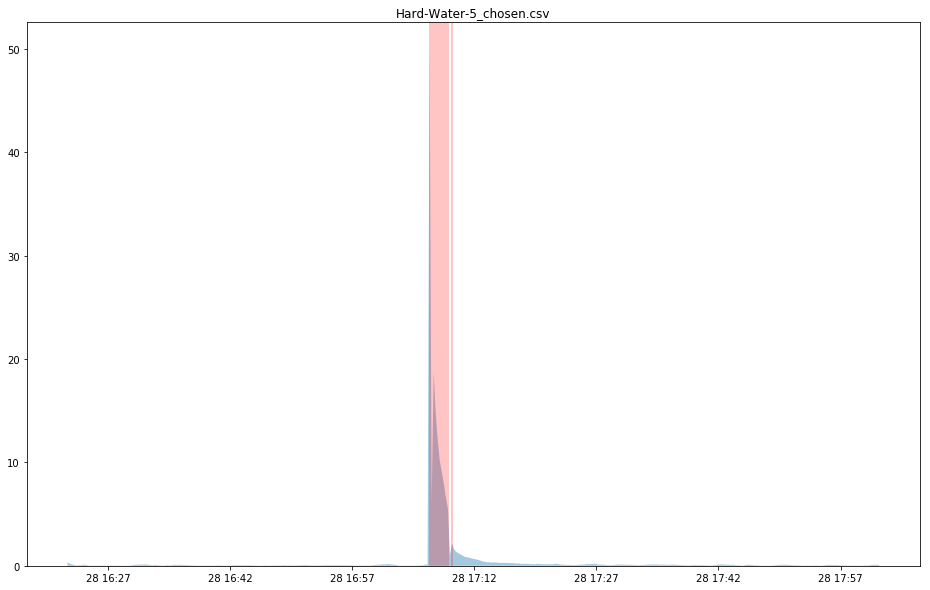

2021-01-25 18:33:16.778900 2021-01-25 18:43:16.777900


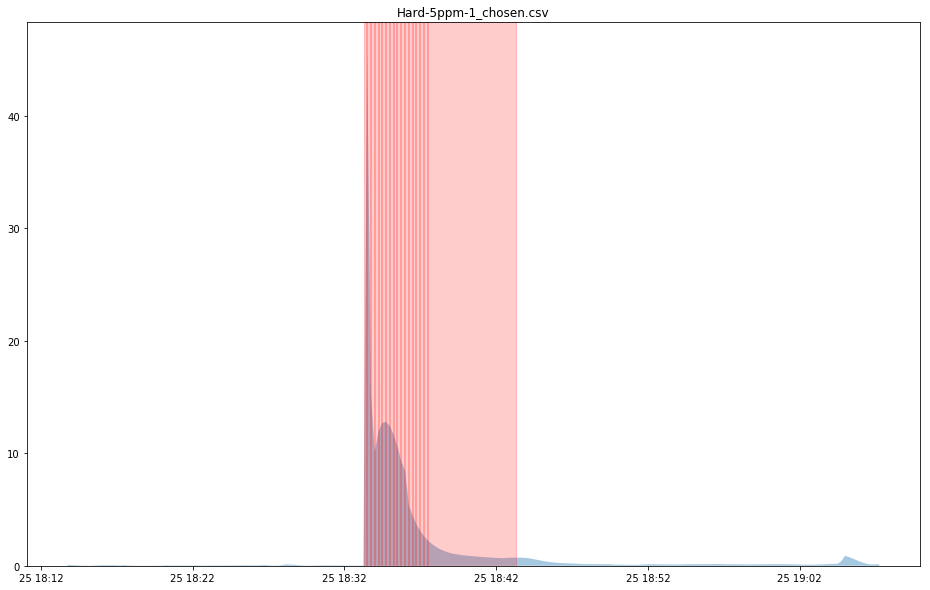

2020-12-16 13:23:05.988377 2020-12-16 13:33:06.179822


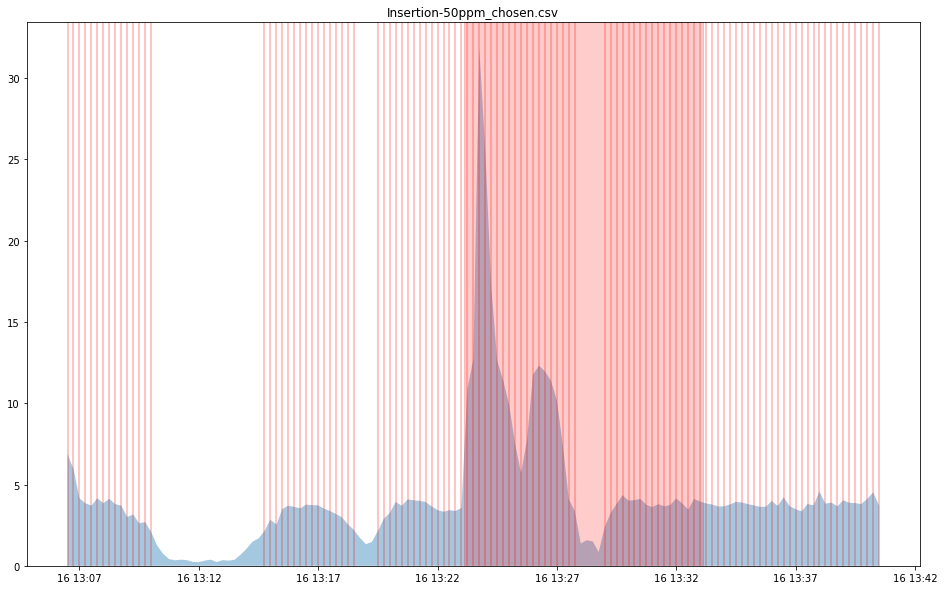

2021-01-21 19:04:48.384770 2021-01-21 19:14:48.472260


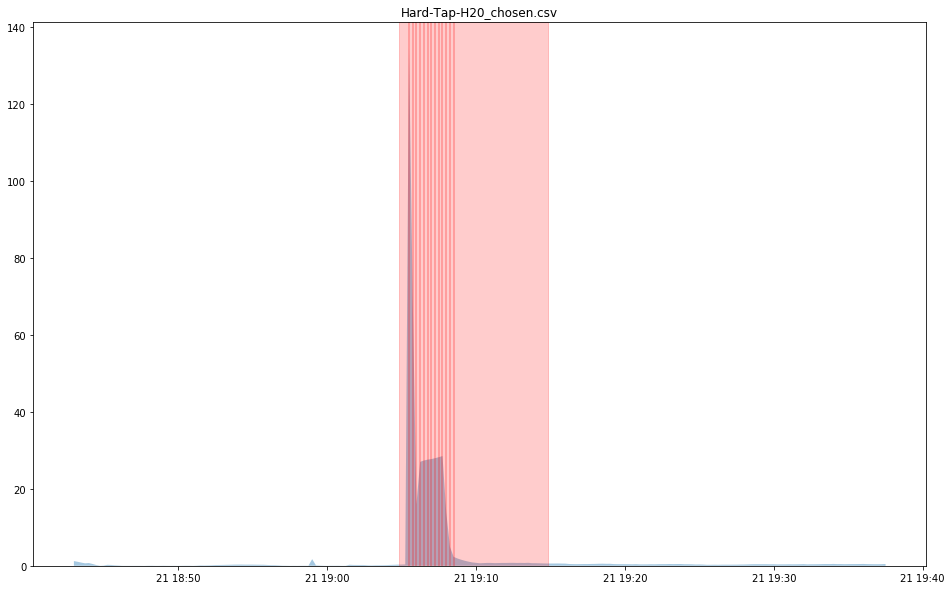

2020-12-16 12:10:14.136884 2020-12-16 12:20:14.223290


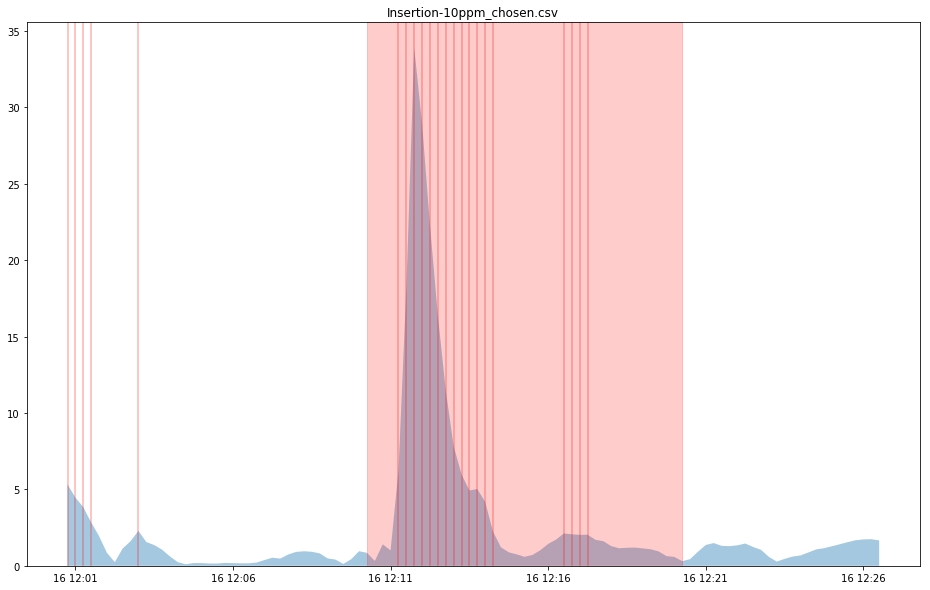

2021-01-25 14:03:05.507077 2021-01-25 14:13:05.508360


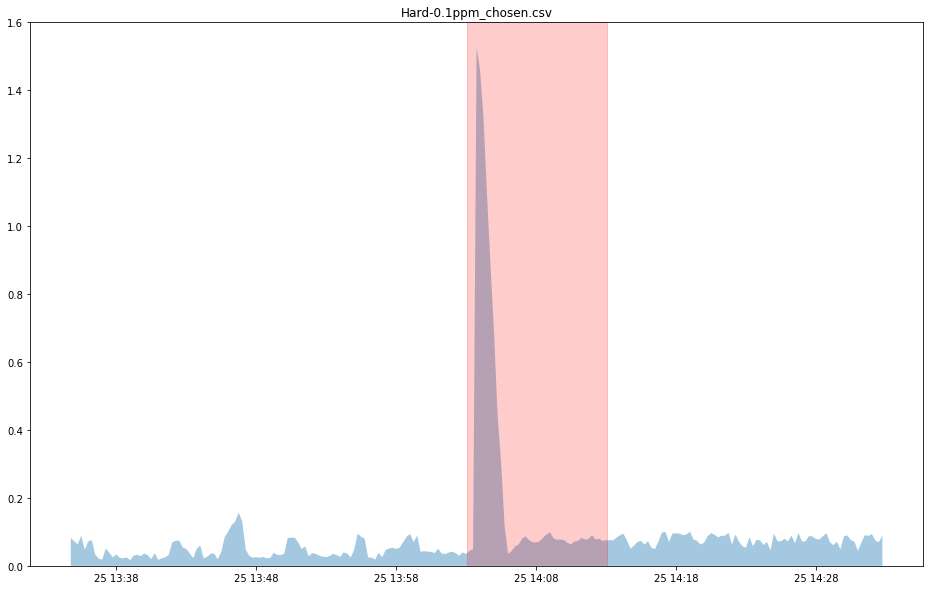

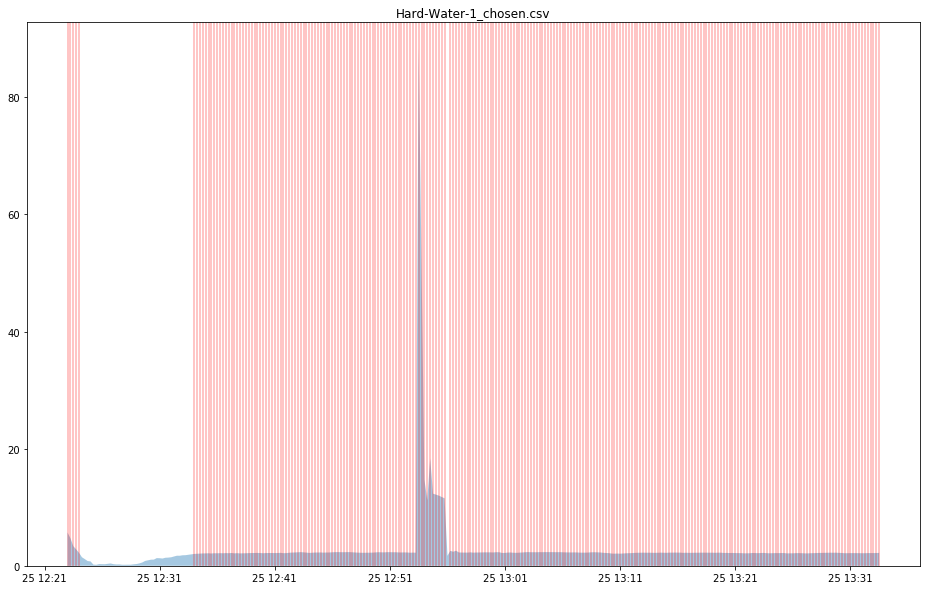

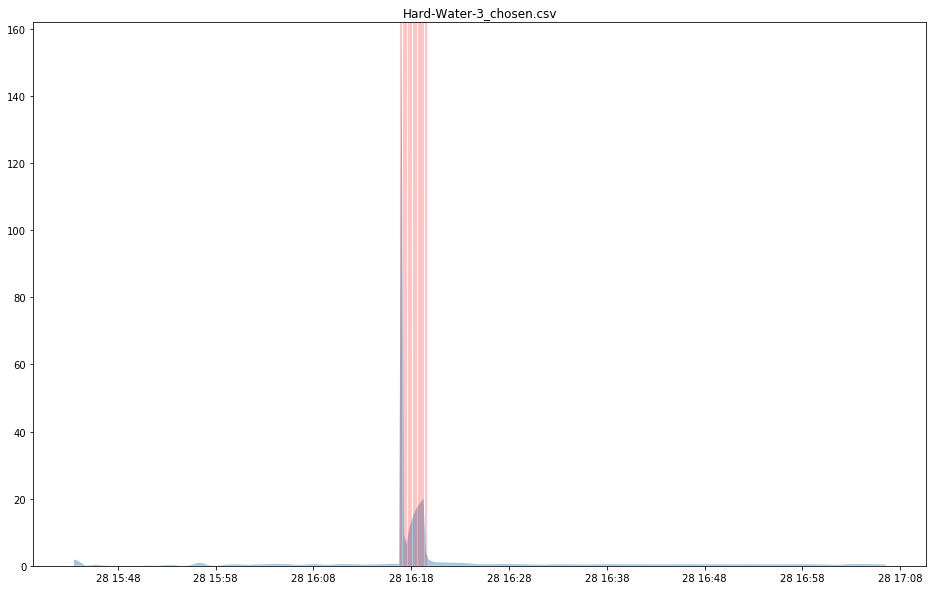

2021-01-25 17:30:33.774300 2021-01-25 17:40:33.776000


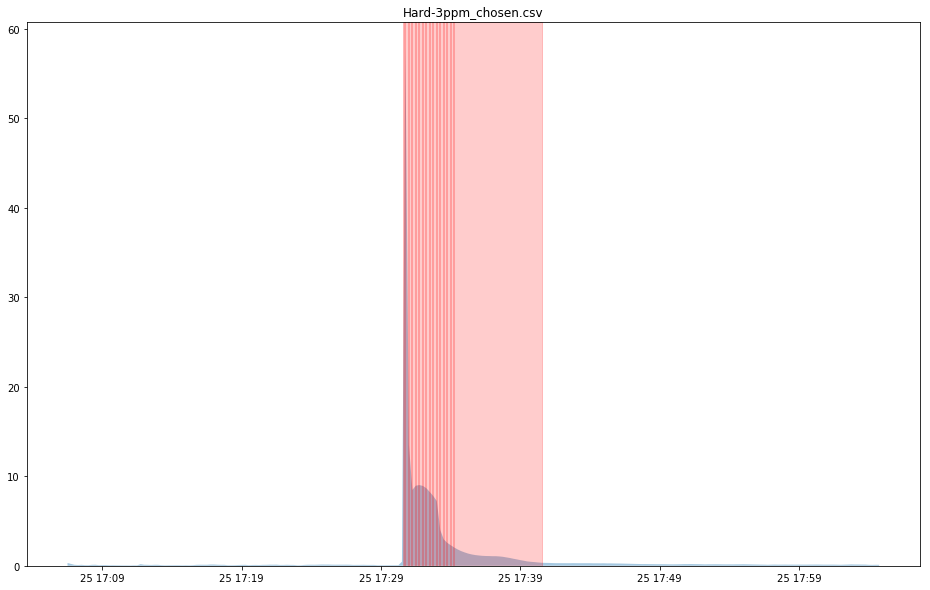

2020-12-16 11:10:34.843526 2020-12-16 11:20:42.828122


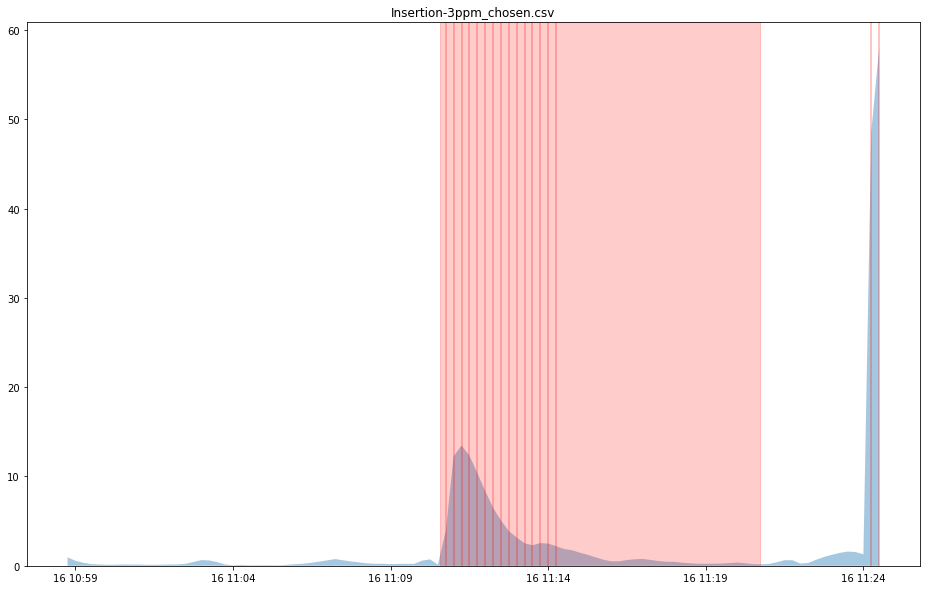

2020-12-16 14:00:31.120696 2020-12-16 14:10:31.119363


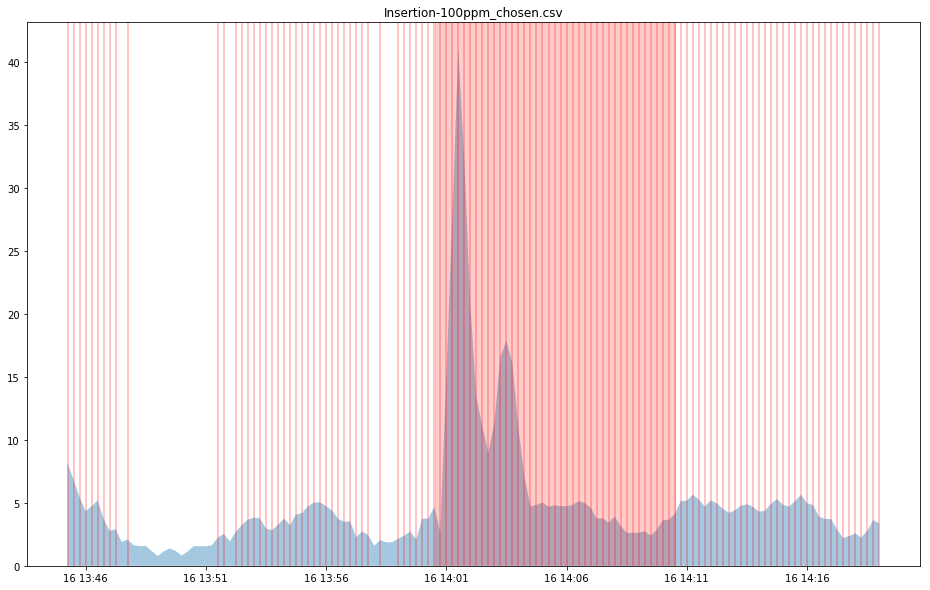

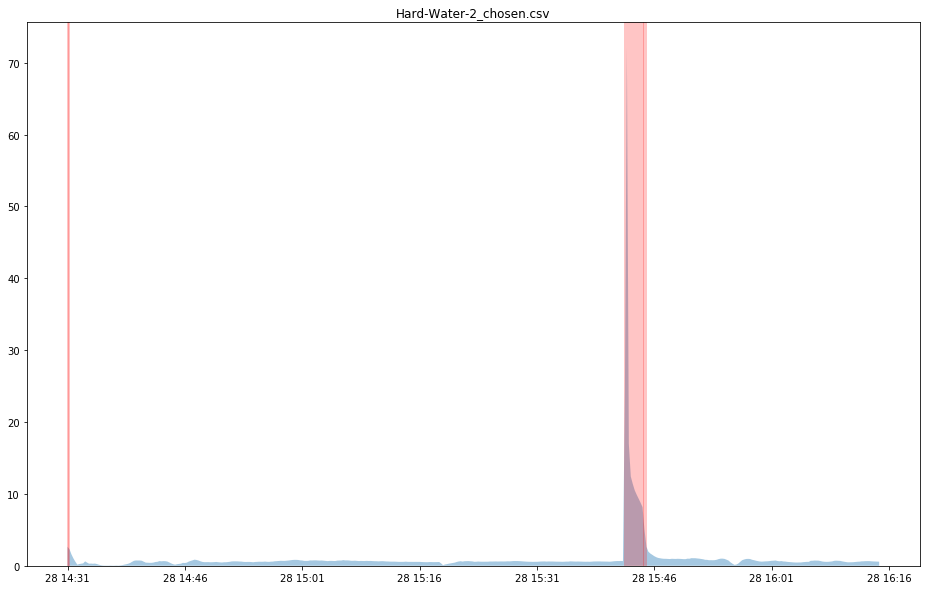

In [164]:
input_file_path = '/home/kimino/soft/qcm-detector/data/tests/test_descriptions_short.json'
with open(input_file_path, 'r') as test_json_file:
    input_file = json.loads(test_json_file.read())
tests = input_file['Tests']
for test in tests:
    test_object = test[list(test.keys())[0]]
    test_df = pd.read_csv(
        test_object['Path'], parse_dates=['Time'], index_col='Time'
    )
    resampled = test_df.resample('15s').mean()
    resampled = resampled - resampled.rolling(window = 10).mean().fillna(method = 'backfill')
    nbrs = NearestNeighbors(n_neighbors=6)
    nbrs.fit(resampled[:30])
    distances, indexes = nbrs.kneighbors(resampled)
    scores = distances.max(axis = 1)

    fig, ax = plt.subplots(figsize=(16,10))
    index = resampled.index
    ax.fill_between(x = index, y1 = scores,alpha = 0.4)
    ax.plot(x = index, y = scores, alpha = 0.8)
    for x in np.where(scores > 2)[0]:
        ax.axvline(x = index[x], alpha = 0.3, color = 'red')
    _, y_max = ax.get_ylim()
    ax.set_ylim([0,y_max])
    for anomaly in test_object['Anomalies']:
        start = test_df.iloc[anomaly['Start']].name
        end = test_df.iloc[anomaly['Start']+600].name
        print(start, end)
        ax.axvspan(start, end, alpha= 0.2, color = 'red')
    plt.title(f"{test_object['Path'].split('/')[-1]}")
    plt.show()

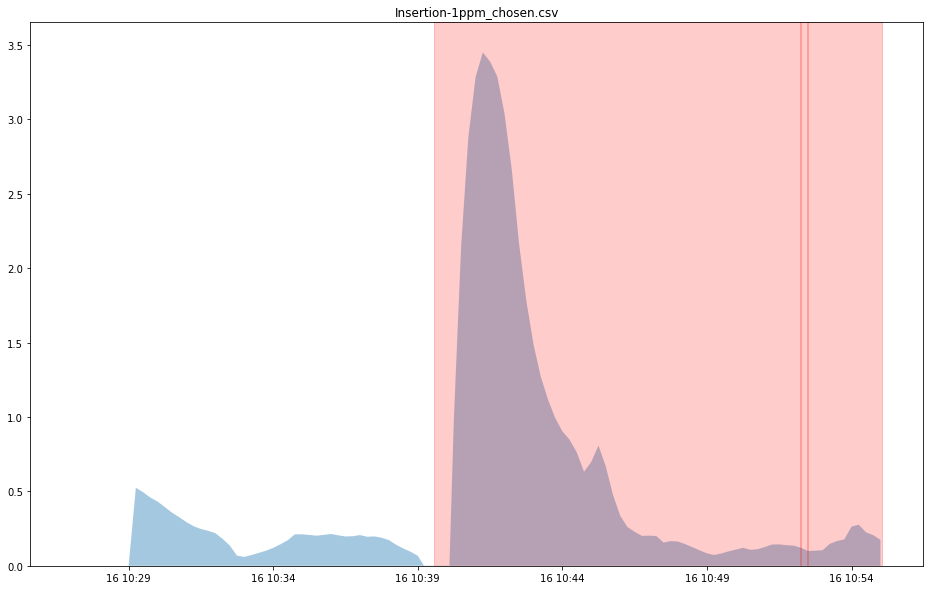

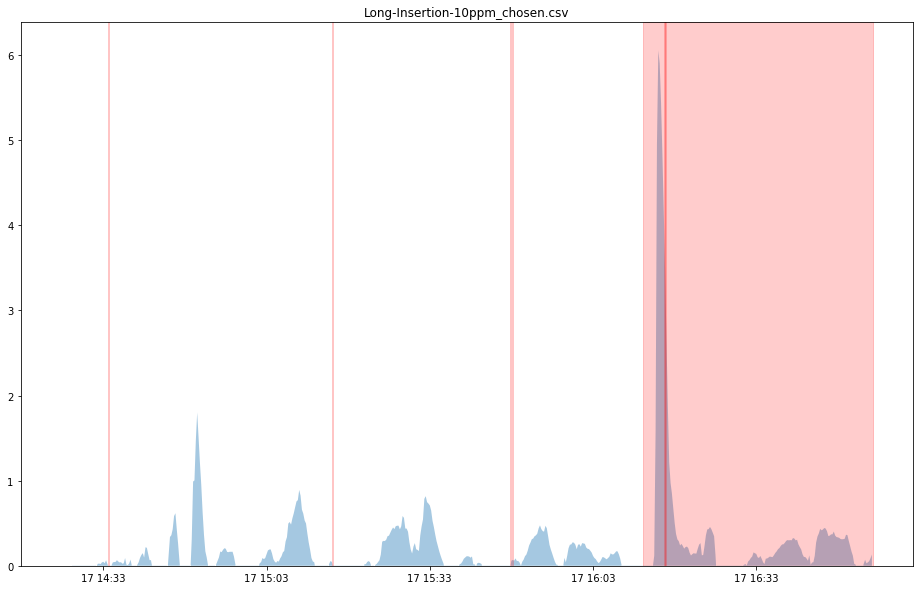

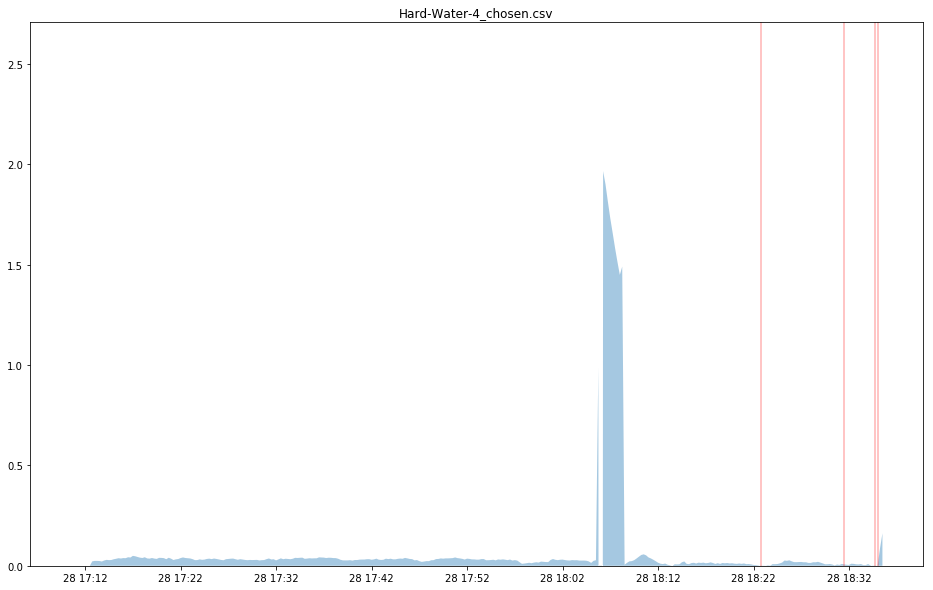

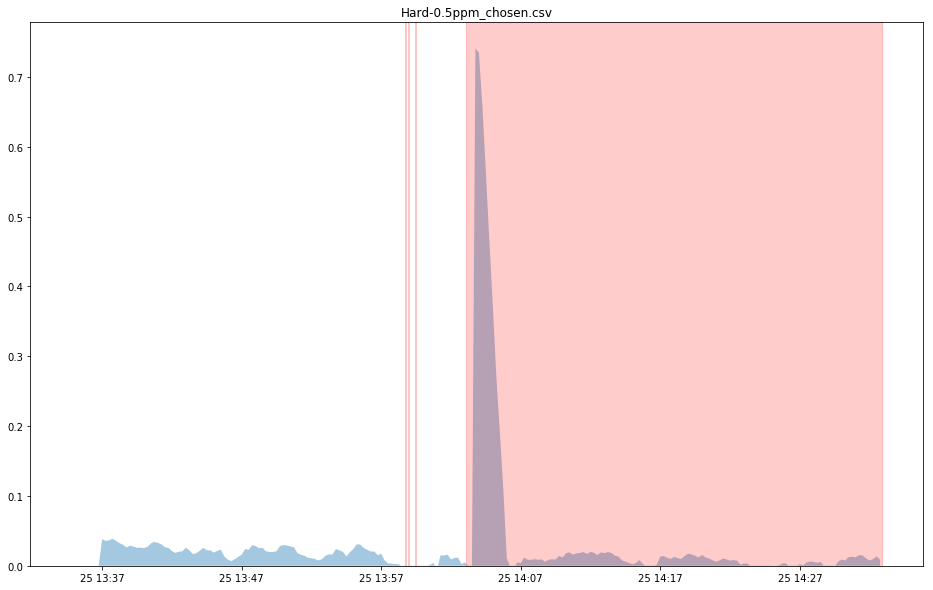

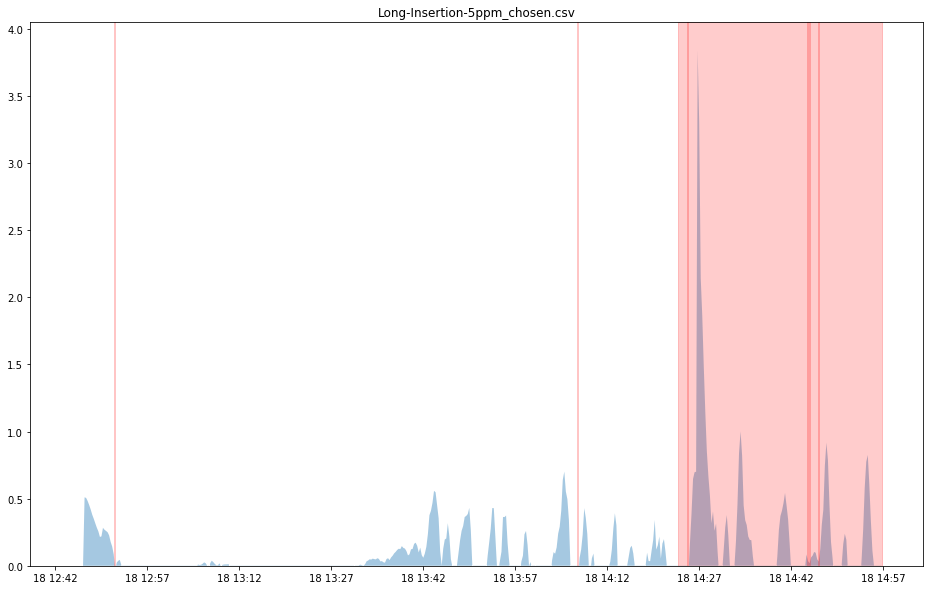

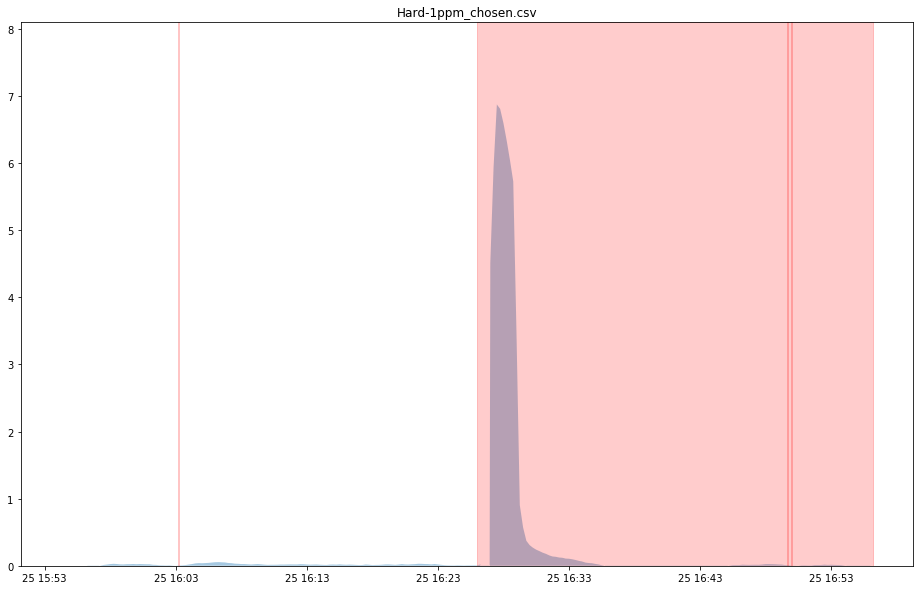

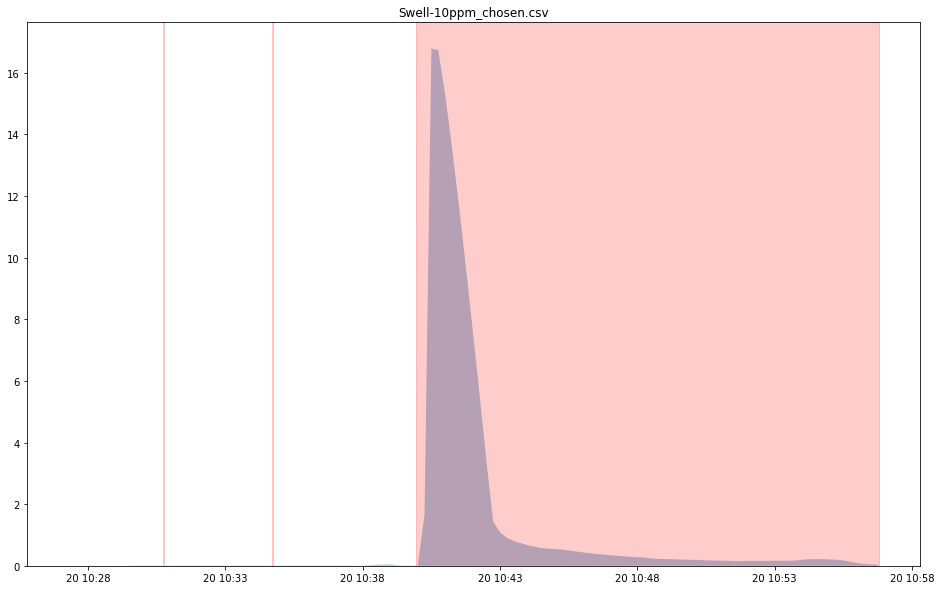

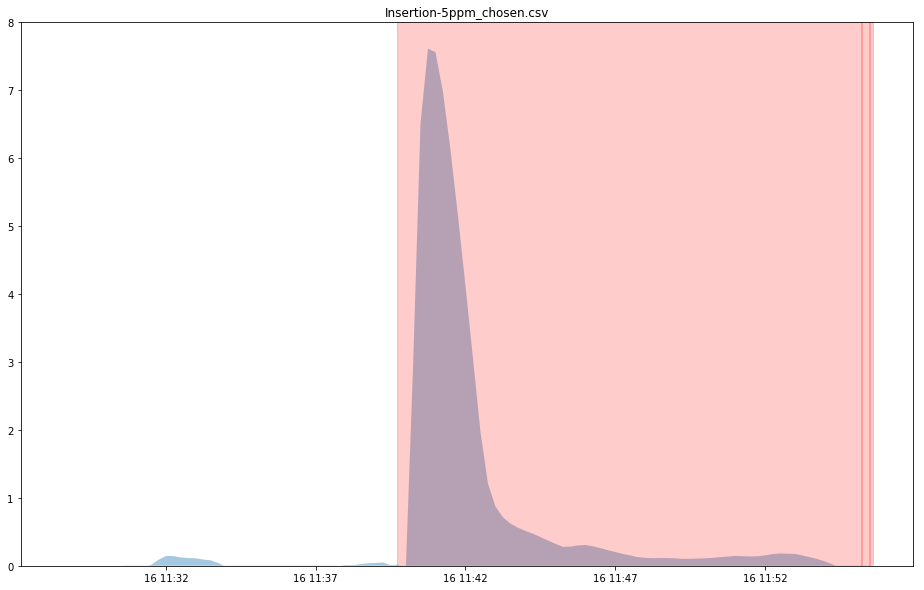

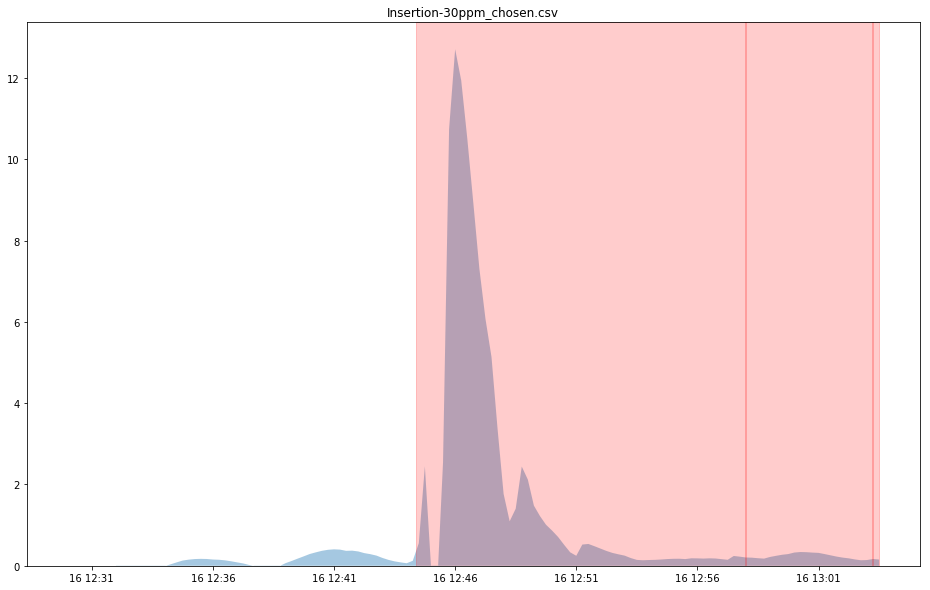

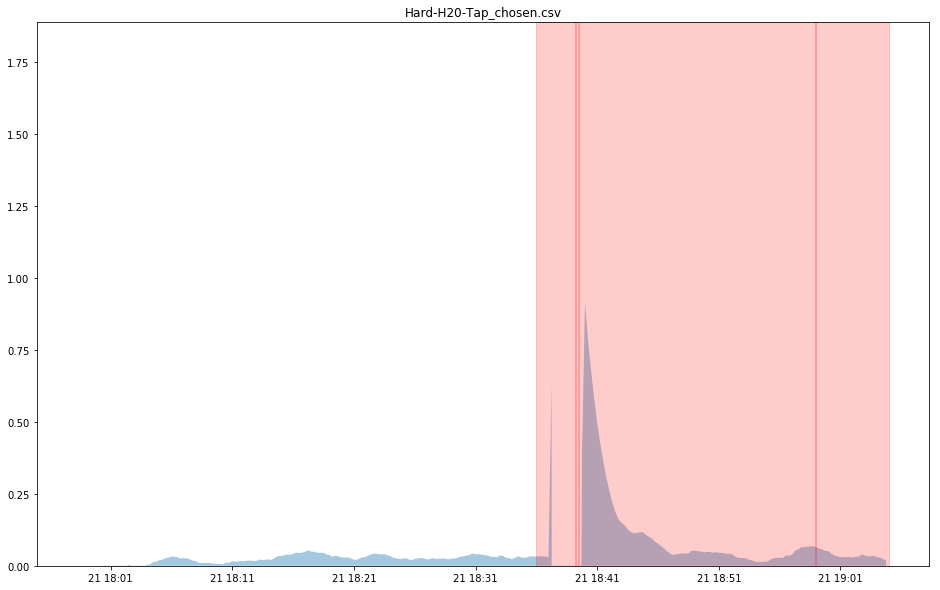

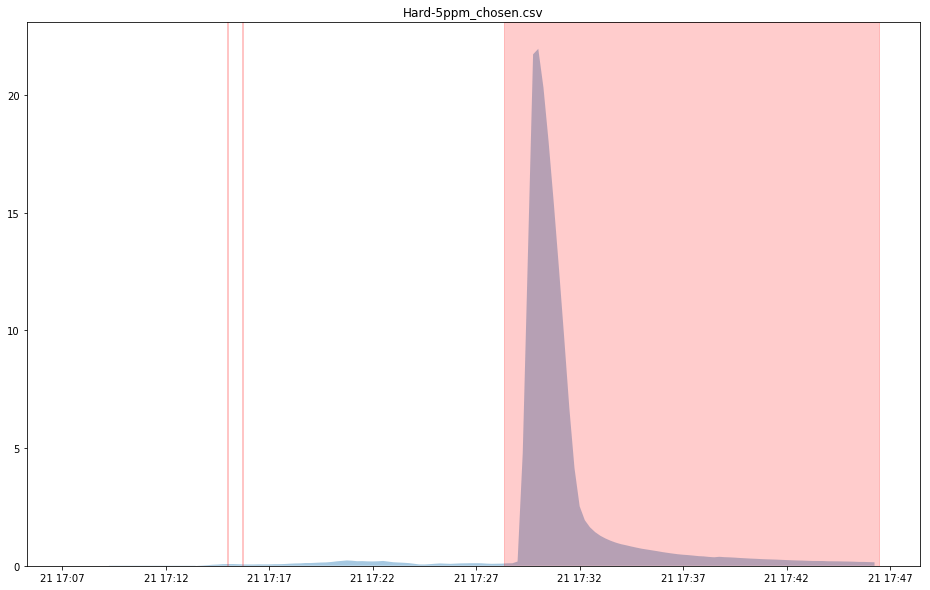

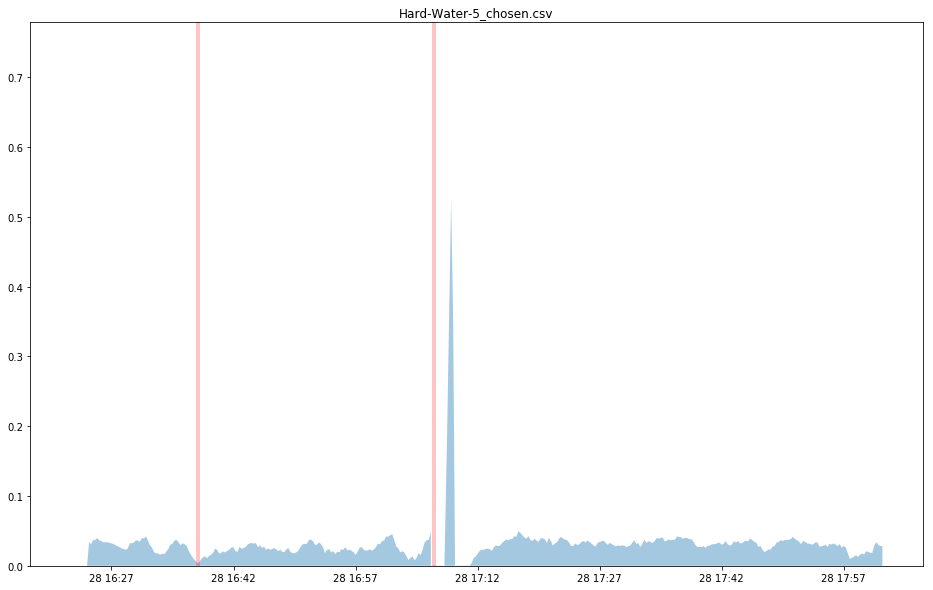

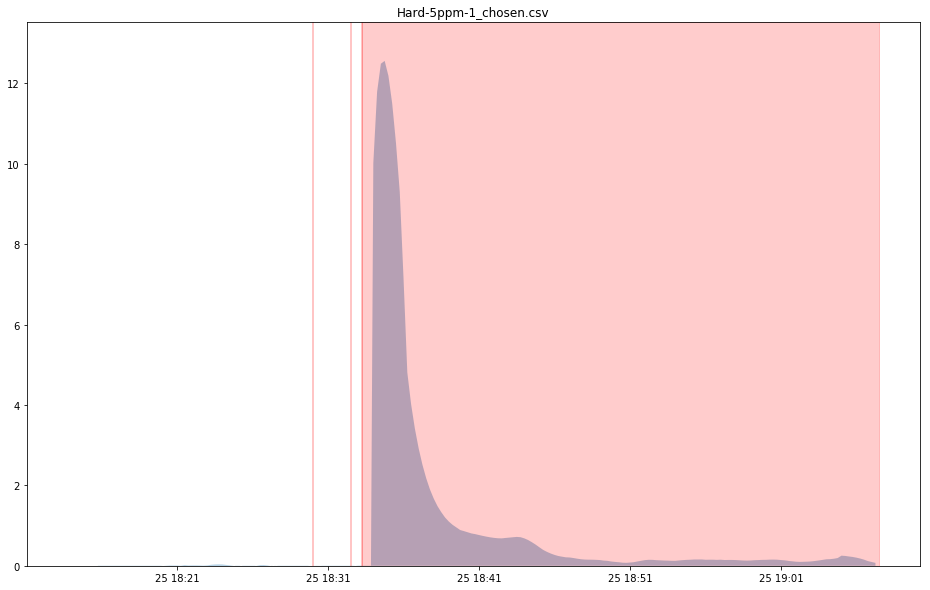

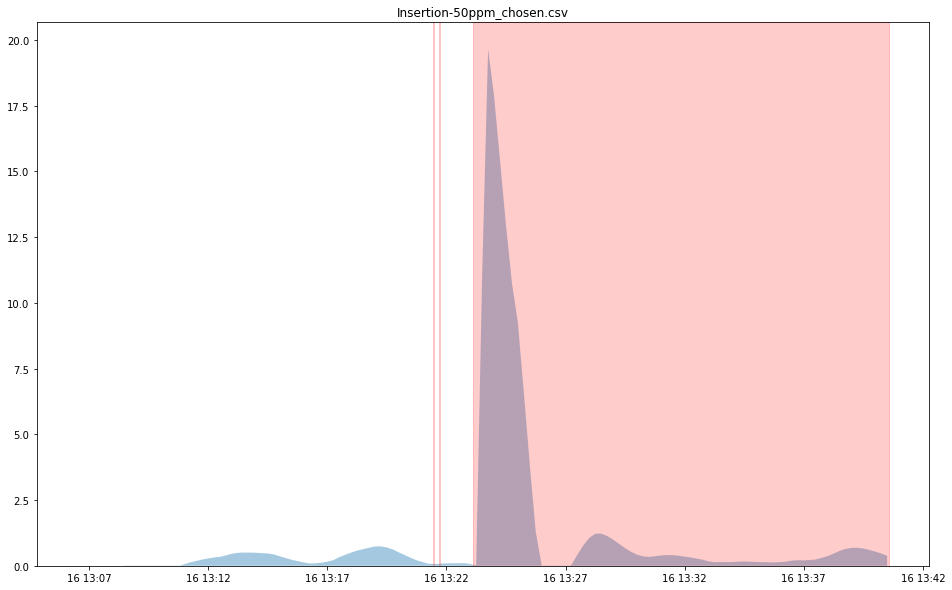

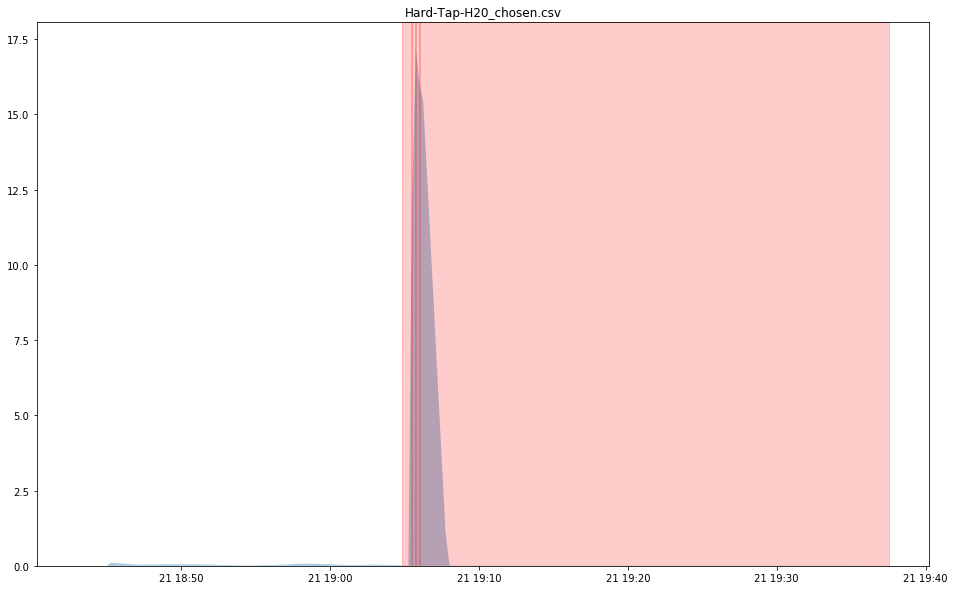

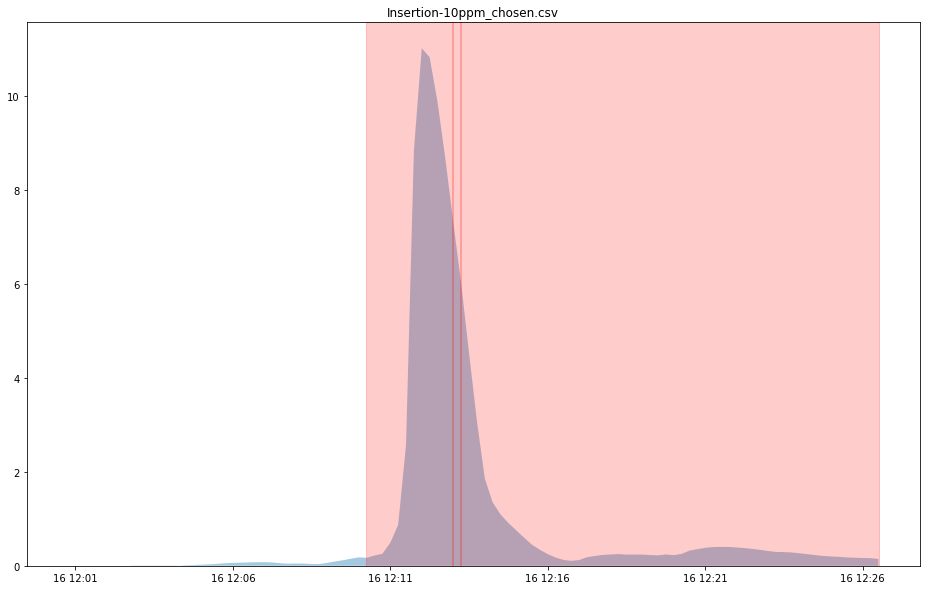

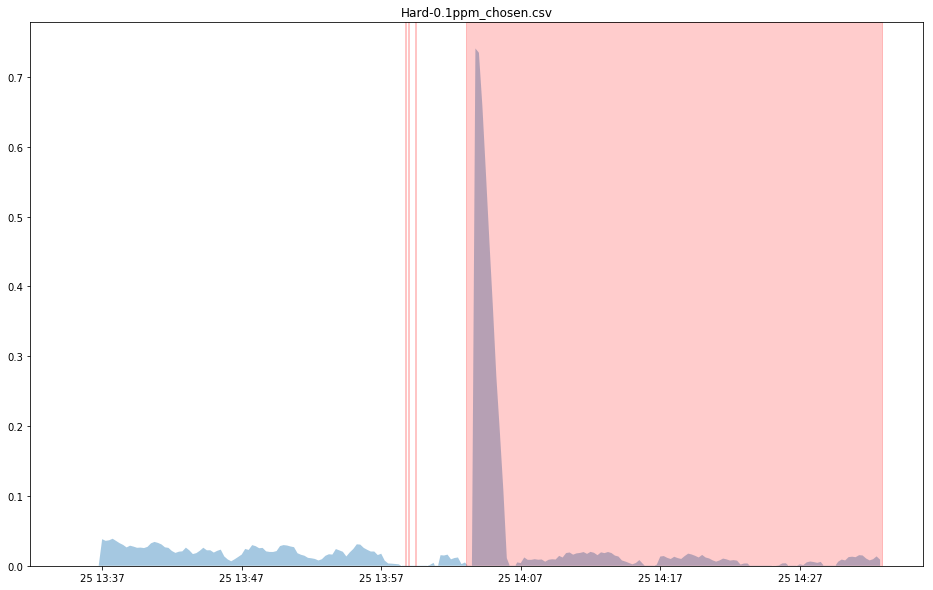

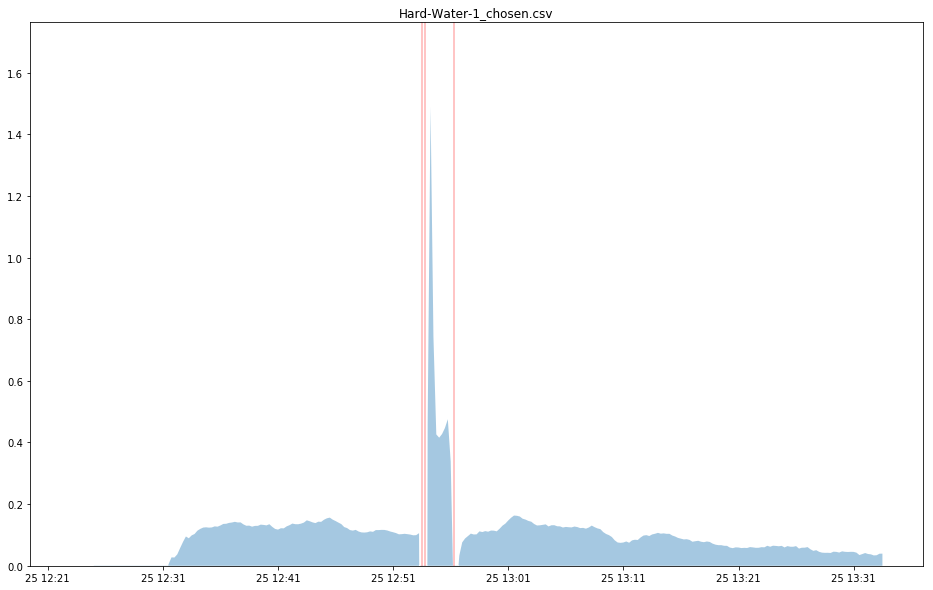

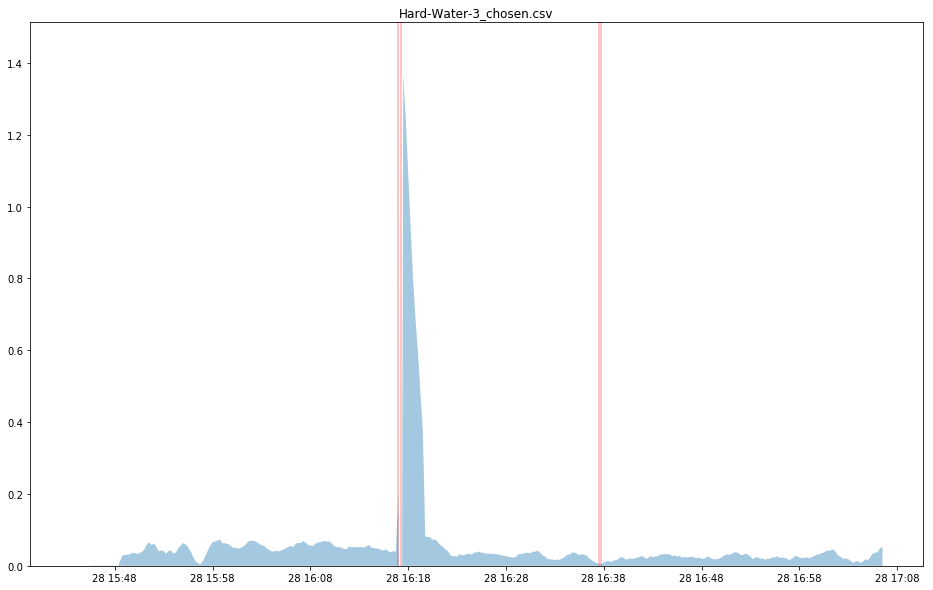

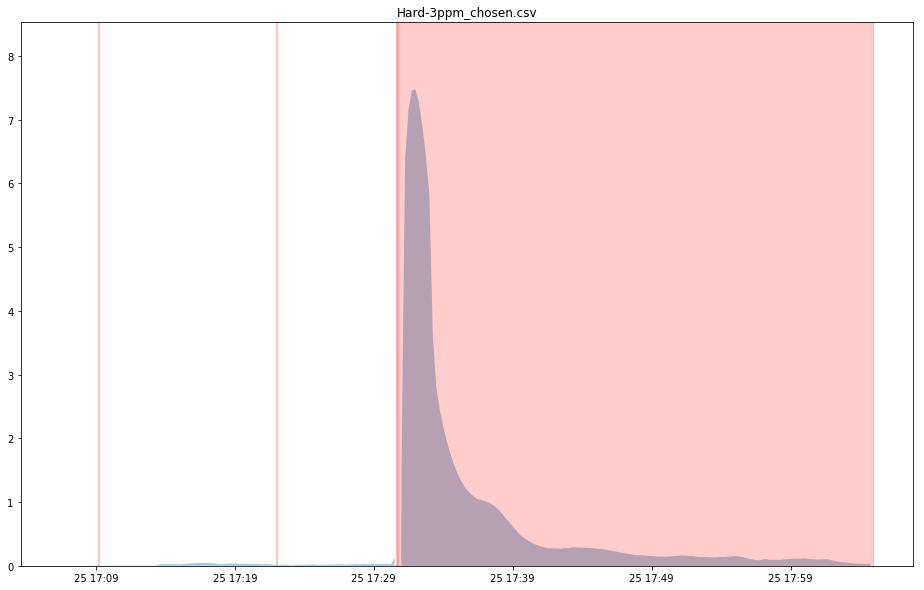

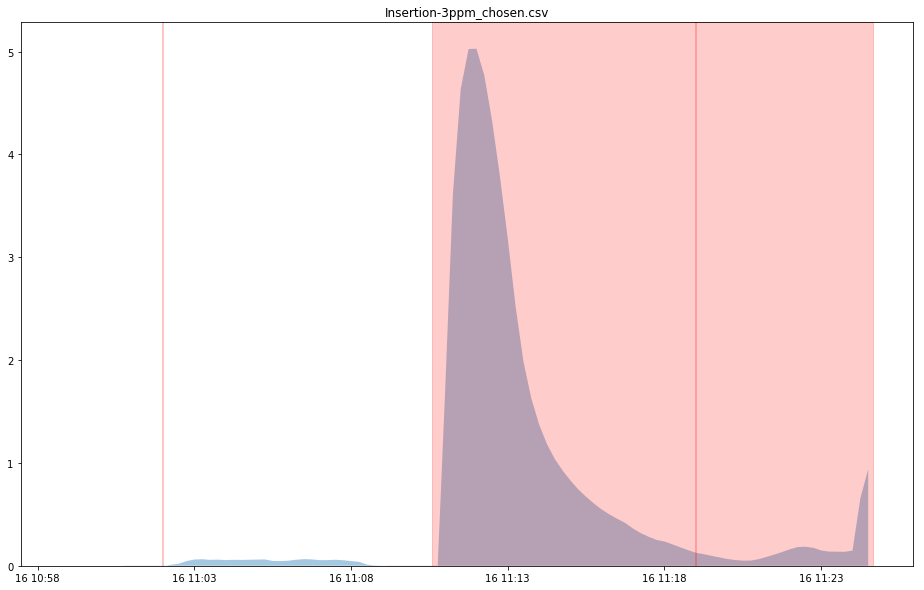

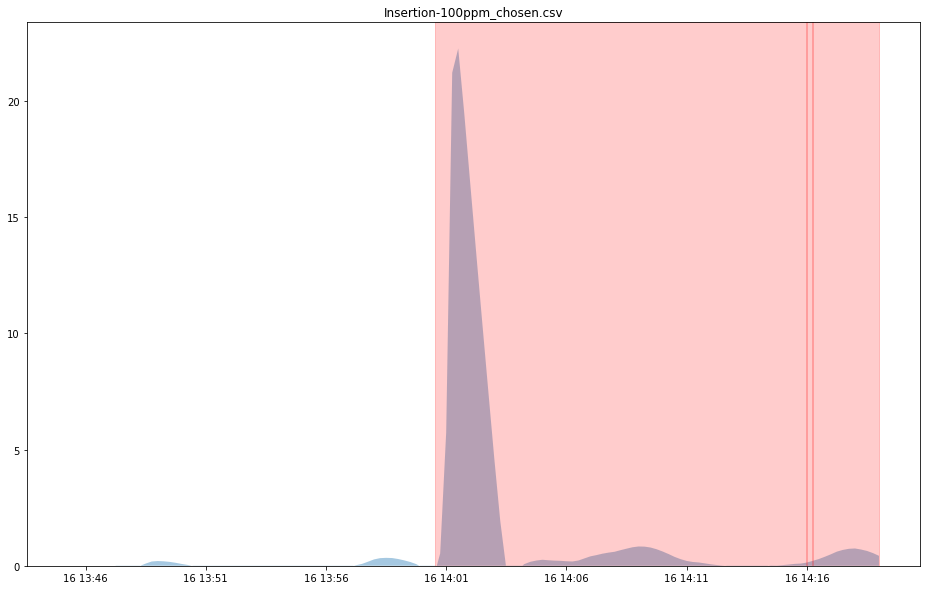

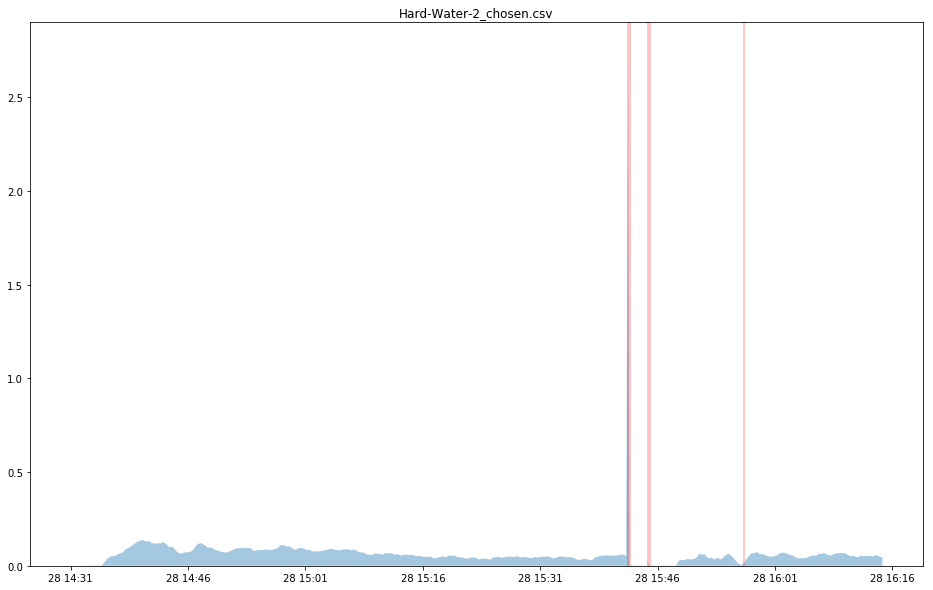

In [166]:
input_file_path = '/home/kimino/soft/qcm-detector/data/tests/test_descriptions_short.json'
with open(input_file_path, 'r') as test_json_file:
    input_file = json.loads(test_json_file.read())
tests = input_file['Tests']
for test in tests:
    test_object = test[list(test.keys())[0]]
    test_df = pd.read_csv(
        test_object['Path'], parse_dates=['Time'], index_col='Time'
    )
    resampled = test_df.resample('15s').mean()
    roll_mean = resampled.rolling(window=10).mean()
    diff = (resampled - roll_mean).fillna(0)
    lof = LocalOutlierFactor(n_neighbors = 6, metric = "manhattan", contamination = 0.01).fit(diff[:30])
    y_pred = lof.fit_predict(diff)
    fig, ax = plt.subplots(figsize=(16,10))
    index = resampled.index

    ax.fill_between(x = diff.index, y1 = diff['Resistance'],alpha = 0.4)
    # ax.plot(x = diff.index, y = diff['Resistance'], alpha = 0.8)
    for x in np.where(y_pred < 0)[0]:
        ax.axvline(x = index[x], alpha = 0.3, color = 'red')
    _, y_max = ax.get_ylim()
    ax.set_ylim([0,y_max])
    for anomaly in test_object['Anomalies']:
        start = test_df.iloc[anomaly['Start']].name
        end = test_df.iloc[anomaly['End']-1].name
        ax.axvspan(start, end, alpha= 0.2, color = 'red')
    plt.title(f"{test_object['Path'].split('/')[-1]}")
    plt.show()

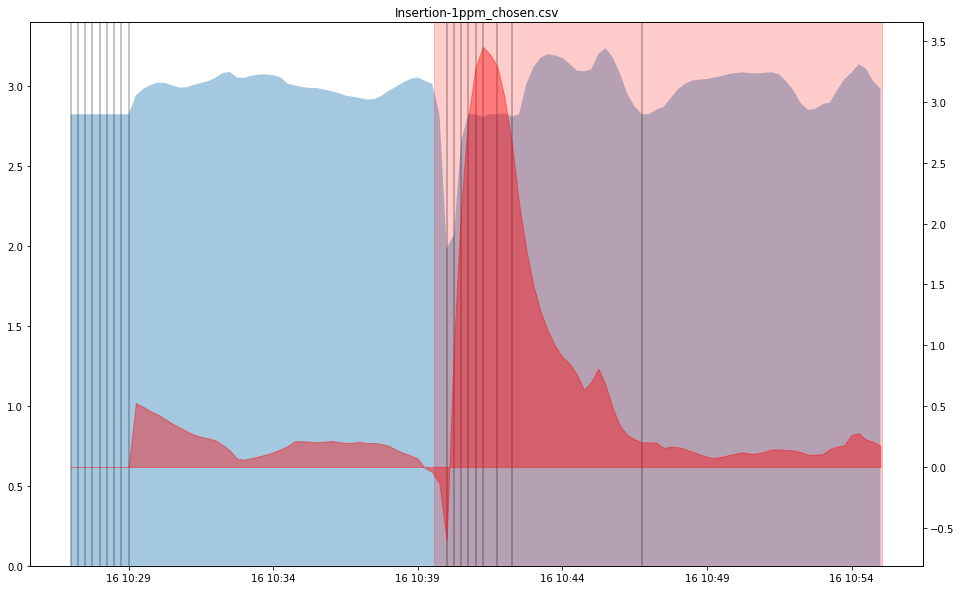

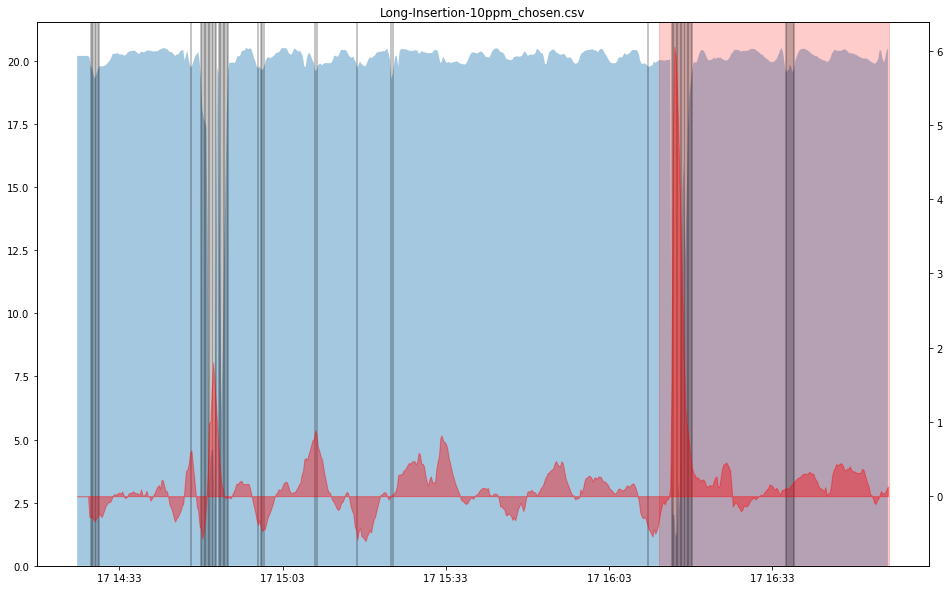

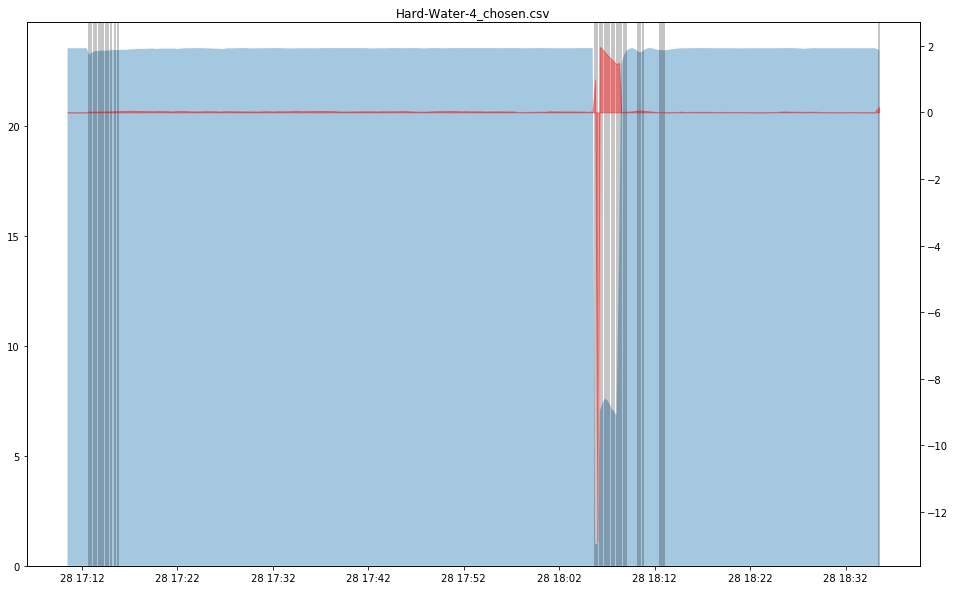

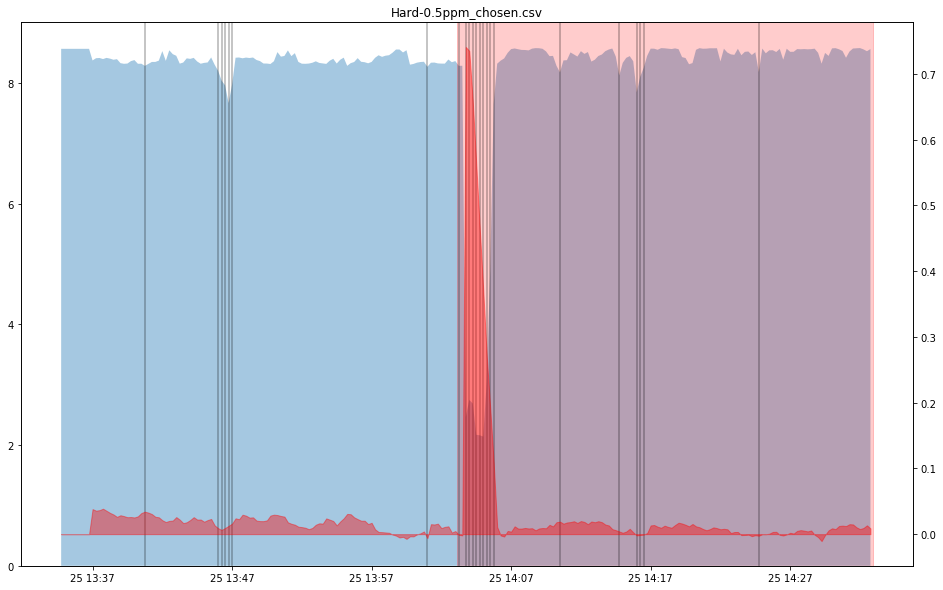

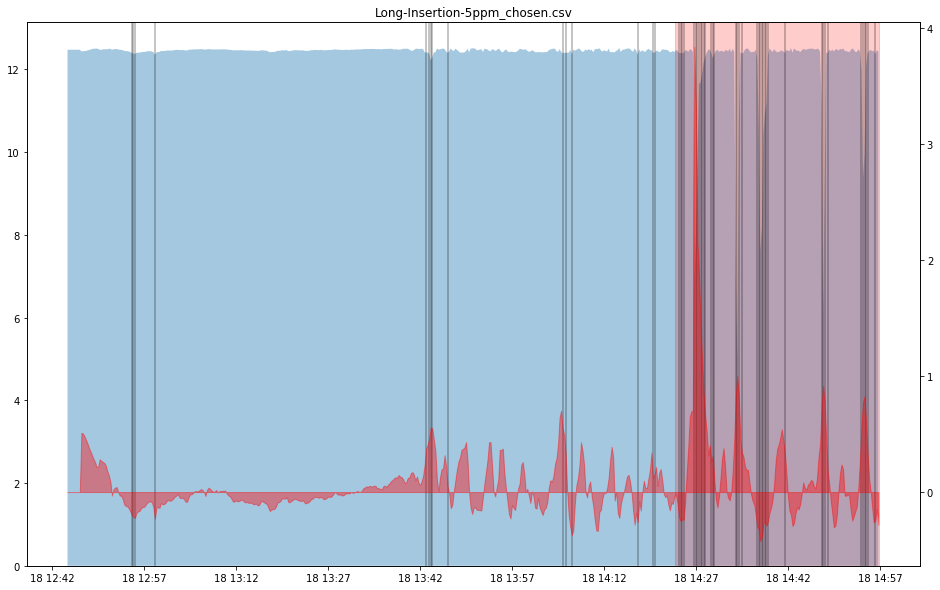

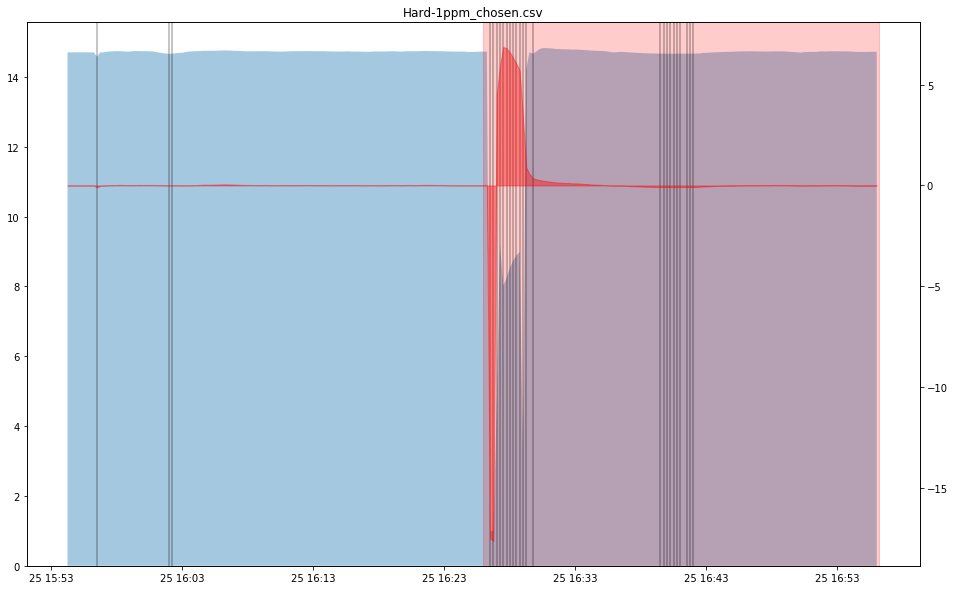

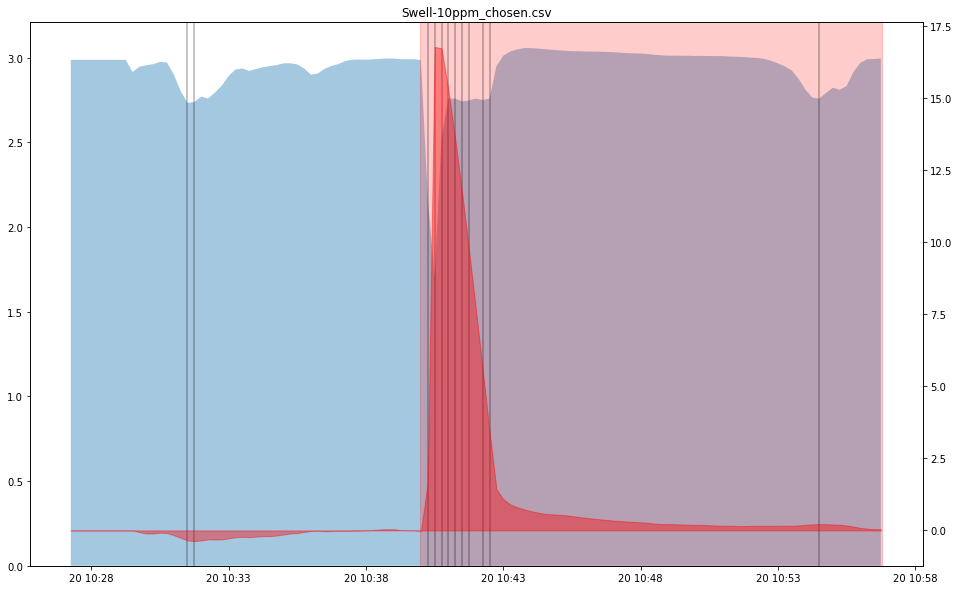

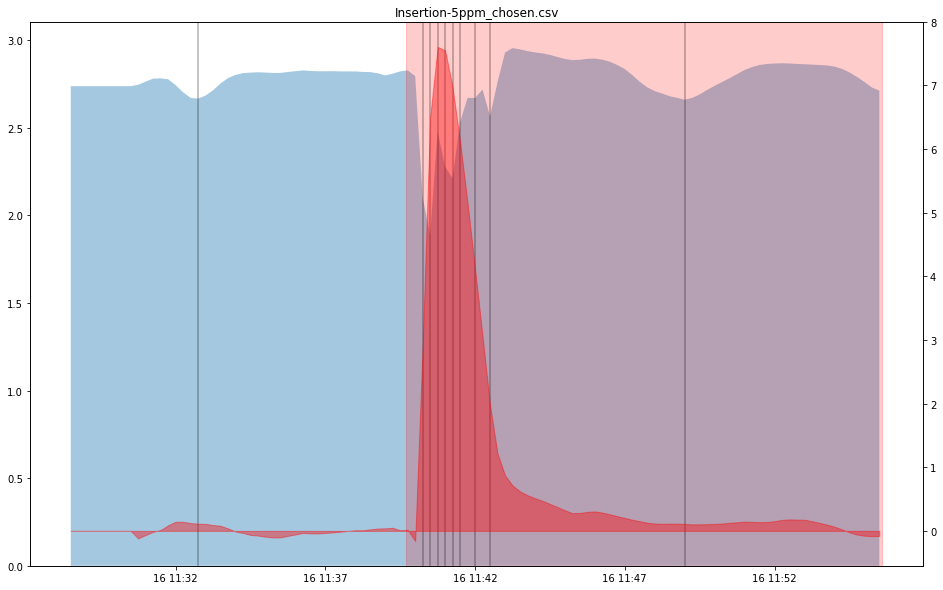

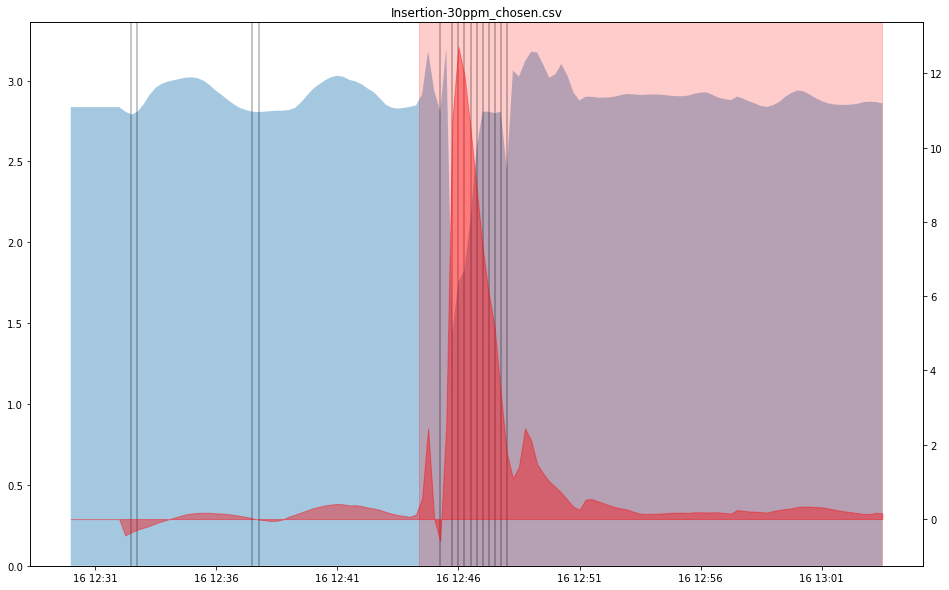

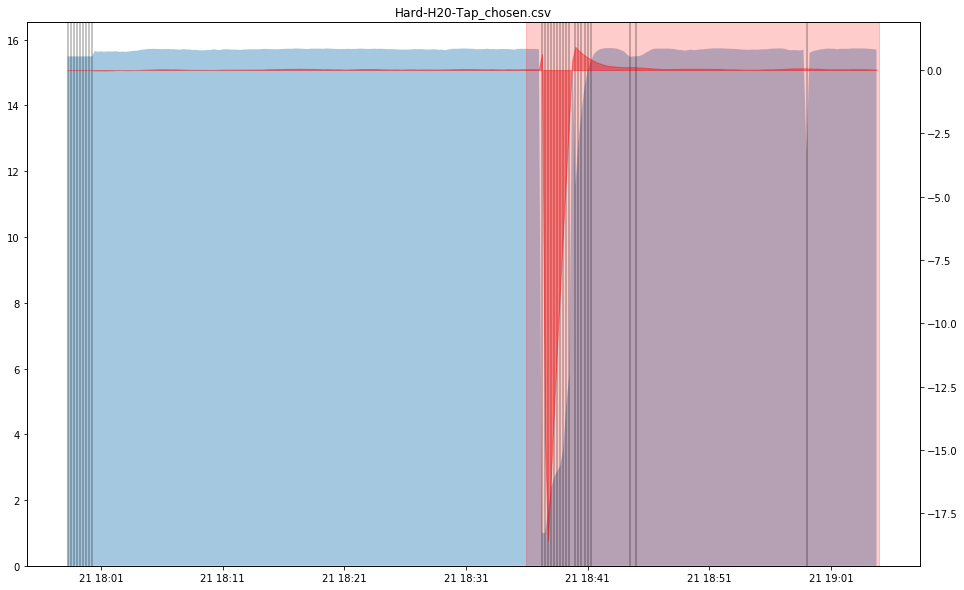

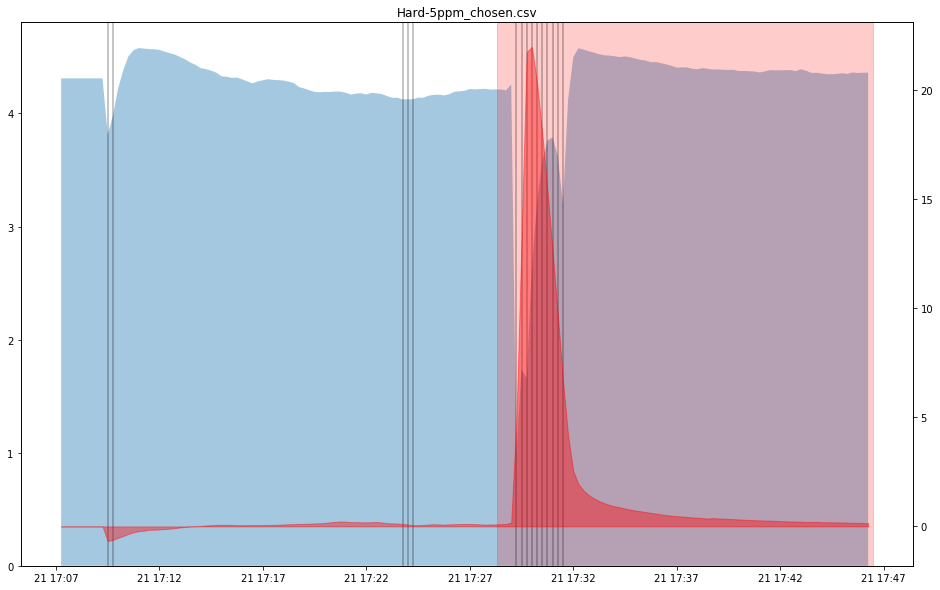

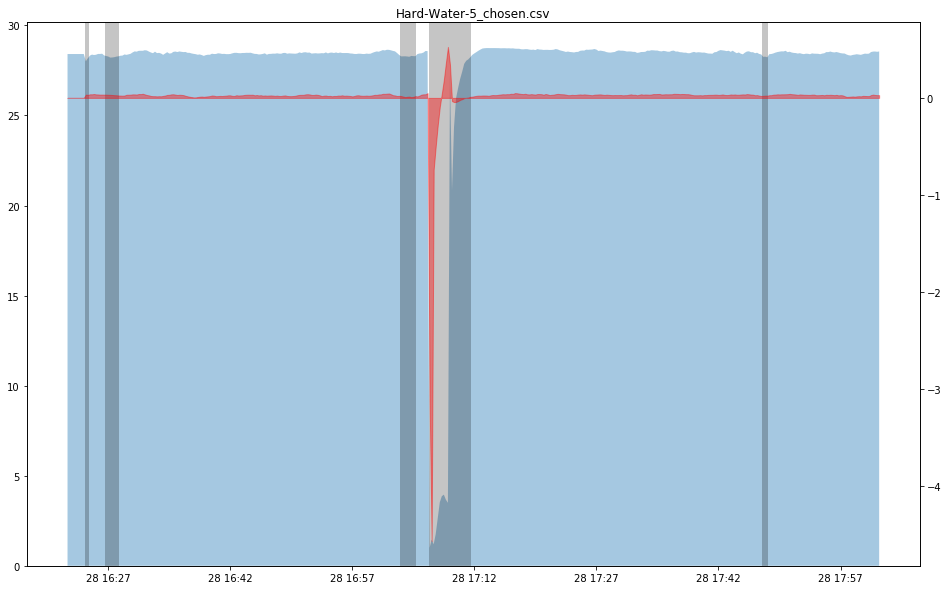

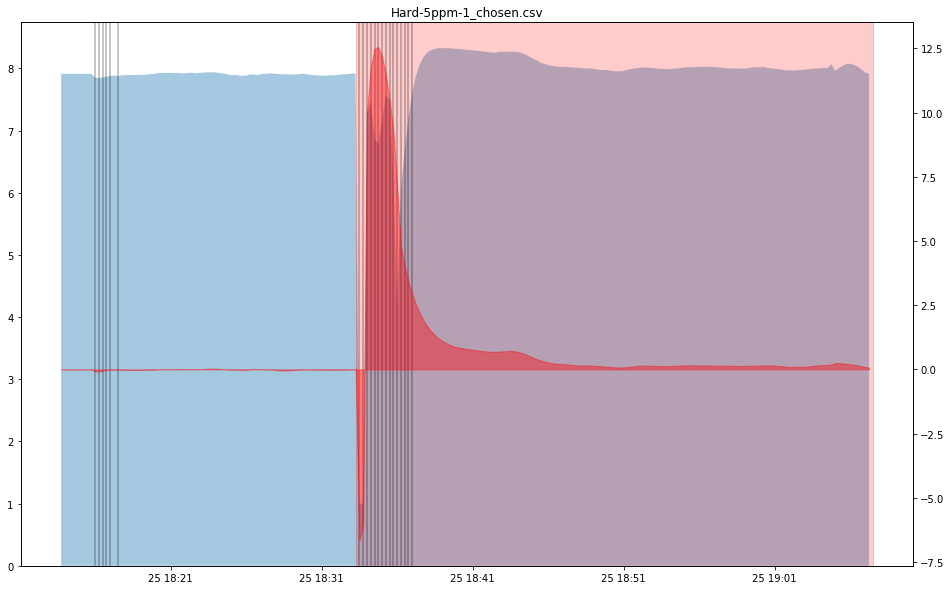

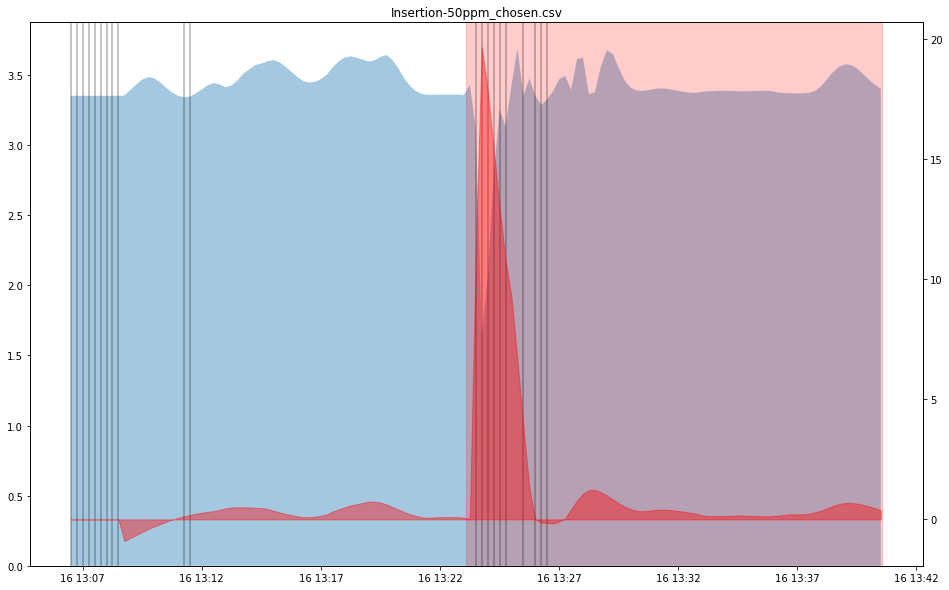

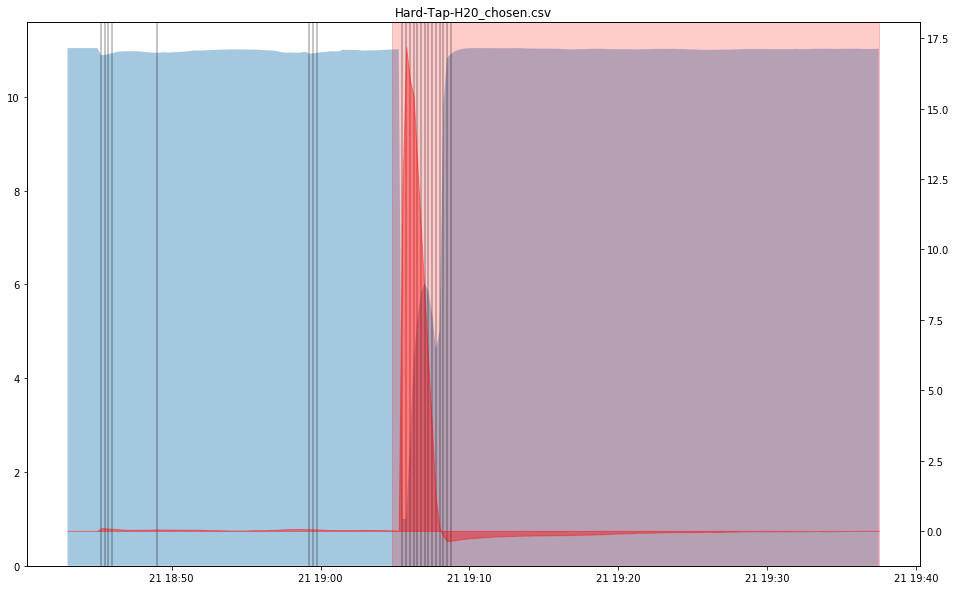

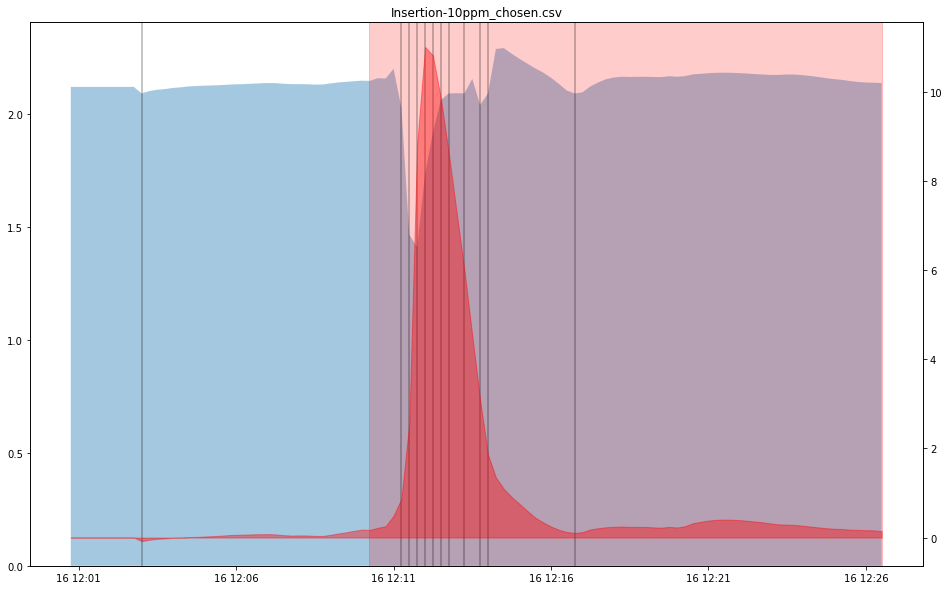

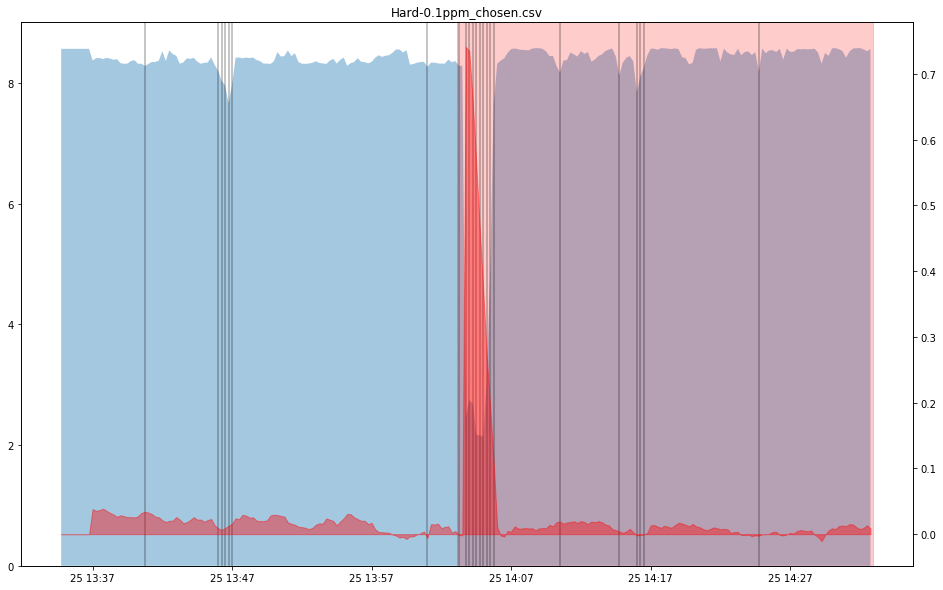

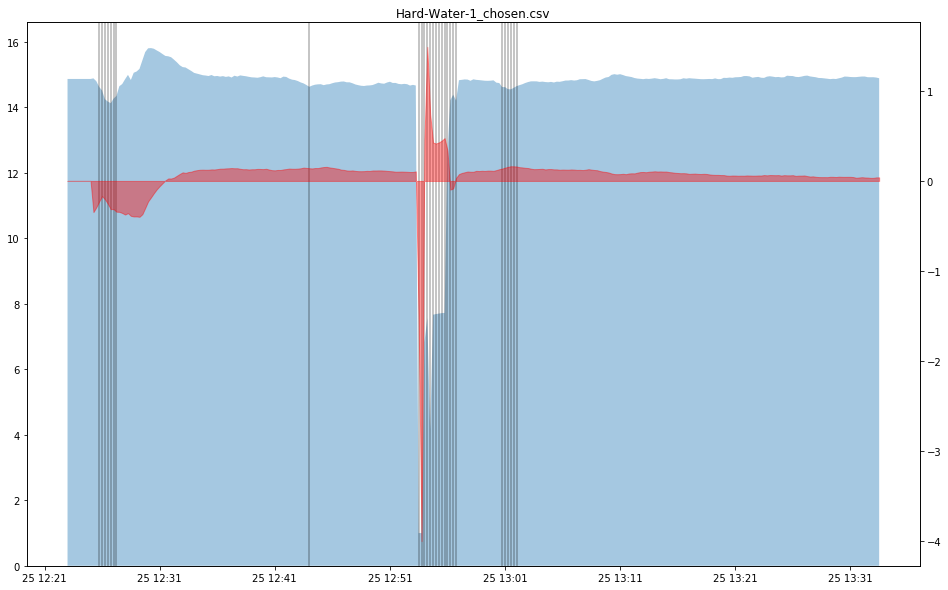

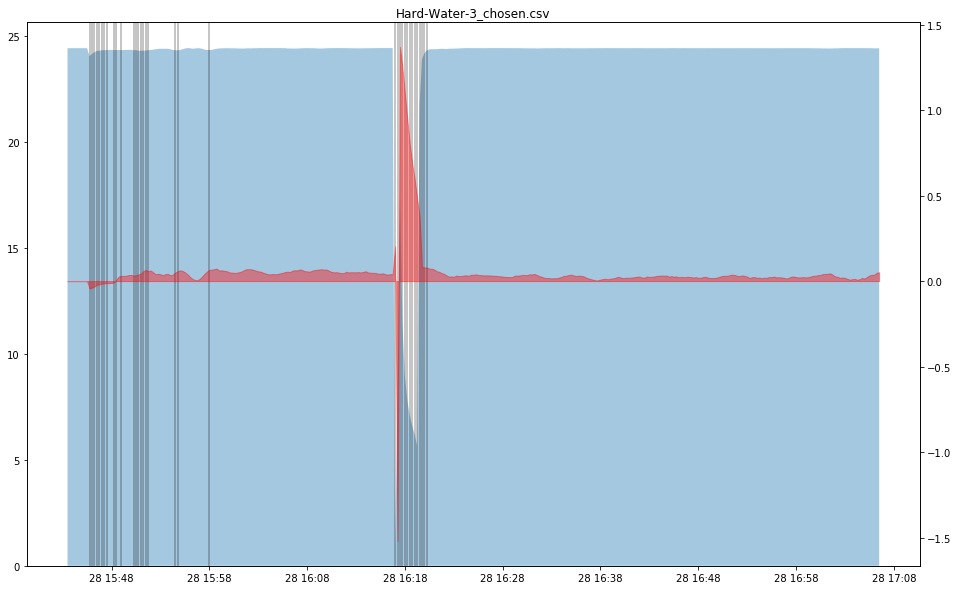

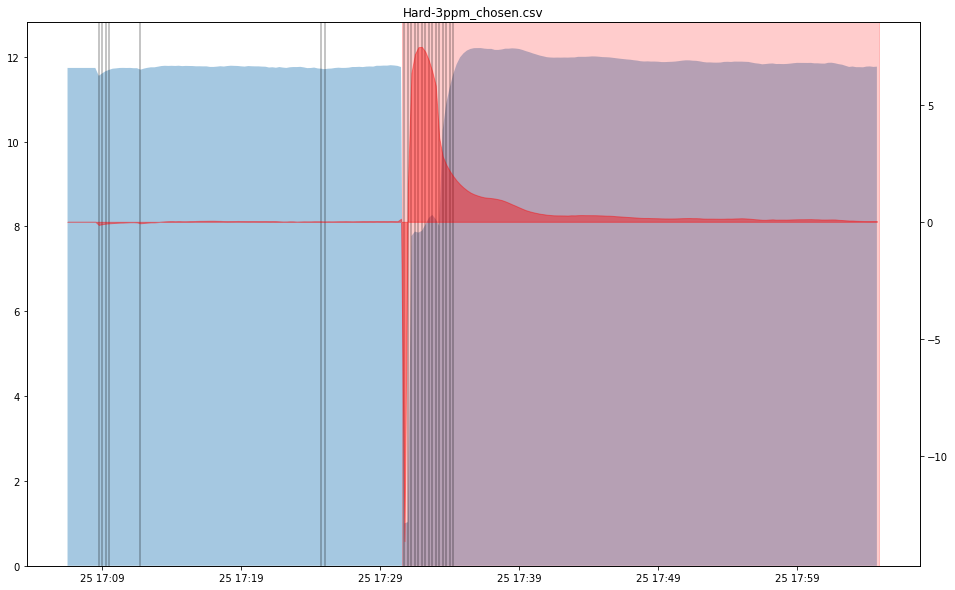

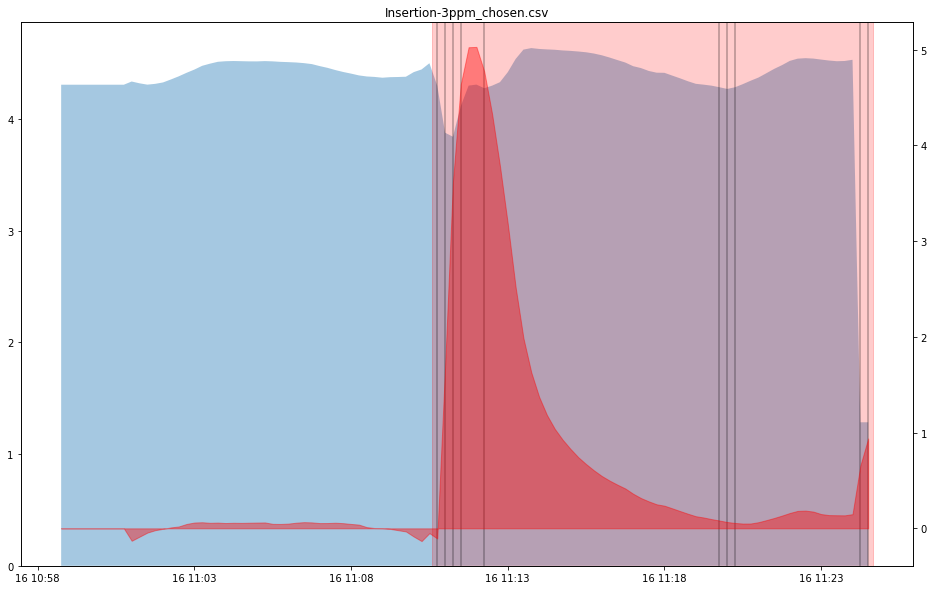

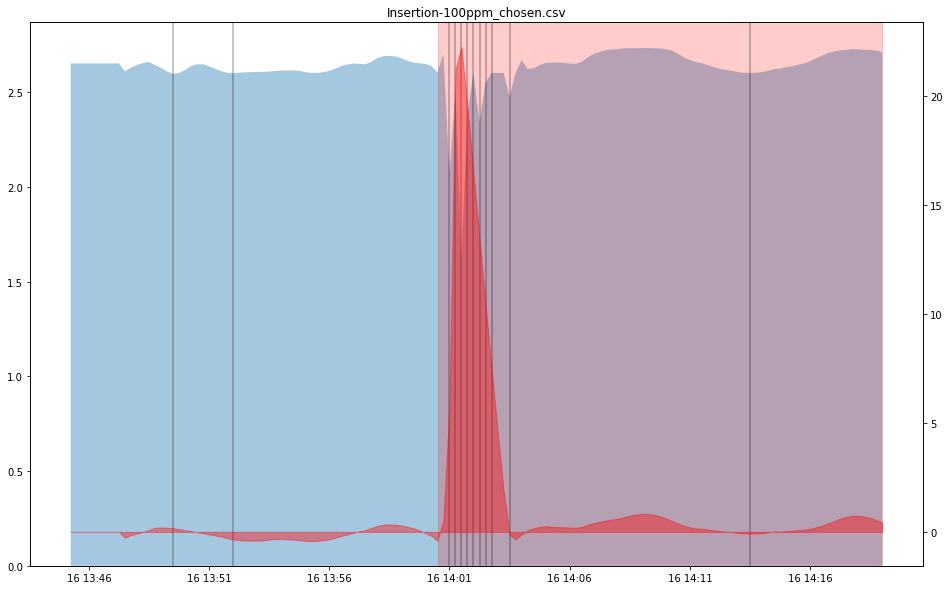

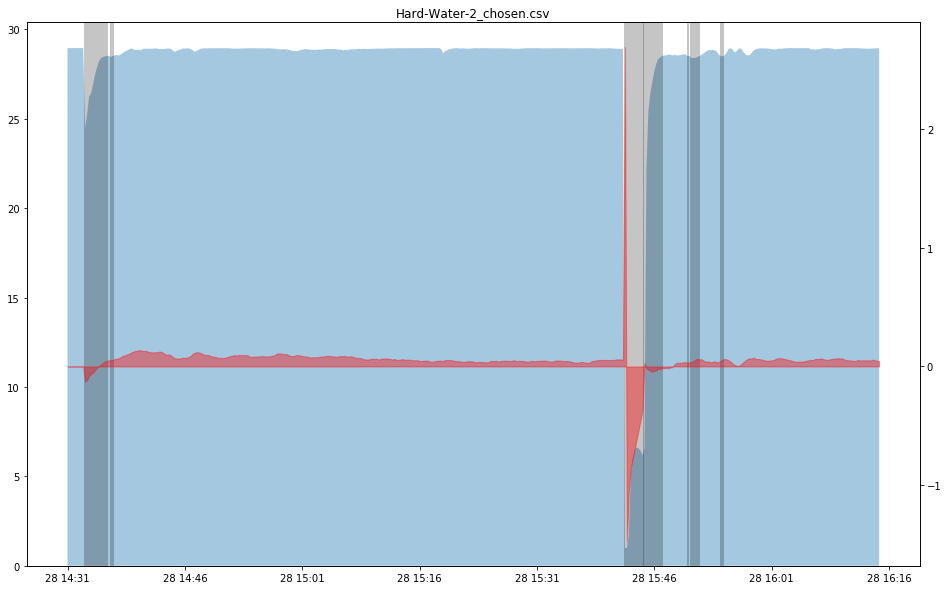

In [162]:
input_file_path = '/home/kimino/soft/qcm-detector/data/tests/test_descriptions_short.json'
with open(input_file_path, 'r') as test_json_file:
    input_file = json.loads(test_json_file.read())
tests = input_file['Tests']
for test in tests:
    test_object = test[list(test.keys())[0]]
    test_df = pd.read_csv(
        test_object['Path'], parse_dates=['Time'], index_col='Time'
    )
    resampled = test_df.resample('15s').mean()
    roll_mean = resampled.rolling(window=10).mean()
    diff = (resampled - roll_mean).fillna(0)

    
    clf = OneClassSVM(kernel = 'rbf', gamma='scale', nu=0.1).fit(diff[:30])
    y_pred = clf.fit_predict(diff)
    scores = clf.score_samples(diff)
    index = diff.index

    fig, ax = plt.subplots(figsize=(16,10))
    tax = ax.twinx()
    ax.fill_between(x = index, y1 = scores, alpha = 0.4)
    tax.fill_between(x = index, y1 = diff['Resistance'], alpha = 0.4, color = 'red')
    for x in np.where(y_pred < 0)[0]:
        ax.axvline(x = index[x], alpha = 0.3, color = 'black')
    _, y_max = ax.get_ylim()
    ax.set_ylim([0,y_max])
    for anomaly in test_object['Anomalies']:
        start = test_df.iloc[anomaly['Start']].name
        end = test_df.iloc[anomaly['End']-1].name
        ax.axvspan(start, end, alpha= 0.2, color = 'red')
    plt.title(f"{test_object['Path'].split('/')[-1]}")
    plt.show()

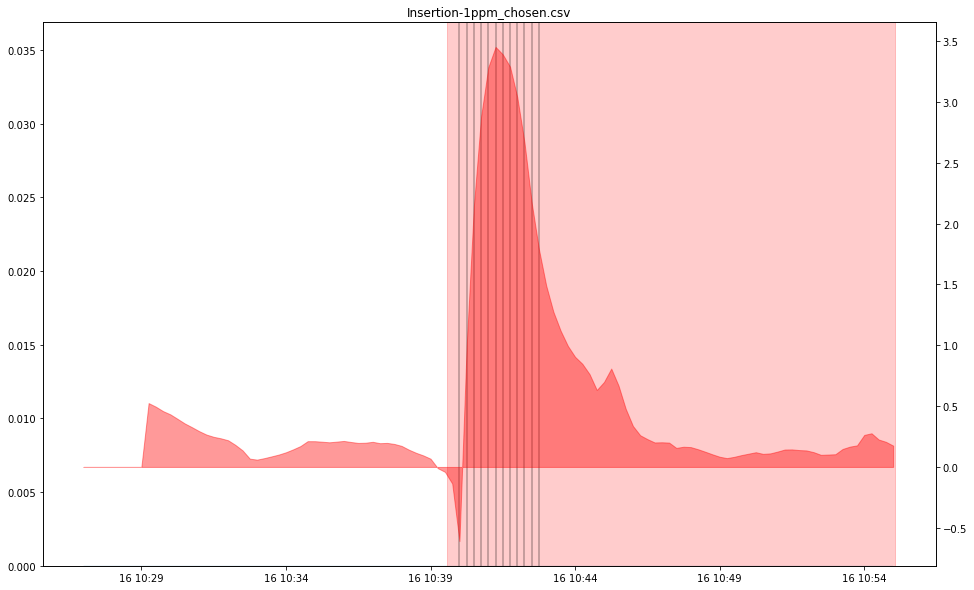

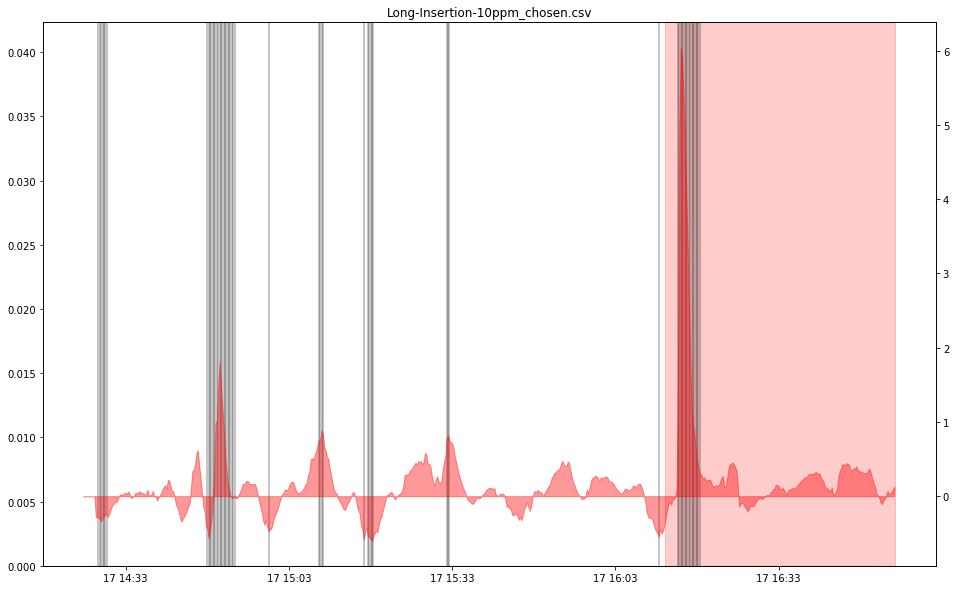

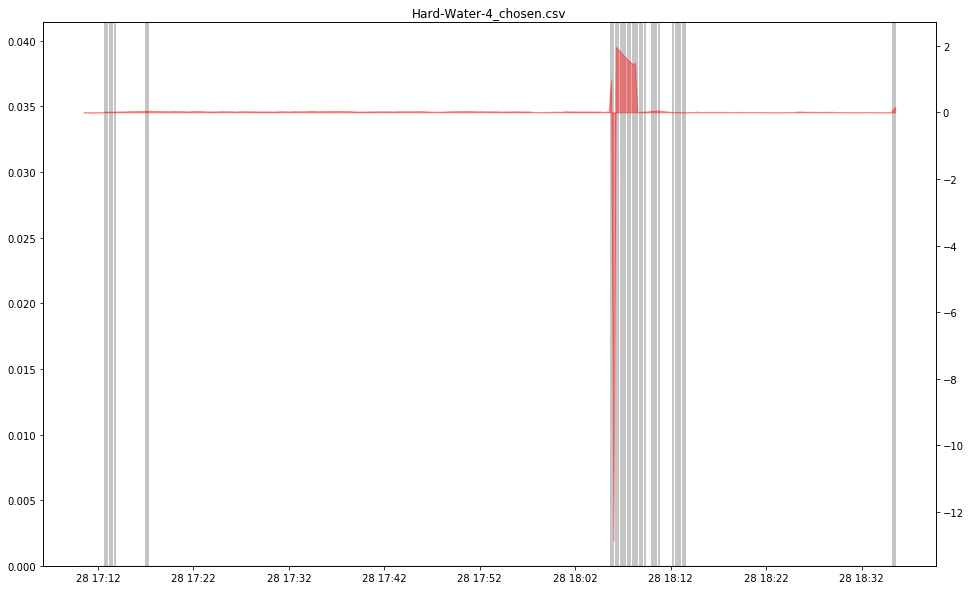

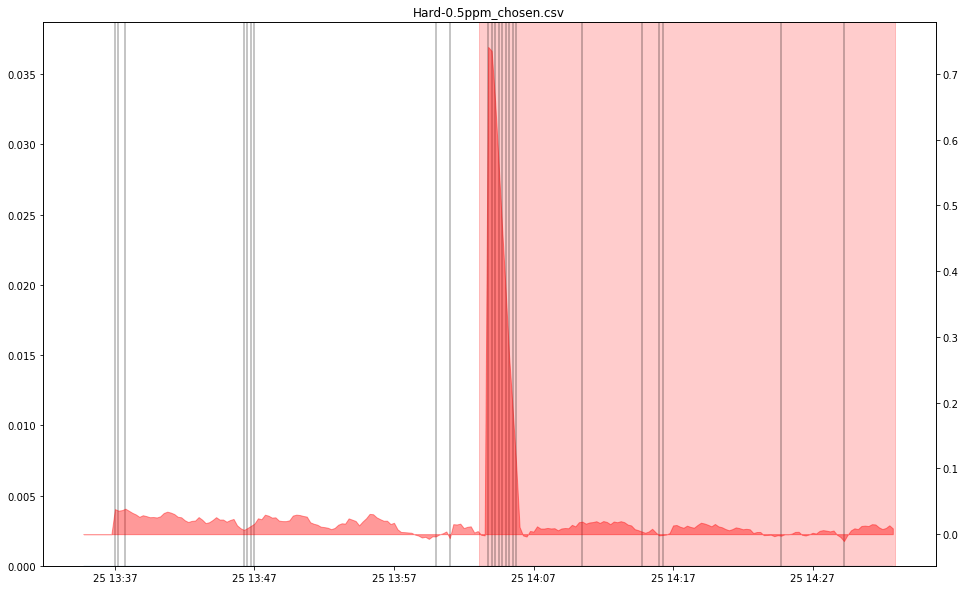

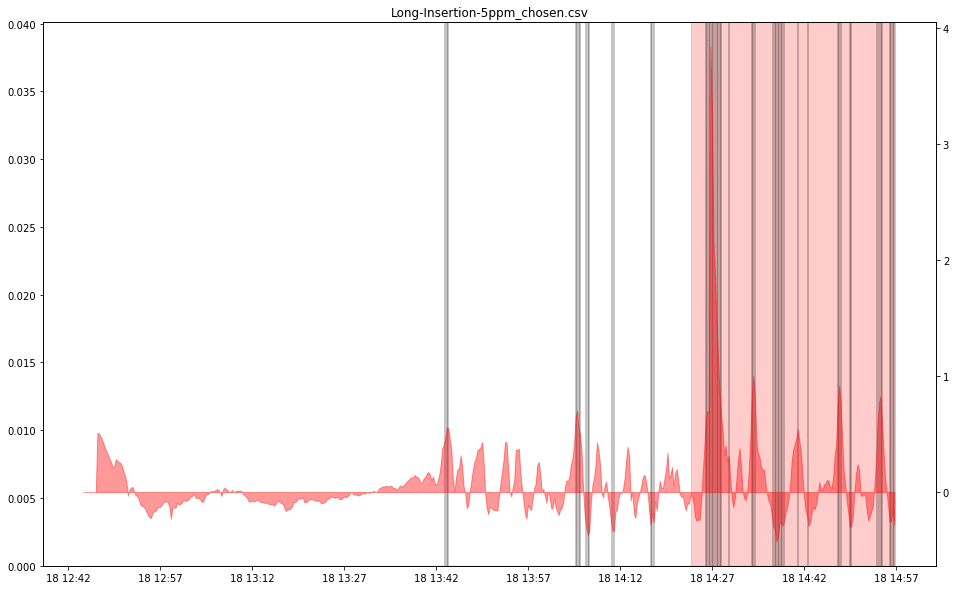

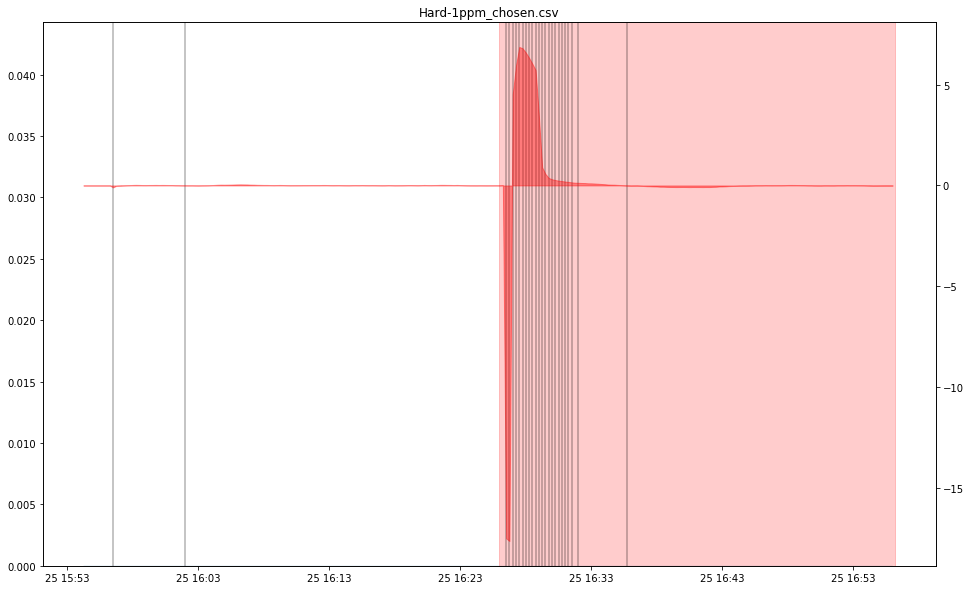

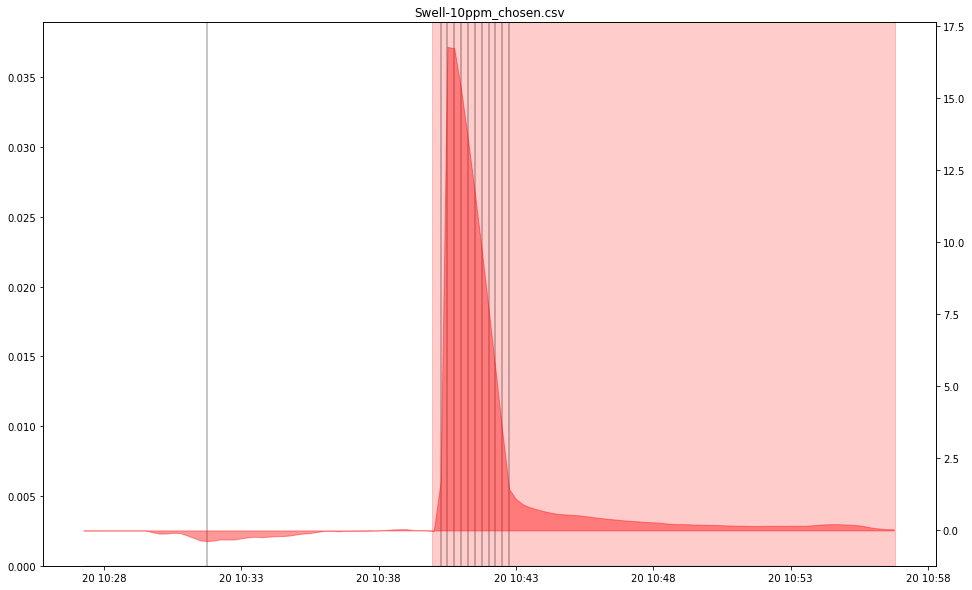

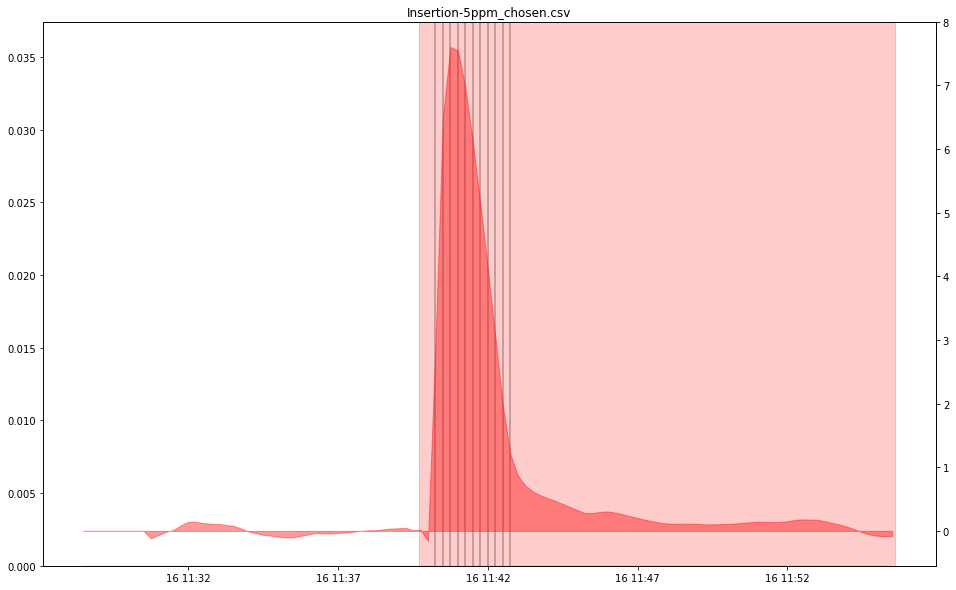

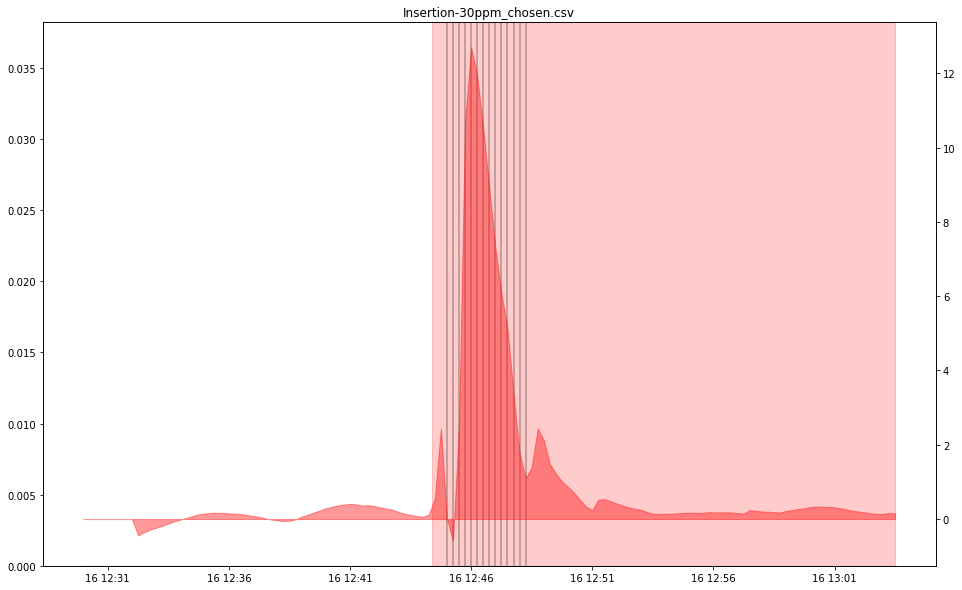

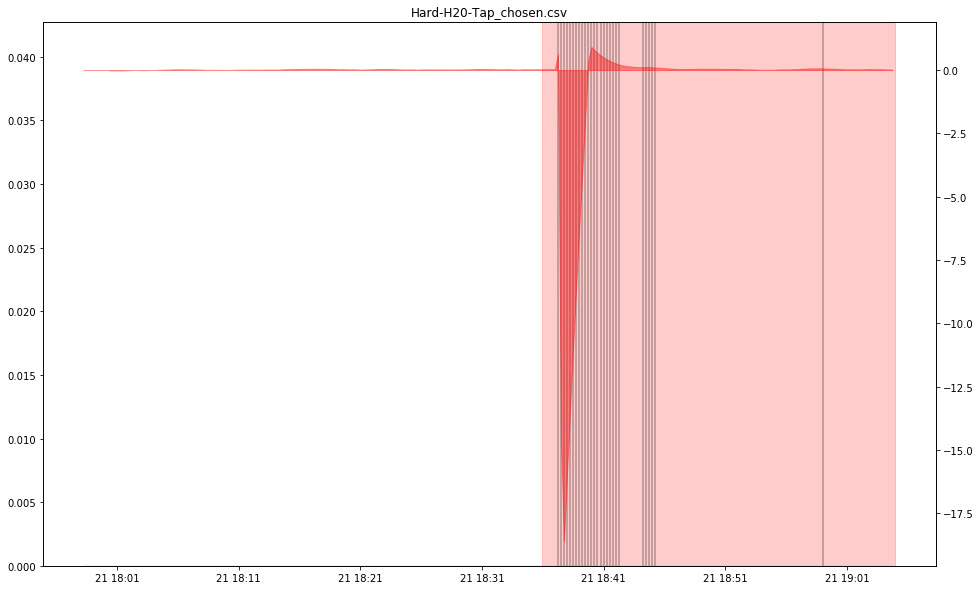

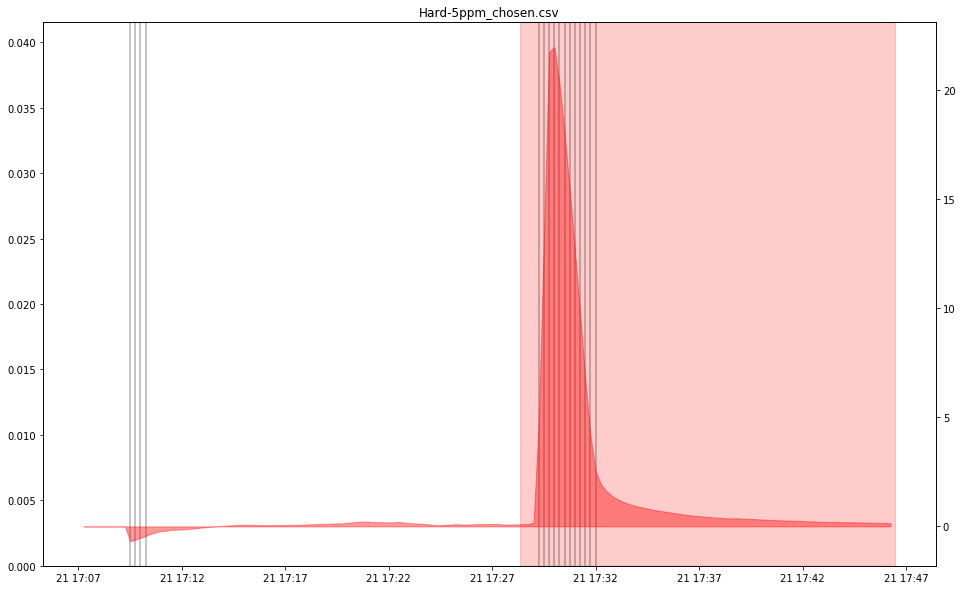

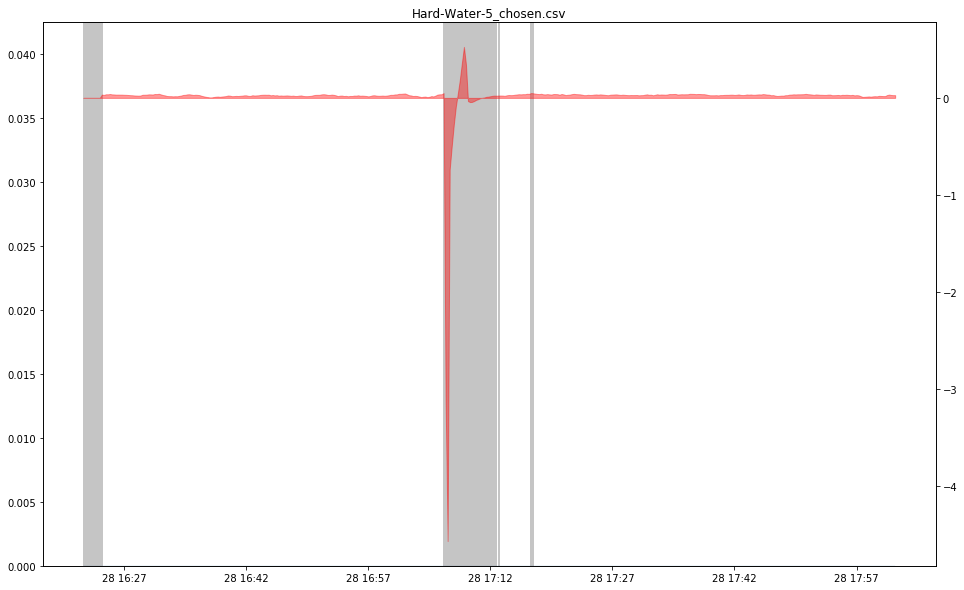

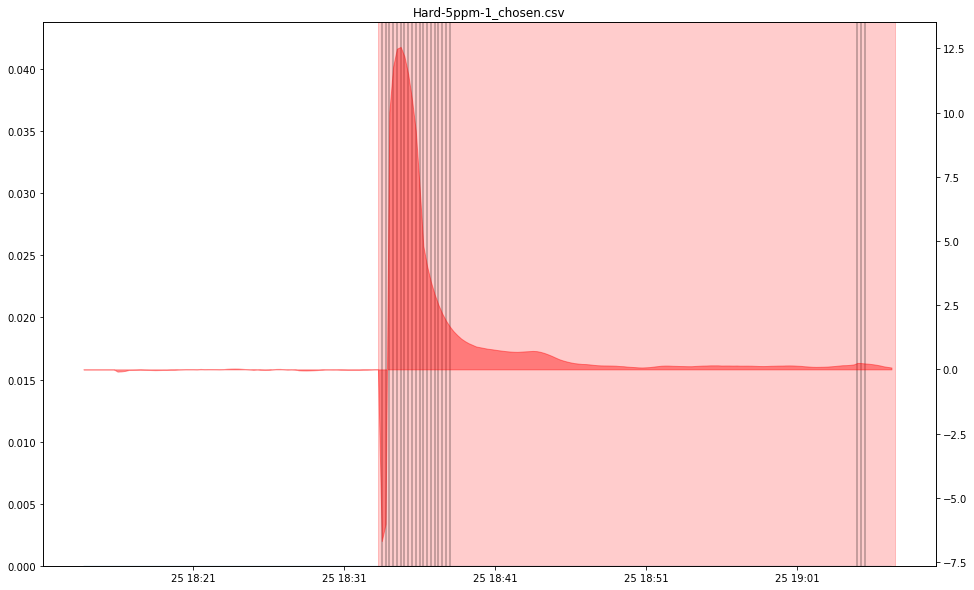

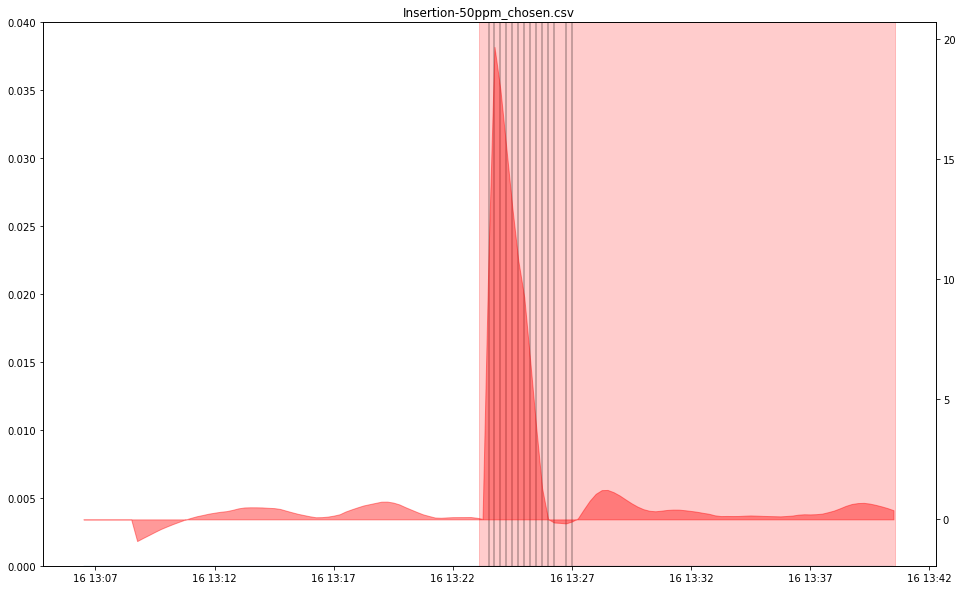

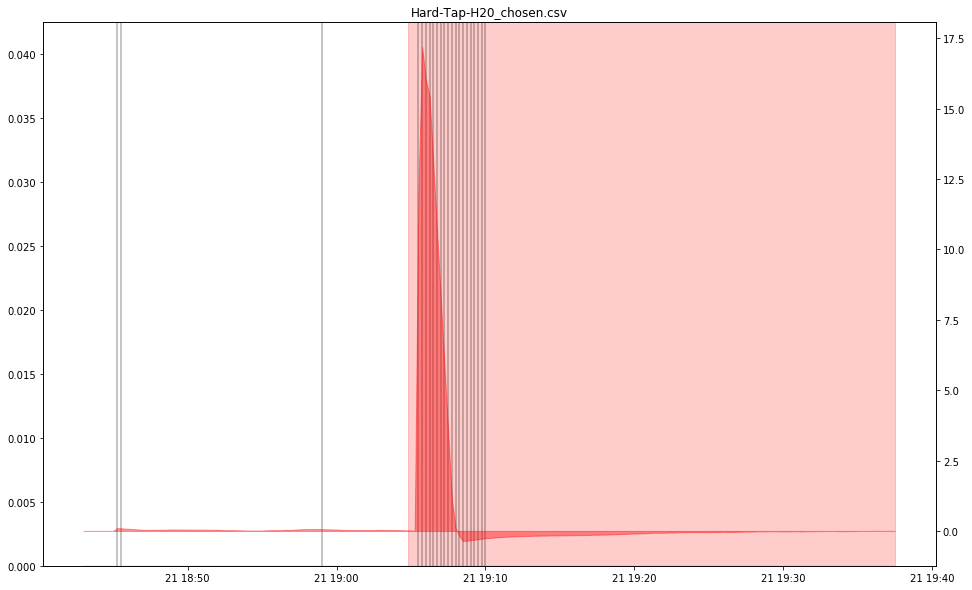

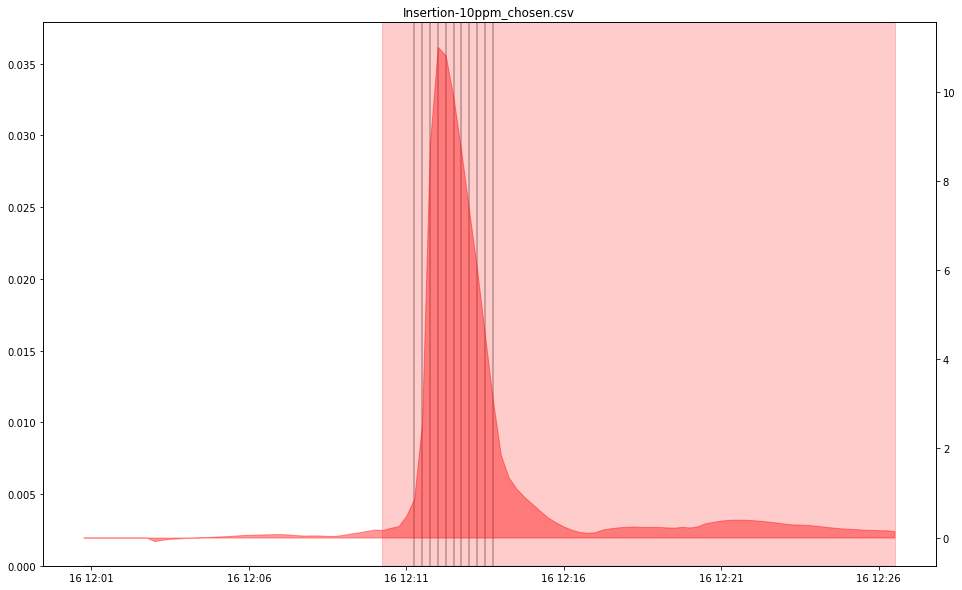

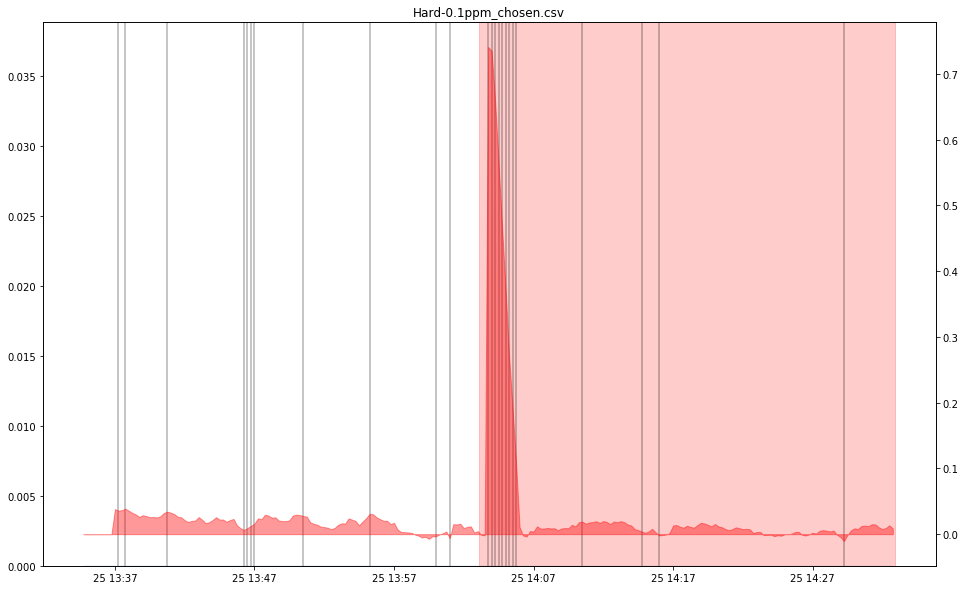

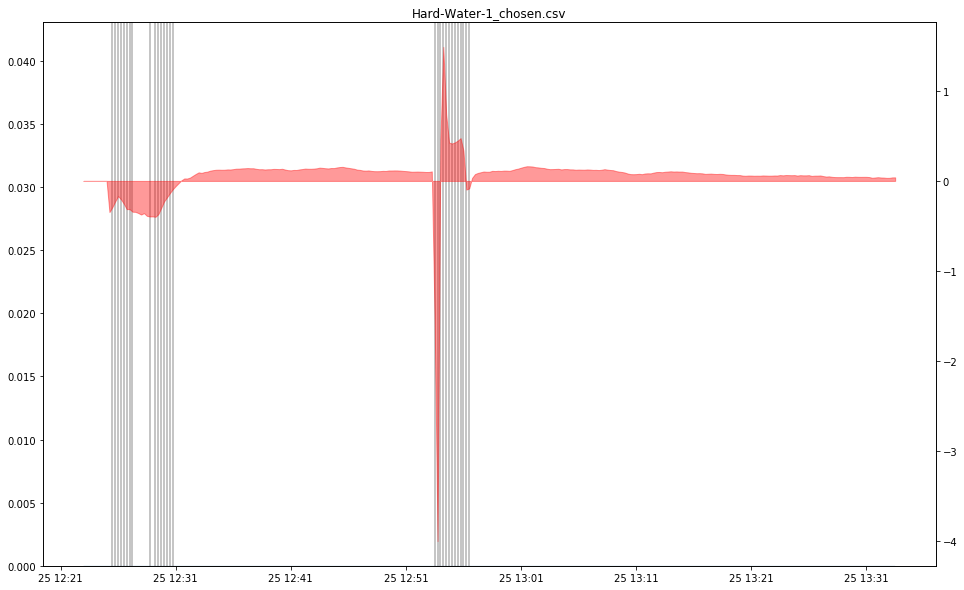

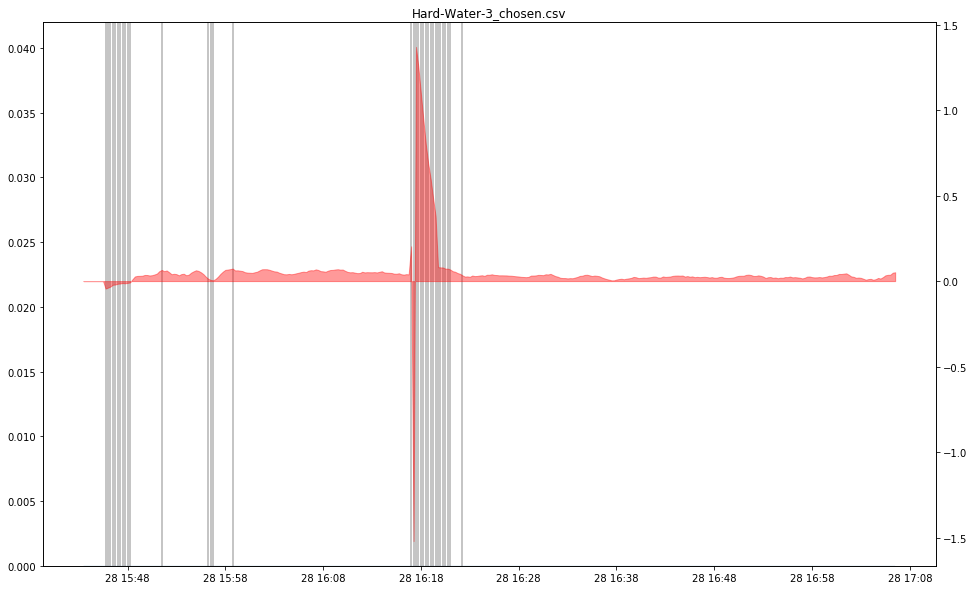

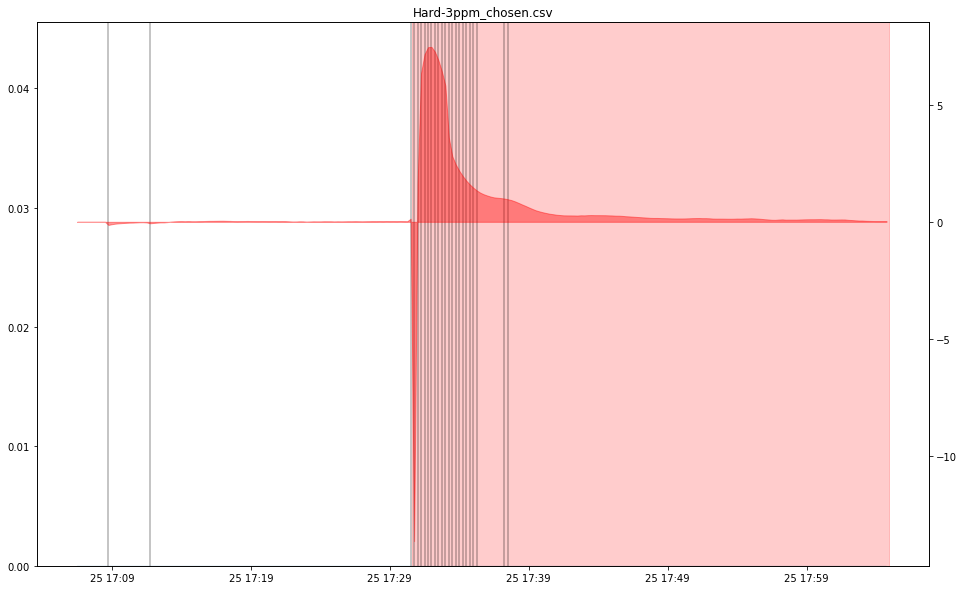

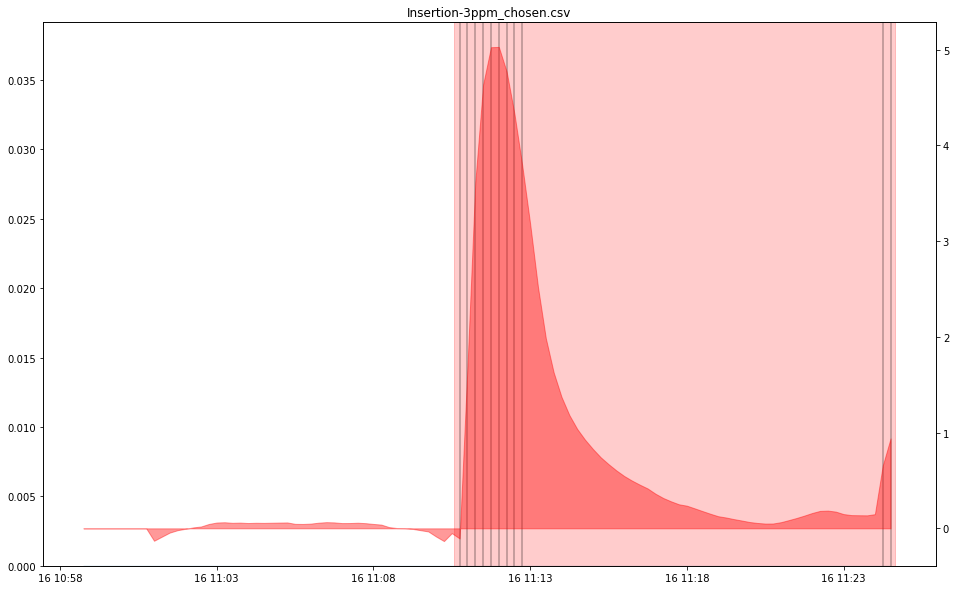

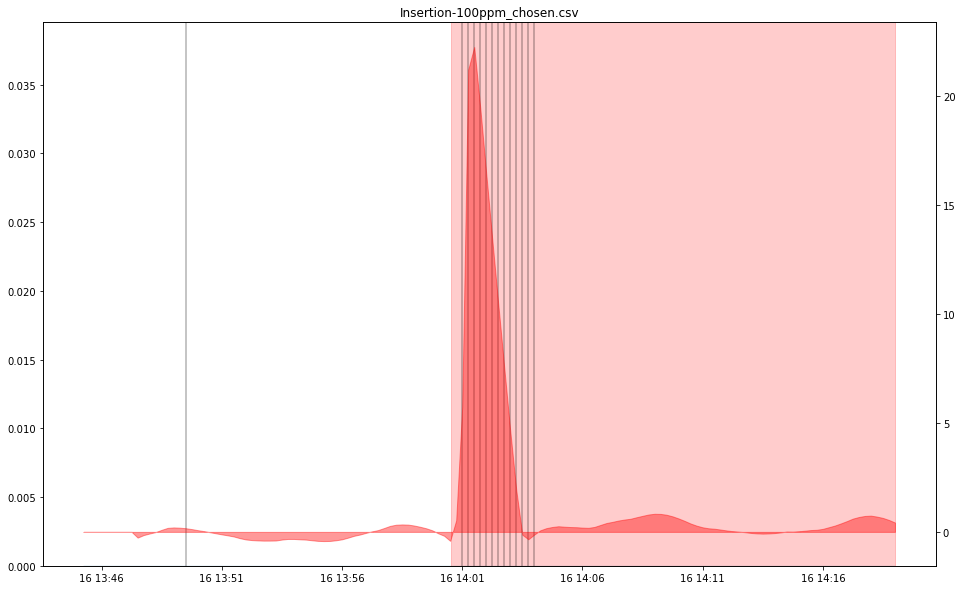

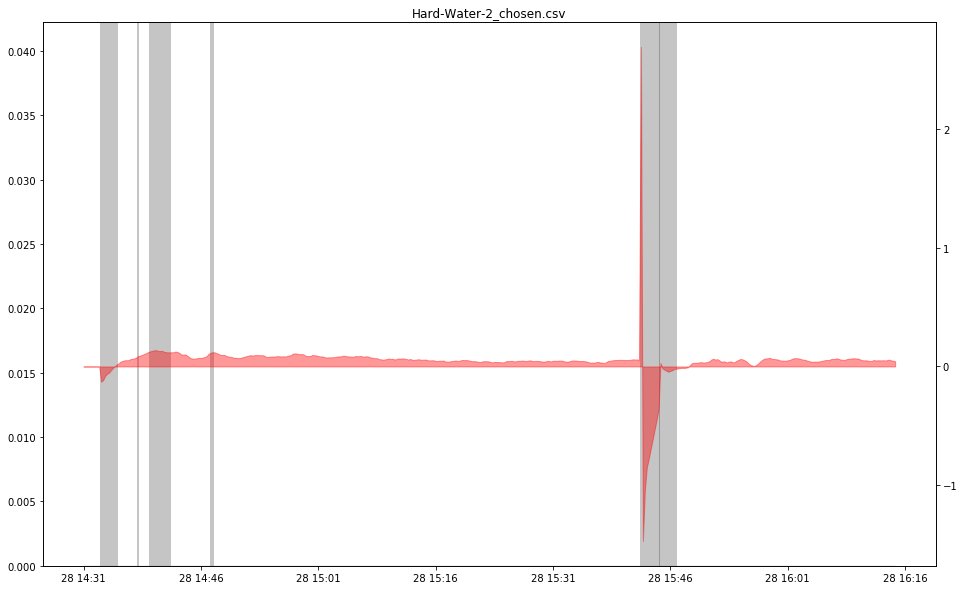

In [163]:
input_file_path = '/home/kimino/soft/qcm-detector/data/tests/test_descriptions_short.json'
with open(input_file_path, 'r') as test_json_file:
    input_file = json.loads(test_json_file.read())
tests = input_file['Tests']
for test in tests:
    test_object = test[list(test.keys())[0]]
    test_df = pd.read_csv(
        test_object['Path'], parse_dates=['Time'], index_col='Time'
    )
    resampled = test_df.resample('15s').mean()
    roll_mean = resampled.rolling(window=10).mean()
    diff = (resampled - roll_mean).fillna(0)

    
    clf = IsolationForest(contamination=0.1).fit(diff[:30])
    y_pred = clf.fit_predict(diff)
    scores = clf.score_samples(diff)
    index = diff.index

    fig, ax = plt.subplots(figsize=(16,10))
    tax = ax.twinx()
    ax.fill_between(x = index, y1 = scores, alpha = 0.4)
    tax.fill_between(x = index, y1 = diff['Resistance'], alpha = 0.4, color = 'red')
    for x in np.where(y_pred < 0)[0]:
        ax.axvline(x = index[x], alpha = 0.3, color = 'black')
    _, y_max = ax.get_ylim()
    ax.set_ylim([0,y_max])
    for anomaly in test_object['Anomalies']:
        start = test_df.iloc[anomaly['Start']].name
        end = test_df.iloc[anomaly['End']-1].name
        ax.axvspan(start, end, alpha= 0.2, color = 'red')
    plt.title(f"{test_object['Path'].split('/')[-1]}")
    plt.show()

[]

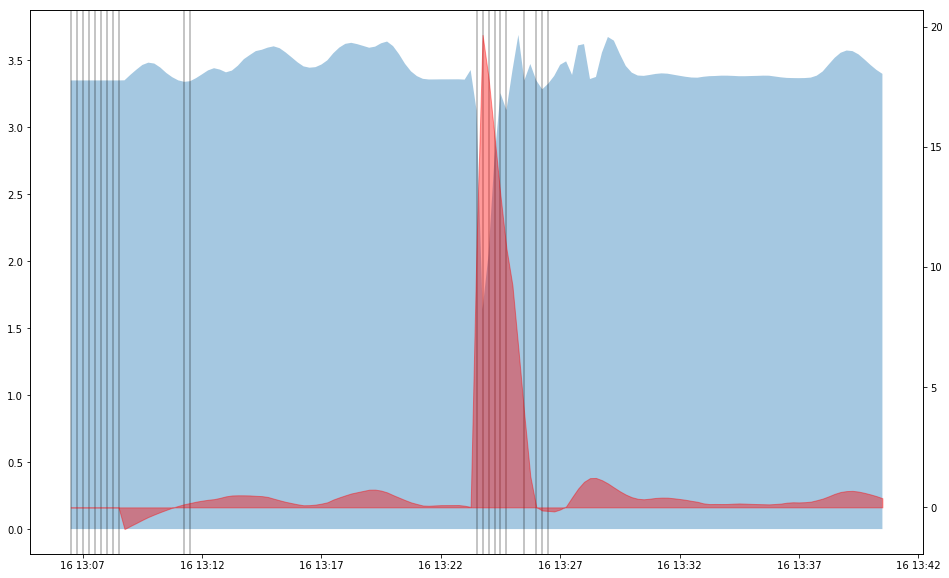

In [154]:
df = pd.read_csv("/home/kimino/soft/qcm-detector/data/tests/Insertion-50ppm_chosen.csv", parse_dates=['Time'], index_col = 'Time')
resampled = df.resample('15s').mean()
roll_mean = resampled.rolling(window=10).mean()
diff = (resampled - roll_mean).fillna(0)
clf = OneClassSVM(kernel = 'rbf', gamma='scale', nu=0.1).fit(diff[:30])
y_pred = clf.fit_predict(diff)
scores = clf.score_samples(diff)
threshold = 2
fig, ax = plt.subplots(figsize=(16,10))
index = diff.index
tax = ax.twinx()
ax.fill_between(x = index, y1 = scores, alpha = 0.4)
tax.fill_between(x = index, y1 = diff['Resistance'], alpha = 0.4, color = 'red')
for x in np.where(y_pred < 0)[0]:
    ax.axvline(x = index[x], alpha = 0.3, color = 'black')
_, y_max = ax.get_ylim()
plt.plot()

[]

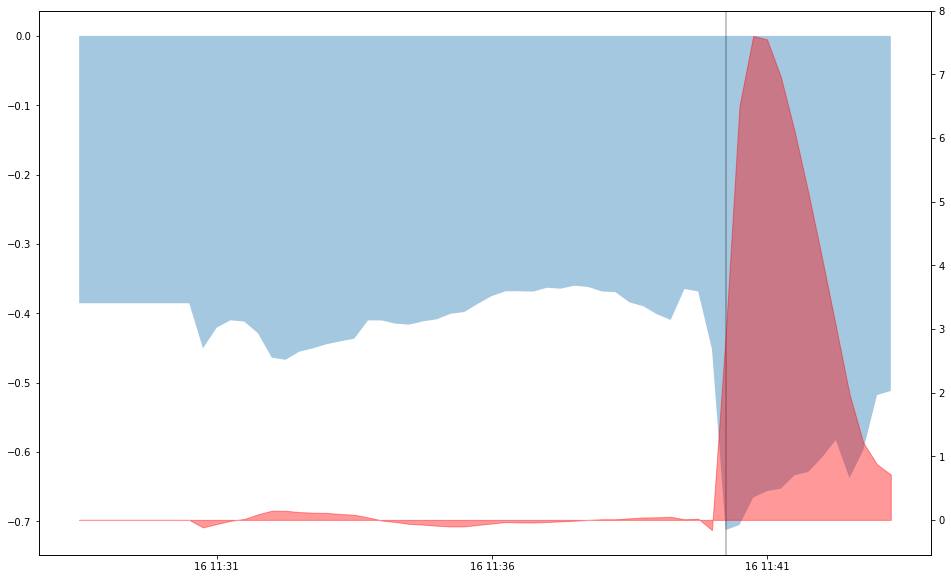

In [169]:
df = pd.read_csv("/home/kimino/soft/qcm-detector/data/tests/Insertion-5ppm_chosen.csv", parse_dates=['Time'], index_col = 'Time')
resampled = df.resample('15s').mean()
roll_mean = resampled.rolling(window=10).mean()
diff = (resampled - roll_mean).fillna(0)[:60]
clf = IsolationForest(contamination= 0.01).fit(diff[:30])
y_pred = clf.fit_predict(diff)
scores = clf.score_samples(diff)
threshold = 2
fig, ax = plt.subplots(figsize=(16,10))
index = diff.index
tax = ax.twinx()
ax.fill_between(x = index, y1 = scores, alpha = 0.4)
tax.fill_between(x = index, y1 = diff['Resistance'], alpha = 0.4, color = 'red')
for x in np.where(y_pred < 0)[0]:
    ax.axvline(x = index[x], alpha = 0.3, color = 'black')
_, y_max = ax.get_ylim()
plt.plot()